In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import os
import matplotlib.pyplot as plt
%matplotlib notebook
import copy
import csv
import glob

In [2]:
FeP_CO = './CO-FeP-8014.csv'
FeP_CO = (pd.read_csv(FeP_CO)).values
data_sets = FeP_CO[:,1:]
print(data_sets.shape,'\n'
      ,data_sets[0,27]
     )
bad_data_set = np.where(data_sets[:,:27]<0)[0]
bad_data_set = np.unique(bad_data_set)
data_sets = np.delete(data_sets,bad_data_set,axis=0)  #删除描述符小于0的样本
print(data_sets.shape,data_sets[0,:])

#用固定随机种子打乱二维数组的行顺序
np.random.seed(1)
np.random.shuffle(data_sets)
print(data_sets[0,:])

standar_scaler = preprocessing.StandardScaler()
x = data_sets[:,1:28]
y = data_sets[:,28].reshape(-1,1)
print(x[0,:],y[0,:])
x = standar_scaler.fit_transform(x)
print(x.shape,y.shape)
data_sets = np.hstack((x,y))
print(data_sets[0,:])

(8014, 32) 
 34.3839
(7822, 32) [ 0.00000000e+00  7.97749000e+01  7.88000000e-02  5.70100000e-01
  9.12968000e+01  7.80000000e-02  6.02900000e-01  1.90057800e+02
  3.27700000e-01  1.73490000e+00  3.26569200e+02  3.66810000e+00
  1.49500000e-01  3.48180800e+02  3.20490000e+00  1.58600000e-01
  5.05609800e+02  1.39000000e+00  1.62300000e-01  5.35343700e+02
  2.05100000e+00  2.36900000e-01  6.24982200e+02  2.10889000e+01
  2.31570000e+00  2.06517650e+03  6.14578600e+02  3.43839000e+01
 -1.23606292e+01  1.68108900e+00  1.16001000e+00  1.77715561e+02]
[ 8.02800000e+03  1.02902600e+02  3.00000000e-03  5.24200000e-01
  1.14185700e+02  1.92000000e-02  4.35200000e-01  1.90667300e+02
  9.07700000e-01  1.55590000e+00  2.77268200e+02  3.13600000e+00
  1.21400000e-01  3.36798300e+02  3.02460000e+00  1.83600000e-01
  5.33082900e+02  1.09520000e+00  8.13400000e-01  5.53714000e+02
  4.46180000e+00  1.59890000e+00  6.33117800e+02  2.09644000e+01
  1.45240000e+00  1.95105490e+03  5.52400700e+02  3.07862

In [3]:
k_fold = 5
one_fold = int(data_sets.shape[0]/k_fold)
redundant = data_sets.shape[0] - one_fold*k_fold
print(one_fold,'       ',redundant)


1564         2


In [4]:
data_sets_1 = data_sets[0:1565,:]
data_sets_2 = data_sets[1565:3130,:]
data_sets_3 = data_sets[3130:4694,:]
data_sets_4 = data_sets[4694:6258,:]
data_sets_5 = data_sets[6258:7822,:]
print(data_sets_1.shape,data_sets_2.shape,data_sets_3.shape,data_sets_4.shape,data_sets_5.shape)
data_sets_new = np.vstack((data_sets_1,data_sets_2))
data_sets_new = np.vstack((data_sets_new,data_sets_3))
data_sets_new = np.vstack((data_sets_new,data_sets_4))
data_sets_new = np.vstack((data_sets_new,data_sets_5))
print((data_sets == data_sets_new).all())

(1565, 28) (1565, 28) (1564, 28) (1564, 28) (1564, 28)
True


In [5]:
data_sets_train = np.vstack((data_sets_2,data_sets_3))
data_sets_train = np.vstack((data_sets_train,data_sets_4))
data_sets_train = np.vstack((data_sets_train,data_sets_5))
data_sets_test  = data_sets_1
print(data_sets_train.shape,data_sets_test.shape)
x_train = data_sets_train[:,:-1]
y_train = data_sets_train[:,-1]
x_test = data_sets_test[:,:-1]
y_test = data_sets_test[:,-1]
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(6257, 28) (1565, 28)
(6257, 27) (6257,) (1565, 27) (1565,)


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128,input_shape=(x_train.shape[1],),activation='relu'
                          ,kernel_regularizer=tf.keras.regularizers.l2(0.03),name="layer1"),
#     tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'
                          ,kernel_regularizer=tf.keras.regularizers.l2(0.02),name="layer2"),
#     tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(32, activation='relu'
                          ,kernel_regularizer=tf.keras.regularizers.l2(0.01),name="layer3"),

    tf.keras.layers.Dense(1,name="layer4")
    ])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 128)               3584      
_________________________________________________________________
layer2 (Dense)               (None, 64)                8256      
_________________________________________________________________
layer3 (Dense)               (None, 32)                2080      
_________________________________________________________________
layer4 (Dense)               (None, 1)                 33        
Total params: 13,953
Trainable params: 13,953
Non-trainable params: 0
_________________________________________________________________


In [7]:
layer0 = model.layers[0].get_weights()
print(layer0[0].shape)       #权重
print(layer0[1].shape)       #偏置
print(layer0[0][0,0],layer0[1][0])        #每次初始化的权重值都不一样
# print(layer0[1])   
# print(model.layers[1].get_weights)

(27, 128)
(128,)
0.105519265 0.0


In [8]:
print(len(model.layers[0].weights))
print(len(model.layers[1].weights))
print(len(model.layers[2].weights))
print(len(model.layers[3].weights))

2
2
2
2


In [9]:
Reduce=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.95,patience=10,
#                          verbose=1,
                         mode='auto',
                         min_delta=0.000001,
                         cooldown=0,
                         min_lr=0)

In [10]:
exponential_decay = tf.keras.optimizers.schedules.ExponentialDecay(
                    initial_learning_rate=0.05, decay_steps=50, decay_rate=0.99)

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam()
              ,loss='mse'          
             )

In [12]:
checkpoint_save_path = "./Adsorption_energy/Adsorption_energy.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('- - - - - - - - - - - -load the model- - - - - - - - - - - -')
    model.load_weights(checkpoint_save_path)

In [13]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                save_weights_only=True,
                                                save_best_only=True)

In [14]:
layer0 = model.layers[0].get_weights()
print(layer0[0].shape)       #权重
print(layer0[1].shape)       #偏置
print(layer0[0][0,0],layer0[1][0])        #每次初始化的权重值都不一样
# print(layer0[1])  

(27, 128)
(128,)
0.105519265 0.0


In [15]:
history = model.fit(x_train, y_train, batch_size=y_train.shape[0], epochs=15000, 
                    validation_data=(x_test, y_test), 
                    validation_freq=1,
                    callbacks=[cp_callback,Reduce]
#                     ,callbacks=[reduce_lr]
                   )

Epoch 1/15000
1/1 [==============================] - 1s 1s/step - loss: 136.1821 - val_loss: 132.0032
Epoch 2/15000
1/1 [==============================] - 0s 53ms/step - loss: 131.5464 - val_loss: 127.7747
Epoch 3/15000
1/1 [==============================] - 0s 47ms/step - loss: 127.4020 - val_loss: 124.0118
Epoch 4/15000
1/1 [==============================] - 0s 42ms/step - loss: 123.7160 - val_loss: 120.6451
Epoch 5/15000
1/1 [==============================] - 0s 47ms/step - loss: 120.4462 - val_loss: 117.6145
Epoch 6/15000
1/1 [==============================] - 0s 47ms/step - loss: 117.5132 - val_loss: 114.8402
Epoch 7/15000
1/1 [==============================] - 0s 52ms/step - loss: 114.8273 - val_loss: 112.2407
Epoch 8/15000
1/1 [==============================] - 0s 50ms/step - loss: 112.3080 - val_loss: 109.7262
Epoch 9/15000
1/1 [==============================] - 0s 49ms/step - loss: 109.8712 - val_loss: 107.2397
Epoch 10/15000
1/1 [==============================] - 0s 42ms/step

1/1 [==============================] - 0s 66ms/step - loss: 9.4052 - val_loss: 9.3474
Epoch 81/15000
1/1 [==============================] - 0s 56ms/step - loss: 9.3131 - val_loss: 9.2755
Epoch 82/15000
1/1 [==============================] - 0s 85ms/step - loss: 9.2290 - val_loss: 9.2099
Epoch 83/15000
1/1 [==============================] - 0s 67ms/step - loss: 9.1513 - val_loss: 9.1485
Epoch 84/15000
1/1 [==============================] - 0s 63ms/step - loss: 9.0779 - val_loss: 9.0893
Epoch 85/15000
1/1 [==============================] - 0s 52ms/step - loss: 9.0072 - val_loss: 9.0305
Epoch 86/15000
1/1 [==============================] - 0s 72ms/step - loss: 8.9374 - val_loss: 8.9704
Epoch 87/15000
1/1 [==============================] - 0s 67ms/step - loss: 8.8674 - val_loss: 8.9082
Epoch 88/15000
1/1 [==============================] - 0s 64ms/step - loss: 8.7966 - val_loss: 8.8436
Epoch 89/15000
1/1 [==============================] - 0s 58ms/step - loss: 8.7246 - val_loss: 8.7767
Epoch

1/1 [==============================] - 0s 56ms/step - loss: 5.8484 - val_loss: 6.0205
Epoch 161/15000
1/1 [==============================] - 0s 57ms/step - loss: 5.8250 - val_loss: 5.9965
Epoch 162/15000
1/1 [==============================] - 0s 74ms/step - loss: 5.8018 - val_loss: 5.9728
Epoch 163/15000
1/1 [==============================] - 0s 65ms/step - loss: 5.7789 - val_loss: 5.9493
Epoch 164/15000
1/1 [==============================] - 0s 48ms/step - loss: 5.7562 - val_loss: 5.9262
Epoch 165/15000
1/1 [==============================] - 0s 56ms/step - loss: 5.7337 - val_loss: 5.9034
Epoch 166/15000
1/1 [==============================] - 0s 65ms/step - loss: 5.7114 - val_loss: 5.8809
Epoch 167/15000
1/1 [==============================] - 0s 58ms/step - loss: 5.6894 - val_loss: 5.8586
Epoch 168/15000
1/1 [==============================] - 0s 50ms/step - loss: 5.6676 - val_loss: 5.8365
Epoch 169/15000
1/1 [==============================] - 0s 62ms/step - loss: 5.6460 - val_loss: 5.8

1/1 [==============================] - 0s 45ms/step - loss: 4.4694 - val_loss: 4.6192
Epoch 241/15000
1/1 [==============================] - 0s 44ms/step - loss: 4.4564 - val_loss: 4.6061
Epoch 242/15000
1/1 [==============================] - 0s 45ms/step - loss: 4.4435 - val_loss: 4.5930
Epoch 243/15000
1/1 [==============================] - 0s 45ms/step - loss: 4.4307 - val_loss: 4.5800
Epoch 244/15000
1/1 [==============================] - 0s 45ms/step - loss: 4.4179 - val_loss: 4.5671
Epoch 245/15000
1/1 [==============================] - 0s 48ms/step - loss: 4.4052 - val_loss: 4.5541
Epoch 246/15000
1/1 [==============================] - 0s 42ms/step - loss: 4.3926 - val_loss: 4.5411
Epoch 247/15000
1/1 [==============================] - 0s 47ms/step - loss: 4.3801 - val_loss: 4.5281
Epoch 248/15000
1/1 [==============================] - 0s 51ms/step - loss: 4.3676 - val_loss: 4.5152
Epoch 249/15000
1/1 [==============================] - 0s 44ms/step - loss: 4.3551 - val_loss: 4.5

1/1 [==============================] - 0s 51ms/step - loss: 3.6077 - val_loss: 3.7280
Epoch 321/15000
1/1 [==============================] - 0s 70ms/step - loss: 3.5985 - val_loss: 3.7181
Epoch 322/15000
1/1 [==============================] - 0s 61ms/step - loss: 3.5893 - val_loss: 3.7085
Epoch 323/15000
1/1 [==============================] - 0s 45ms/step - loss: 3.5802 - val_loss: 3.6990
Epoch 324/15000
1/1 [==============================] - 0s 57ms/step - loss: 3.5712 - val_loss: 3.6896
Epoch 325/15000
1/1 [==============================] - 0s 55ms/step - loss: 3.5622 - val_loss: 3.6799
Epoch 326/15000
1/1 [==============================] - 0s 62ms/step - loss: 3.5532 - val_loss: 3.6702
Epoch 327/15000
1/1 [==============================] - 0s 50ms/step - loss: 3.5443 - val_loss: 3.6609
Epoch 328/15000
1/1 [==============================] - 0s 64ms/step - loss: 3.5355 - val_loss: 3.6518
Epoch 329/15000
1/1 [==============================] - 0s 85ms/step - loss: 3.5267 - val_loss: 3.6

1/1 [==============================] - 0s 64ms/step - loss: 3.0106 - val_loss: 3.0872
Epoch 401/15000
1/1 [==============================] - 0s 54ms/step - loss: 3.0045 - val_loss: 3.0808
Epoch 402/15000
1/1 [==============================] - 0s 52ms/step - loss: 2.9984 - val_loss: 3.0745
Epoch 403/15000
1/1 [==============================] - 0s 53ms/step - loss: 2.9924 - val_loss: 3.0681
Epoch 404/15000
1/1 [==============================] - 0s 47ms/step - loss: 2.9863 - val_loss: 3.0618
Epoch 405/15000
1/1 [==============================] - 0s 47ms/step - loss: 2.9803 - val_loss: 3.0555
Epoch 406/15000
1/1 [==============================] - 0s 40ms/step - loss: 2.9743 - val_loss: 3.0492
Epoch 407/15000
1/1 [==============================] - 0s 44ms/step - loss: 2.9684 - val_loss: 3.0430
Epoch 408/15000
1/1 [==============================] - 0s 47ms/step - loss: 2.9624 - val_loss: 3.0368
Epoch 409/15000
1/1 [==============================] - 0s 40ms/step - loss: 2.9565 - val_loss: 3.0

1/1 [==============================] - 0s 52ms/step - loss: 2.5843 - val_loss: 2.6423
Epoch 481/15000
1/1 [==============================] - 0s 50ms/step - loss: 2.5798 - val_loss: 2.6380
Epoch 482/15000
1/1 [==============================] - 0s 50ms/step - loss: 2.5752 - val_loss: 2.6335
Epoch 483/15000
1/1 [==============================] - 0s 45ms/step - loss: 2.5706 - val_loss: 2.6285
Epoch 484/15000
1/1 [==============================] - 0s 42ms/step - loss: 2.5662 - val_loss: 2.6244
Epoch 485/15000
1/1 [==============================] - 0s 46ms/step - loss: 2.5617 - val_loss: 2.6193
Epoch 486/15000
1/1 [==============================] - 0s 46ms/step - loss: 2.5572 - val_loss: 2.6149
Epoch 487/15000
1/1 [==============================] - 0s 47ms/step - loss: 2.5527 - val_loss: 2.6104
Epoch 488/15000
1/1 [==============================] - 0s 50ms/step - loss: 2.5482 - val_loss: 2.6056
Epoch 489/15000
1/1 [==============================] - 0s 40ms/step - loss: 2.5438 - val_loss: 2.6

1/1 [==============================] - 0s 51ms/step - loss: 2.2633 - val_loss: 2.3167
Epoch 561/15000
1/1 [==============================] - 0s 49ms/step - loss: 2.2598 - val_loss: 2.3134
Epoch 562/15000
1/1 [==============================] - 0s 51ms/step - loss: 2.2563 - val_loss: 2.3096
Epoch 563/15000
1/1 [==============================] - 0s 53ms/step - loss: 2.2528 - val_loss: 2.3065
Epoch 564/15000
1/1 [==============================] - 0s 43ms/step - loss: 2.2494 - val_loss: 2.3025
Epoch 565/15000
1/1 [==============================] - 0s 48ms/step - loss: 2.2460 - val_loss: 2.2998
Epoch 566/15000
1/1 [==============================] - 0s 55ms/step - loss: 2.2426 - val_loss: 2.2955
Epoch 567/15000
1/1 [==============================] - 0s 43ms/step - loss: 2.2393 - val_loss: 2.2936
Epoch 568/15000
1/1 [==============================] - 0s 44ms/step - loss: 2.2362 - val_loss: 2.2890
Epoch 569/15000
1/1 [==============================] - 0s 44ms/step - loss: 2.2330 - val_loss: 2.2

1/1 [==============================] - 0s 79ms/step - loss: 2.0106 - val_loss: 2.0636
Epoch 641/15000
1/1 [==============================] - 0s 68ms/step - loss: 2.0078 - val_loss: 2.0604
Epoch 642/15000
1/1 [==============================] - 0s 63ms/step - loss: 2.0050 - val_loss: 2.0581
Epoch 643/15000
1/1 [==============================] - 0s 61ms/step - loss: 2.0023 - val_loss: 2.0548
Epoch 644/15000
1/1 [==============================] - 0s 91ms/step - loss: 1.9995 - val_loss: 2.0529
Epoch 645/15000
1/1 [==============================] - 0s 58ms/step - loss: 1.9968 - val_loss: 2.0494
Epoch 646/15000
1/1 [==============================] - 0s 59ms/step - loss: 1.9941 - val_loss: 2.0476
Epoch 647/15000
1/1 [==============================] - 0s 70ms/step - loss: 1.9914 - val_loss: 2.0438
Epoch 648/15000
1/1 [==============================] - 0s 62ms/step - loss: 1.9886 - val_loss: 2.0419
Epoch 649/15000
1/1 [==============================] - 0s 46ms/step - loss: 1.9857 - val_loss: 2.0

1/1 [==============================] - 0s 55ms/step - loss: 1.8010 - val_loss: 1.8540
Epoch 721/15000
1/1 [==============================] - 0s 59ms/step - loss: 1.7986 - val_loss: 1.8524
Epoch 722/15000
1/1 [==============================] - 0s 65ms/step - loss: 1.7962 - val_loss: 1.8492
Epoch 723/15000
1/1 [==============================] - 0s 53ms/step - loss: 1.7937 - val_loss: 1.8474
Epoch 724/15000
1/1 [==============================] - 0s 49ms/step - loss: 1.7913 - val_loss: 1.8443
Epoch 725/15000
1/1 [==============================] - 0s 61ms/step - loss: 1.7888 - val_loss: 1.8422
Epoch 726/15000
1/1 [==============================] - 0s 56ms/step - loss: 1.7863 - val_loss: 1.8395
Epoch 727/15000
1/1 [==============================] - 0s 50ms/step - loss: 1.7838 - val_loss: 1.8371
Epoch 728/15000
1/1 [==============================] - 0s 47ms/step - loss: 1.7814 - val_loss: 1.8348
Epoch 729/15000
1/1 [==============================] - 0s 41ms/step - loss: 1.7791 - val_loss: 1.8

1/1 [==============================] - 0s 47ms/step - loss: 1.6215 - val_loss: 1.6743
Epoch 801/15000
1/1 [==============================] - 0s 46ms/step - loss: 1.6194 - val_loss: 1.6723
Epoch 802/15000
1/1 [==============================] - 0s 43ms/step - loss: 1.6173 - val_loss: 1.6705
Epoch 803/15000
1/1 [==============================] - 0s 45ms/step - loss: 1.6153 - val_loss: 1.6681
Epoch 804/15000
1/1 [==============================] - 0s 71ms/step - loss: 1.6133 - val_loss: 1.6665
Epoch 805/15000
1/1 [==============================] - 0s 104ms/step - loss: 1.6113 - val_loss: 1.6641
Epoch 806/15000
1/1 [==============================] - 0s 71ms/step - loss: 1.6092 - val_loss: 1.6624
Epoch 807/15000
1/1 [==============================] - 0s 74ms/step - loss: 1.6072 - val_loss: 1.6600
Epoch 808/15000
1/1 [==============================] - 0s 70ms/step - loss: 1.6051 - val_loss: 1.6582
Epoch 809/15000
1/1 [==============================] - 0s 74ms/step - loss: 1.6030 - val_loss: 1.

1/1 [==============================] - 0s 51ms/step - loss: 1.4666 - val_loss: 1.5219
Epoch 881/15000
1/1 [==============================] - 0s 57ms/step - loss: 1.4653 - val_loss: 1.5191
Epoch 882/15000
1/1 [==============================] - 0s 76ms/step - loss: 1.4636 - val_loss: 1.5174
Epoch 883/15000
1/1 [==============================] - 0s 65ms/step - loss: 1.4612 - val_loss: 1.5164
Epoch 884/15000
1/1 [==============================] - 0s 55ms/step - loss: 1.4598 - val_loss: 1.5136
Epoch 885/15000
1/1 [==============================] - 0s 52ms/step - loss: 1.4580 - val_loss: 1.5119
Epoch 886/15000
1/1 [==============================] - 0s 65ms/step - loss: 1.4558 - val_loss: 1.5109
Epoch 887/15000
1/1 [==============================] - 0s 49ms/step - loss: 1.4543 - val_loss: 1.5082
Epoch 888/15000
1/1 [==============================] - 0s 54ms/step - loss: 1.4525 - val_loss: 1.5065
Epoch 889/15000
1/1 [==============================] - 0s 62ms/step - loss: 1.4504 - val_loss: 1.5

1/1 [==============================] - 0s 42ms/step - loss: 1.3309 - val_loss: 1.3855
Epoch 961/15000
1/1 [==============================] - 0s 53ms/step - loss: 1.3293 - val_loss: 1.3839
Epoch 962/15000
1/1 [==============================] - 0s 50ms/step - loss: 1.3277 - val_loss: 1.3824
Epoch 963/15000
1/1 [==============================] - 0s 43ms/step - loss: 1.3261 - val_loss: 1.3808
Epoch 964/15000
1/1 [==============================] - 0s 53ms/step - loss: 1.3246 - val_loss: 1.3792
Epoch 965/15000
1/1 [==============================] - 0s 45ms/step - loss: 1.3230 - val_loss: 1.3777
Epoch 966/15000
1/1 [==============================] - 0s 37ms/step - loss: 1.3214 - val_loss: 1.3761
Epoch 967/15000
1/1 [==============================] - 0s 50ms/step - loss: 1.3198 - val_loss: 1.3746
Epoch 968/15000
1/1 [==============================] - 0s 44ms/step - loss: 1.3182 - val_loss: 1.3731
Epoch 969/15000
1/1 [==============================] - 0s 49ms/step - loss: 1.3167 - val_loss: 1.3

1/1 [==============================] - 0s 48ms/step - loss: 1.2113 - val_loss: 1.2685
Epoch 1041/15000
1/1 [==============================] - 0s 45ms/step - loss: 1.2099 - val_loss: 1.2671
Epoch 1042/15000
1/1 [==============================] - 0s 48ms/step - loss: 1.2085 - val_loss: 1.2658
Epoch 1043/15000
1/1 [==============================] - 0s 49ms/step - loss: 1.2071 - val_loss: 1.2644
Epoch 1044/15000
1/1 [==============================] - 0s 47ms/step - loss: 1.2057 - val_loss: 1.2631
Epoch 1045/15000
1/1 [==============================] - 0s 53ms/step - loss: 1.2043 - val_loss: 1.2617
Epoch 1046/15000
1/1 [==============================] - 0s 66ms/step - loss: 1.2030 - val_loss: 1.2604
Epoch 1047/15000
1/1 [==============================] - 0s 72ms/step - loss: 1.2016 - val_loss: 1.2590
Epoch 1048/15000
1/1 [==============================] - 0s 69ms/step - loss: 1.2002 - val_loss: 1.2577
Epoch 1049/15000
1/1 [==============================] - 0s 68ms/step - loss: 1.1988 - val_

1/1 [==============================] - 0s 80ms/step - loss: 1.1068 - val_loss: 1.1672
Epoch 1120/15000
1/1 [==============================] - 0s 83ms/step - loss: 1.1056 - val_loss: 1.1660
Epoch 1121/15000
1/1 [==============================] - 0s 60ms/step - loss: 1.1043 - val_loss: 1.1647
Epoch 1122/15000
1/1 [==============================] - 0s 46ms/step - loss: 1.1031 - val_loss: 1.1635
Epoch 1123/15000
1/1 [==============================] - 0s 55ms/step - loss: 1.1019 - val_loss: 1.1622
Epoch 1124/15000
1/1 [==============================] - 0s 55ms/step - loss: 1.1006 - val_loss: 1.1610
Epoch 1125/15000
1/1 [==============================] - 0s 50ms/step - loss: 1.0994 - val_loss: 1.1598
Epoch 1126/15000
1/1 [==============================] - 0s 55ms/step - loss: 1.0981 - val_loss: 1.1586
Epoch 1127/15000
1/1 [==============================] - 0s 68ms/step - loss: 1.0969 - val_loss: 1.1574
Epoch 1128/15000
1/1 [==============================] - 0s 63ms/step - loss: 1.0957 - val_

1/1 [==============================] - 0s 63ms/step - loss: 1.0149 - val_loss: 1.0794
Epoch 1199/15000
1/1 [==============================] - 0s 46ms/step - loss: 1.0140 - val_loss: 1.0776
Epoch 1200/15000
1/1 [==============================] - 0s 60ms/step - loss: 1.0130 - val_loss: 1.0776
Epoch 1201/15000
1/1 [==============================] - 0s 68ms/step - loss: 1.0120 - val_loss: 1.0755
Epoch 1202/15000
1/1 [==============================] - 0s 79ms/step - loss: 1.0110 - val_loss: 1.0754
Epoch 1203/15000
1/1 [==============================] - 0s 55ms/step - loss: 1.0098 - val_loss: 1.0734
Epoch 1204/15000
1/1 [==============================] - 0s 49ms/step - loss: 1.0087 - val_loss: 1.0730
Epoch 1205/15000
1/1 [==============================] - 0s 59ms/step - loss: 1.0075 - val_loss: 1.0714
Epoch 1206/15000
1/1 [==============================] - 0s 66ms/step - loss: 1.0064 - val_loss: 1.0706
Epoch 1207/15000
1/1 [==============================] - 0s 56ms/step - loss: 1.0053 - val_

1/1 [==============================] - 0s 55ms/step - loss: 0.9355 - val_loss: 1.0025
Epoch 1278/15000
1/1 [==============================] - 0s 55ms/step - loss: 0.9345 - val_loss: 1.0019
Epoch 1279/15000
1/1 [==============================] - 0s 48ms/step - loss: 0.9335 - val_loss: 1.0008
Epoch 1280/15000
1/1 [==============================] - 0s 49ms/step - loss: 0.9326 - val_loss: 1.0001
Epoch 1281/15000
1/1 [==============================] - 0s 55ms/step - loss: 0.9316 - val_loss: 0.9990
Epoch 1282/15000
1/1 [==============================] - 0s 55ms/step - loss: 0.9307 - val_loss: 0.9982
Epoch 1283/15000
1/1 [==============================] - 0s 45ms/step - loss: 0.9298 - val_loss: 0.9973
Epoch 1284/15000
1/1 [==============================] - 0s 40ms/step - loss: 0.9288 - val_loss: 0.9962
Epoch 1285/15000
1/1 [==============================] - 0s 52ms/step - loss: 0.9279 - val_loss: 0.9956
Epoch 1286/15000
1/1 [==============================] - 0s 46ms/step - loss: 0.9270 - val_

1/1 [==============================] - 0s 70ms/step - loss: 0.8660 - val_loss: 0.9366
Epoch 1357/15000
1/1 [==============================] - 0s 67ms/step - loss: 0.8652 - val_loss: 0.9347
Epoch 1358/15000
1/1 [==============================] - 0s 68ms/step - loss: 0.8646 - val_loss: 0.9357
Epoch 1359/15000
1/1 [==============================] - 0s 75ms/step - loss: 0.8639 - val_loss: 0.9333
Epoch 1360/15000
1/1 [==============================] - 0s 79ms/step - loss: 0.8632 - val_loss: 0.9346
Epoch 1361/15000
1/1 [==============================] - 0s 85ms/step - loss: 0.8626 - val_loss: 0.9319
Epoch 1362/15000
1/1 [==============================] - 0s 80ms/step - loss: 0.8618 - val_loss: 0.9333
Epoch 1363/15000
1/1 [==============================] - 0s 68ms/step - loss: 0.8611 - val_loss: 0.9302
Epoch 1364/15000
1/1 [==============================] - 0s 60ms/step - loss: 0.8602 - val_loss: 0.9314
Epoch 1365/15000
1/1 [==============================] - 0s 65ms/step - loss: 0.8592 - val_

1/1 [==============================] - 0s 69ms/step - loss: 0.8060 - val_loss: 0.8803
Epoch 1436/15000
1/1 [==============================] - 0s 67ms/step - loss: 0.8053 - val_loss: 0.8776
Epoch 1437/15000
1/1 [==============================] - 0s 60ms/step - loss: 0.8045 - val_loss: 0.8786
Epoch 1438/15000
1/1 [==============================] - 0s 52ms/step - loss: 0.8037 - val_loss: 0.8762
Epoch 1439/15000
1/1 [==============================] - 0s 47ms/step - loss: 0.8029 - val_loss: 0.8766
Epoch 1440/15000
1/1 [==============================] - 0s 55ms/step - loss: 0.8020 - val_loss: 0.8749
Epoch 1441/15000
1/1 [==============================] - 0s 49ms/step - loss: 0.8012 - val_loss: 0.8748
Epoch 1442/15000
1/1 [==============================] - 0s 45ms/step - loss: 0.8005 - val_loss: 0.8739
Epoch 1443/15000
1/1 [==============================] - 0s 46ms/step - loss: 0.7997 - val_loss: 0.8732
Epoch 1444/15000
1/1 [==============================] - 0s 46ms/step - loss: 0.7991 - val_

1/1 [==============================] - 0s 46ms/step - loss: 0.7527 - val_loss: 0.8287
Epoch 1515/15000
1/1 [==============================] - 0s 56ms/step - loss: 0.7520 - val_loss: 0.8282
Epoch 1516/15000
1/1 [==============================] - 0s 69ms/step - loss: 0.7514 - val_loss: 0.8280
Epoch 1517/15000
1/1 [==============================] - 0s 75ms/step - loss: 0.7508 - val_loss: 0.8267
Epoch 1518/15000
1/1 [==============================] - 0s 69ms/step - loss: 0.7502 - val_loss: 0.8274
Epoch 1519/15000
1/1 [==============================] - 0s 69ms/step - loss: 0.7497 - val_loss: 0.8253
Epoch 1520/15000
1/1 [==============================] - 0s 61ms/step - loss: 0.7492 - val_loss: 0.8268
Epoch 1521/15000
1/1 [==============================] - 0s 79ms/step - loss: 0.7487 - val_loss: 0.8241
Epoch 1522/15000
1/1 [==============================] - 0s 79ms/step - loss: 0.7483 - val_loss: 0.8261
Epoch 1523/15000
1/1 [==============================] - 0s 74ms/step - loss: 0.7477 - val_

1/1 [==============================] - 0s 61ms/step - loss: 0.7067 - val_loss: 0.7842
Epoch 1594/15000
1/1 [==============================] - 0s 61ms/step - loss: 0.7062 - val_loss: 0.7863
Epoch 1595/15000
1/1 [==============================] - 0s 57ms/step - loss: 0.7058 - val_loss: 0.7833
Epoch 1596/15000
1/1 [==============================] - 0s 53ms/step - loss: 0.7053 - val_loss: 0.7856
Epoch 1597/15000
1/1 [==============================] - 0s 50ms/step - loss: 0.7049 - val_loss: 0.7823
Epoch 1598/15000
1/1 [==============================] - 0s 63ms/step - loss: 0.7044 - val_loss: 0.7847
Epoch 1599/15000
1/1 [==============================] - 0s 74ms/step - loss: 0.7039 - val_loss: 0.7814
Epoch 1600/15000
1/1 [==============================] - 0s 53ms/step - loss: 0.7033 - val_loss: 0.7834
Epoch 1601/15000
1/1 [==============================] - 0s 47ms/step - loss: 0.7027 - val_loss: 0.7804
Epoch 1602/15000
1/1 [==============================] - 0s 56ms/step - loss: 0.7020 - val_

1/1 [==============================] - 0s 53ms/step - loss: 0.6659 - val_loss: 0.7460
Epoch 1673/15000
1/1 [==============================] - 0s 60ms/step - loss: 0.6653 - val_loss: 0.7471
Epoch 1674/15000
1/1 [==============================] - 0s 58ms/step - loss: 0.6646 - val_loss: 0.7453
Epoch 1675/15000
1/1 [==============================] - 0s 58ms/step - loss: 0.6640 - val_loss: 0.7454
Epoch 1676/15000
1/1 [==============================] - 0s 48ms/step - loss: 0.6635 - val_loss: 0.7448
Epoch 1677/15000
1/1 [==============================] - 0s 42ms/step - loss: 0.6630 - val_loss: 0.7440
Epoch 1678/15000
1/1 [==============================] - 0s 43ms/step - loss: 0.6625 - val_loss: 0.7443
Epoch 1679/15000
1/1 [==============================] - 0s 42ms/step - loss: 0.6621 - val_loss: 0.7428
Epoch 1680/15000
1/1 [==============================] - 0s 44ms/step - loss: 0.6617 - val_loss: 0.7439
Epoch 1681/15000
1/1 [==============================] - 0s 46ms/step - loss: 0.6613 - val_

1/1 [==============================] - 0s 51ms/step - loss: 0.6305 - val_loss: 0.7116
Epoch 1752/15000
1/1 [==============================] - 0s 59ms/step - loss: 0.6302 - val_loss: 0.7150
Epoch 1753/15000
1/1 [==============================] - 0s 64ms/step - loss: 0.6300 - val_loss: 0.7108
Epoch 1754/15000
1/1 [==============================] - 0s 77ms/step - loss: 0.6297 - val_loss: 0.7147
Epoch 1755/15000
1/1 [==============================] - 0s 82ms/step - loss: 0.6294 - val_loss: 0.7099
Epoch 1756/15000
1/1 [==============================] - ETA: 0s - loss: 0.628 - 0s 51ms/step - loss: 0.6289 - val_loss: 0.7138
Epoch 1757/15000
1/1 [==============================] - 0s 51ms/step - loss: 0.6284 - val_loss: 0.7089
Epoch 1758/15000
1/1 [==============================] - 0s 59ms/step - loss: 0.6277 - val_loss: 0.7119
Epoch 1759/15000
1/1 [==============================] - 0s 61ms/step - loss: 0.6269 - val_loss: 0.7080
Epoch 1760/15000
1/1 [==============================] - 0s 65ms/st

1/1 [==============================] - 0s 41ms/step - loss: 0.5984 - val_loss: 0.6835
Epoch 1831/15000
1/1 [==============================] - 0s 41ms/step - loss: 0.5979 - val_loss: 0.6809
Epoch 1832/15000
1/1 [==============================] - 0s 48ms/step - loss: 0.5973 - val_loss: 0.6821
Epoch 1833/15000
1/1 [==============================] - 0s 42ms/step - loss: 0.5968 - val_loss: 0.6802
Epoch 1834/15000
1/1 [==============================] - 0s 47ms/step - loss: 0.5963 - val_loss: 0.6807
Epoch 1835/15000
1/1 [==============================] - 0s 46ms/step - loss: 0.5958 - val_loss: 0.6797
Epoch 1836/15000
1/1 [==============================] - 0s 39ms/step - loss: 0.5953 - val_loss: 0.6796
Epoch 1837/15000
1/1 [==============================] - 0s 47ms/step - loss: 0.5949 - val_loss: 0.6793
Epoch 1838/15000
1/1 [==============================] - 0s 44ms/step - loss: 0.5945 - val_loss: 0.6787
Epoch 1839/15000
1/1 [==============================] - 0s 43ms/step - loss: 0.5942 - val_

1/1 [==============================] - 0s 51ms/step - loss: 0.5704 - val_loss: 0.6542
Epoch 1910/15000
1/1 [==============================] - 0s 39ms/step - loss: 0.5702 - val_loss: 0.6574
Epoch 1911/15000
1/1 [==============================] - 0s 45ms/step - loss: 0.5700 - val_loss: 0.6538
Epoch 1912/15000
1/1 [==============================] - 0s 43ms/step - loss: 0.5698 - val_loss: 0.6570
Epoch 1913/15000
1/1 [==============================] - 0s 43ms/step - loss: 0.5697 - val_loss: 0.6536
Epoch 1914/15000
1/1 [==============================] - 0s 42ms/step - loss: 0.5696 - val_loss: 0.6568
Epoch 1915/15000
1/1 [==============================] - 0s 43ms/step - loss: 0.5695 - val_loss: 0.6533
Epoch 1916/15000
1/1 [==============================] - 0s 44ms/step - loss: 0.5692 - val_loss: 0.6560
Epoch 1917/15000
1/1 [==============================] - 0s 59ms/step - loss: 0.5689 - val_loss: 0.6525
Epoch 1918/15000
1/1 [==============================] - 0s 89ms/step - loss: 0.5683 - val_

1/1 [==============================] - 0s 63ms/step - loss: 0.5451 - val_loss: 0.6330
Epoch 1989/15000
1/1 [==============================] - 0s 88ms/step - loss: 0.5449 - val_loss: 0.6305
Epoch 1990/15000
1/1 [==============================] - 0s 88ms/step - loss: 0.5448 - val_loss: 0.6331
Epoch 1991/15000
1/1 [==============================] - 0s 61ms/step - loss: 0.5447 - val_loss: 0.6301
Epoch 1992/15000
1/1 [==============================] - 0s 75ms/step - loss: 0.5446 - val_loss: 0.6332
Epoch 1993/15000
1/1 [==============================] - 0s 65ms/step - loss: 0.5445 - val_loss: 0.6297
Epoch 1994/15000
1/1 [==============================] - 0s 68ms/step - loss: 0.5444 - val_loss: 0.6331
Epoch 1995/15000
1/1 [==============================] - 0s 60ms/step - loss: 0.5442 - val_loss: 0.6293
Epoch 1996/15000
1/1 [==============================] - 0s 83ms/step - loss: 0.5440 - val_loss: 0.6324
Epoch 1997/15000
1/1 [==============================] - 0s 95ms/step - loss: 0.5436 - val_

1/1 [==============================] - 0s 58ms/step - loss: 0.5225 - val_loss: 0.6103
Epoch 2068/15000
1/1 [==============================] - 0s 58ms/step - loss: 0.5223 - val_loss: 0.6109
Epoch 2069/15000
1/1 [==============================] - 0s 50ms/step - loss: 0.5220 - val_loss: 0.6095
Epoch 2070/15000
1/1 [==============================] - 0s 44ms/step - loss: 0.5218 - val_loss: 0.6109
Epoch 2071/15000
1/1 [==============================] - 0s 51ms/step - loss: 0.5216 - val_loss: 0.6087
Epoch 2072/15000
1/1 [==============================] - 0s 49ms/step - loss: 0.5215 - val_loss: 0.6115
Epoch 2073/15000
1/1 [==============================] - 0s 54ms/step - loss: 0.5215 - val_loss: 0.6082
Epoch 2074/15000
1/1 [==============================] - 0s 42ms/step - loss: 0.5216 - val_loss: 0.6126
Epoch 2075/15000
1/1 [==============================] - 0s 44ms/step - loss: 0.5219 - val_loss: 0.6081
Epoch 2076/15000
1/1 [==============================] - 0s 45ms/step - loss: 0.5223 - val_

1/1 [==============================] - 0s 46ms/step - loss: 0.5038 - val_loss: 0.5913
Epoch 2147/15000
1/1 [==============================] - 0s 57ms/step - loss: 0.5039 - val_loss: 0.5959
Epoch 2148/15000
1/1 [==============================] - 0s 49ms/step - loss: 0.5037 - val_loss: 0.5908
Epoch 2149/15000
1/1 [==============================] - 0s 47ms/step - loss: 0.5034 - val_loss: 0.5946
Epoch 2150/15000
1/1 [==============================] - 0s 51ms/step - loss: 0.5028 - val_loss: 0.5903
Epoch 2151/15000
1/1 [==============================] - 0s 45ms/step - loss: 0.5021 - val_loss: 0.5923
Epoch 2152/15000
1/1 [==============================] - 0s 45ms/step - loss: 0.5014 - val_loss: 0.5902
Epoch 2153/15000
1/1 [==============================] - 0s 43ms/step - loss: 0.5009 - val_loss: 0.5904
Epoch 2154/15000
1/1 [==============================] - 0s 50ms/step - loss: 0.5005 - val_loss: 0.5908
Epoch 2155/15000
1/1 [==============================] - 0s 52ms/step - loss: 0.5004 - val_

1/1 [==============================] - 0s 53ms/step - loss: 0.4858 - val_loss: 0.5786
Epoch 2226/15000
1/1 [==============================] - 0s 49ms/step - loss: 0.4852 - val_loss: 0.5751
Epoch 2227/15000
1/1 [==============================] - 0s 41ms/step - loss: 0.4846 - val_loss: 0.5767
Epoch 2228/15000
1/1 [==============================] - 0s 45ms/step - loss: 0.4841 - val_loss: 0.5752
Epoch 2229/15000
1/1 [==============================] - 0s 51ms/step - loss: 0.4837 - val_loss: 0.5753
Epoch 2230/15000
1/1 [==============================] - 0s 52ms/step - loss: 0.4835 - val_loss: 0.5756
Epoch 2231/15000
1/1 [==============================] - 0s 46ms/step - loss: 0.4834 - val_loss: 0.5745
Epoch 2232/15000
1/1 [==============================] - 0s 47ms/step - loss: 0.4833 - val_loss: 0.5763
Epoch 2233/15000
1/1 [==============================] - 0s 47ms/step - loss: 0.4833 - val_loss: 0.5740
Epoch 2234/15000
1/1 [==============================] - 0s 44ms/step - loss: 0.4834 - val_

1/1 [==============================] - 0s 61ms/step - loss: 0.4688 - val_loss: 0.5628
Epoch 2305/15000
1/1 [==============================] - 0s 49ms/step - loss: 0.4686 - val_loss: 0.5613
Epoch 2306/15000
1/1 [==============================] - 0s 44ms/step - loss: 0.4685 - val_loss: 0.5627
Epoch 2307/15000
1/1 [==============================] - 0s 51ms/step - loss: 0.4684 - val_loss: 0.5611
Epoch 2308/15000
1/1 [==============================] - 0s 43ms/step - loss: 0.4684 - val_loss: 0.5631
Epoch 2309/15000
1/1 [==============================] - 0s 49ms/step - loss: 0.4685 - val_loss: 0.5608
Epoch 2310/15000
1/1 [==============================] - 0s 65ms/step - loss: 0.4686 - val_loss: 0.5640
Epoch 2311/15000
1/1 [==============================] - 0s 73ms/step - loss: 0.4688 - val_loss: 0.5605
Epoch 2312/15000
1/1 [==============================] - 0s 60ms/step - loss: 0.4690 - val_loss: 0.5656
Epoch 2313/15000
1/1 [==============================] - 0s 55ms/step - loss: 0.4694 - val_

1/1 [==============================] - 0s 46ms/step - loss: 0.4564 - val_loss: 0.5535
Epoch 2384/15000
1/1 [==============================] - 0s 50ms/step - loss: 0.4562 - val_loss: 0.5482
Epoch 2385/15000
1/1 [==============================] - 0s 56ms/step - loss: 0.4557 - val_loss: 0.5519
Epoch 2386/15000
1/1 [==============================] - 0s 51ms/step - loss: 0.4550 - val_loss: 0.5477
Epoch 2387/15000
1/1 [==============================] - 0s 55ms/step - loss: 0.4544 - val_loss: 0.5499
Epoch 2388/15000
1/1 [==============================] - 0s 51ms/step - loss: 0.4537 - val_loss: 0.5476
Epoch 2389/15000
1/1 [==============================] - 0s 41ms/step - loss: 0.4533 - val_loss: 0.5482
Epoch 2390/15000
1/1 [==============================] - 0s 48ms/step - loss: 0.4530 - val_loss: 0.5482
Epoch 2391/15000
1/1 [==============================] - 0s 47ms/step - loss: 0.4529 - val_loss: 0.5471
Epoch 2392/15000
1/1 [==============================] - 0s 45ms/step - loss: 0.4529 - val_

1/1 [==============================] - 0s 61ms/step - loss: 0.4417 - val_loss: 0.5379
Epoch 2463/15000
1/1 [==============================] - 0s 48ms/step - loss: 0.4416 - val_loss: 0.5376
Epoch 2464/15000
1/1 [==============================] - 0s 46ms/step - loss: 0.4414 - val_loss: 0.5377
Epoch 2465/15000
1/1 [==============================] - 0s 47ms/step - loss: 0.4412 - val_loss: 0.5374
Epoch 2466/15000
1/1 [==============================] - 0s 41ms/step - loss: 0.4410 - val_loss: 0.5372
Epoch 2467/15000
1/1 [==============================] - 0s 46ms/step - loss: 0.4409 - val_loss: 0.5373
Epoch 2468/15000
1/1 [==============================] - 0s 48ms/step - loss: 0.4407 - val_loss: 0.5369
Epoch 2469/15000
1/1 [==============================] - 0s 47ms/step - loss: 0.4406 - val_loss: 0.5373
Epoch 2470/15000
1/1 [==============================] - 0s 51ms/step - loss: 0.4405 - val_loss: 0.5365
Epoch 2471/15000
1/1 [==============================] - 0s 40ms/step - loss: 0.4404 - val_

1/1 [==============================] - 0s 52ms/step - loss: 0.4312 - val_loss: 0.5298
Epoch 2542/15000
1/1 [==============================] - 0s 55ms/step - loss: 0.4309 - val_loss: 0.5277
Epoch 2543/15000
1/1 [==============================] - 0s 45ms/step - loss: 0.4305 - val_loss: 0.5285
Epoch 2544/15000
1/1 [==============================] - 0s 41ms/step - loss: 0.4302 - val_loss: 0.5279
Epoch 2545/15000
1/1 [==============================] - 0s 51ms/step - loss: 0.4300 - val_loss: 0.5276
Epoch 2546/15000
1/1 [==============================] - 0s 49ms/step - loss: 0.4298 - val_loss: 0.5282
Epoch 2547/15000
1/1 [==============================] - 0s 47ms/step - loss: 0.4297 - val_loss: 0.5270
Epoch 2548/15000
1/1 [==============================] - 0s 47ms/step - loss: 0.4297 - val_loss: 0.5286
Epoch 2549/15000
1/1 [==============================] - 0s 43ms/step - loss: 0.4296 - val_loss: 0.5266
Epoch 2550/15000
1/1 [==============================] - 0s 44ms/step - loss: 0.4297 - val_

1/1 [==============================] - 0s 61ms/step - loss: 0.4208 - val_loss: 0.5182
Epoch 2621/15000
1/1 [==============================] - 0s 48ms/step - loss: 0.4204 - val_loss: 0.5189
Epoch 2622/15000
1/1 [==============================] - 0s 48ms/step - loss: 0.4201 - val_loss: 0.5185
Epoch 2623/15000
1/1 [==============================] - 0s 50ms/step - loss: 0.4200 - val_loss: 0.5180
Epoch 2624/15000
1/1 [==============================] - 0s 51ms/step - loss: 0.4199 - val_loss: 0.5192
Epoch 2625/15000
1/1 [==============================] - 0s 46ms/step - loss: 0.4200 - val_loss: 0.5176
Epoch 2626/15000
1/1 [==============================] - 0s 47ms/step - loss: 0.4201 - val_loss: 0.5202
Epoch 2627/15000
1/1 [==============================] - 0s 49ms/step - loss: 0.4203 - val_loss: 0.5175
Epoch 2628/15000
1/1 [==============================] - 0s 43ms/step - loss: 0.4205 - val_loss: 0.5212
Epoch 2629/15000
1/1 [==============================] - 0s 47ms/step - loss: 0.4208 - val_

1/1 [==============================] - 0s 54ms/step - loss: 0.4117 - val_loss: 0.5122
Epoch 2700/15000
1/1 [==============================] - 0s 64ms/step - loss: 0.4116 - val_loss: 0.5098
Epoch 2701/15000
1/1 [==============================] - 0s 64ms/step - loss: 0.4115 - val_loss: 0.5122
Epoch 2702/15000
1/1 [==============================] - 0s 67ms/step - loss: 0.4114 - val_loss: 0.5096
Epoch 2703/15000
1/1 [==============================] - 0s 100ms/step - loss: 0.4114 - val_loss: 0.5123
Epoch 2704/15000
1/1 [==============================] - 0s 83ms/step - loss: 0.4114 - val_loss: 0.5095
Epoch 2705/15000
1/1 [==============================] - 0s 76ms/step - loss: 0.4114 - val_loss: 0.5125
Epoch 2706/15000
1/1 [==============================] - 0s 68ms/step - loss: 0.4114 - val_loss: 0.5093
Epoch 2707/15000
1/1 [==============================] - 0s 77ms/step - loss: 0.4113 - val_loss: 0.5124
Epoch 2708/15000
1/1 [==============================] - 0s 88ms/step - loss: 0.4112 - val

1/1 [==============================] - 0s 114ms/step - loss: 0.4033 - val_loss: 0.5034
Epoch 2779/15000
1/1 [==============================] - 0s 91ms/step - loss: 0.4032 - val_loss: 0.5042
Epoch 2780/15000
1/1 [==============================] - 0s 78ms/step - loss: 0.4031 - val_loss: 0.5033
Epoch 2781/15000
1/1 [==============================] - 0s 75ms/step - loss: 0.4029 - val_loss: 0.5038
Epoch 2782/15000
1/1 [==============================] - 0s 92ms/step - loss: 0.4028 - val_loss: 0.5033
Epoch 2783/15000
1/1 [==============================] - 0s 91ms/step - loss: 0.4027 - val_loss: 0.5035
Epoch 2784/15000
1/1 [==============================] - 0s 67ms/step - loss: 0.4026 - val_loss: 0.5032
Epoch 2785/15000
1/1 [==============================] - 0s 69ms/step - loss: 0.4026 - val_loss: 0.5033
Epoch 2786/15000
1/1 [==============================] - 0s 80ms/step - loss: 0.4025 - val_loss: 0.5032
Epoch 2787/15000
1/1 [==============================] - 0s 104ms/step - loss: 0.4024 - va

1/1 [==============================] - 0s 95ms/step - loss: 0.3970 - val_loss: 0.4970
Epoch 2858/15000
1/1 [==============================] - 0s 87ms/step - loss: 0.3975 - val_loss: 0.5023
Epoch 2859/15000
1/1 [==============================] - 0s 82ms/step - loss: 0.3983 - val_loss: 0.4976
Epoch 2860/15000
1/1 [==============================] - 0s 81ms/step - loss: 0.3992 - val_loss: 0.5055
Epoch 2861/15000
1/1 [==============================] - 0s 92ms/step - loss: 0.4004 - val_loss: 0.4987
Epoch 2862/15000
1/1 [==============================] - 0s 80ms/step - loss: 0.4014 - val_loss: 0.5081
Epoch 2863/15000
1/1 [==============================] - 0s 76ms/step - loss: 0.4021 - val_loss: 0.4990
Epoch 2864/15000
1/1 [==============================] - 0s 60ms/step - loss: 0.4019 - val_loss: 0.5065
Epoch 2865/15000
1/1 [==============================] - 0s 50ms/step - loss: 0.4009 - val_loss: 0.4970
Epoch 2866/15000
1/1 [==============================] - 0s 45ms/step - loss: 0.3989 - val_

1/1 [==============================] - 0s 46ms/step - loss: 0.3897 - val_loss: 0.4929
Epoch 2937/15000
1/1 [==============================] - 0s 37ms/step - loss: 0.3896 - val_loss: 0.4912
Epoch 2938/15000
1/1 [==============================] - 0s 41ms/step - loss: 0.3895 - val_loss: 0.4925
Epoch 2939/15000
1/1 [==============================] - 0s 44ms/step - loss: 0.3893 - val_loss: 0.4912
Epoch 2940/15000
1/1 [==============================] - 0s 42ms/step - loss: 0.3892 - val_loss: 0.4919
Epoch 2941/15000
1/1 [==============================] - 0s 38ms/step - loss: 0.3890 - val_loss: 0.4912
Epoch 2942/15000
1/1 [==============================] - 0s 42ms/step - loss: 0.3889 - val_loss: 0.4915
Epoch 2943/15000
1/1 [==============================] - 0s 45ms/step - loss: 0.3888 - val_loss: 0.4912
Epoch 2944/15000
1/1 [==============================] - 0s 44ms/step - loss: 0.3887 - val_loss: 0.4912
Epoch 2945/15000
1/1 [==============================] - 0s 46ms/step - loss: 0.3886 - val_

1/1 [==============================] - 0s 44ms/step - loss: 0.3834 - val_loss: 0.4876
Epoch 3016/15000
1/1 [==============================] - 0s 43ms/step - loss: 0.3834 - val_loss: 0.4866
Epoch 3017/15000
1/1 [==============================] - 0s 41ms/step - loss: 0.3834 - val_loss: 0.4876
Epoch 3018/15000
1/1 [==============================] - 0s 38ms/step - loss: 0.3833 - val_loss: 0.4864
Epoch 3019/15000
1/1 [==============================] - 0s 41ms/step - loss: 0.3833 - val_loss: 0.4878
Epoch 3020/15000
1/1 [==============================] - 0s 42ms/step - loss: 0.3833 - val_loss: 0.4862
Epoch 3021/15000
1/1 [==============================] - 0s 76ms/step - loss: 0.3832 - val_loss: 0.4879
Epoch 3022/15000
1/1 [==============================] - 0s 68ms/step - loss: 0.3832 - val_loss: 0.4860
Epoch 3023/15000
1/1 [==============================] - 0s 50ms/step - loss: 0.3831 - val_loss: 0.4879
Epoch 3024/15000
1/1 [==============================] - 0s 45ms/step - loss: 0.3831 - val_

1/1 [==============================] - 0s 45ms/step - loss: 0.3779 - val_loss: 0.4822
Epoch 3095/15000
1/1 [==============================] - 0s 58ms/step - loss: 0.3779 - val_loss: 0.4823
Epoch 3096/15000
1/1 [==============================] - 0s 56ms/step - loss: 0.3778 - val_loss: 0.4819
Epoch 3097/15000
1/1 [==============================] - 0s 53ms/step - loss: 0.3777 - val_loss: 0.4822
Epoch 3098/15000
1/1 [==============================] - 0s 50ms/step - loss: 0.3776 - val_loss: 0.4817
Epoch 3099/15000
1/1 [==============================] - 0s 42ms/step - loss: 0.3775 - val_loss: 0.4822
Epoch 3100/15000
1/1 [==============================] - 0s 41ms/step - loss: 0.3775 - val_loss: 0.4814
Epoch 3101/15000
1/1 [==============================] - 0s 37ms/step - loss: 0.3774 - val_loss: 0.4823
Epoch 3102/15000
1/1 [==============================] - 0s 36ms/step - loss: 0.3774 - val_loss: 0.4812
Epoch 3103/15000
1/1 [==============================] - 0s 42ms/step - loss: 0.3774 - val_

1/1 [==============================] - 0s 55ms/step - loss: 0.3728 - val_loss: 0.4779
Epoch 3174/15000
1/1 [==============================] - 0s 46ms/step - loss: 0.3728 - val_loss: 0.4775
Epoch 3175/15000
1/1 [==============================] - 0s 37ms/step - loss: 0.3727 - val_loss: 0.4778
Epoch 3176/15000
1/1 [==============================] - 0s 46ms/step - loss: 0.3727 - val_loss: 0.4774
Epoch 3177/15000
1/1 [==============================] - 0s 54ms/step - loss: 0.3726 - val_loss: 0.4778
Epoch 3178/15000
1/1 [==============================] - 0s 49ms/step - loss: 0.3726 - val_loss: 0.4772
Epoch 3179/15000
1/1 [==============================] - 0s 46ms/step - loss: 0.3726 - val_loss: 0.4780
Epoch 3180/15000
1/1 [==============================] - 0s 39ms/step - loss: 0.3725 - val_loss: 0.4770
Epoch 3181/15000
1/1 [==============================] - 0s 58ms/step - loss: 0.3725 - val_loss: 0.4781
Epoch 3182/15000
1/1 [==============================] - 0s 62ms/step - loss: 0.3724 - val_

1/1 [==============================] - 0s 73ms/step - loss: 0.3684 - val_loss: 0.4733
Epoch 3253/15000
1/1 [==============================] - 0s 80ms/step - loss: 0.3683 - val_loss: 0.4745
Epoch 3254/15000
1/1 [==============================] - 0s 70ms/step - loss: 0.3683 - val_loss: 0.4732
Epoch 3255/15000
1/1 [==============================] - 0s 67ms/step - loss: 0.3682 - val_loss: 0.4743
Epoch 3256/15000
1/1 [==============================] - 0s 77ms/step - loss: 0.3681 - val_loss: 0.4733
Epoch 3257/15000
1/1 [==============================] - 0s 98ms/step - loss: 0.3681 - val_loss: 0.4742
Epoch 3258/15000
1/1 [==============================] - 0s 92ms/step - loss: 0.3680 - val_loss: 0.4734
Epoch 3259/15000
1/1 [==============================] - 0s 70ms/step - loss: 0.3680 - val_loss: 0.4740
Epoch 3260/15000
1/1 [==============================] - 0s 62ms/step - loss: 0.3680 - val_loss: 0.4733
Epoch 3261/15000
1/1 [==============================] - 0s 67ms/step - loss: 0.3679 - val_

1/1 [==============================] - 0s 52ms/step - loss: 0.3641 - val_loss: 0.4700
Epoch 3332/15000
1/1 [==============================] - 0s 42ms/step - loss: 0.3640 - val_loss: 0.4705
Epoch 3333/15000
1/1 [==============================] - 0s 41ms/step - loss: 0.3640 - val_loss: 0.4700
Epoch 3334/15000
1/1 [==============================] - 0s 43ms/step - loss: 0.3639 - val_loss: 0.4703
Epoch 3335/15000
1/1 [==============================] - 0s 58ms/step - loss: 0.3639 - val_loss: 0.4701
Epoch 3336/15000
1/1 [==============================] - 0s 82ms/step - loss: 0.3638 - val_loss: 0.4701
Epoch 3337/15000
1/1 [==============================] - 0s 69ms/step - loss: 0.3638 - val_loss: 0.4700
Epoch 3338/15000
1/1 [==============================] - 0s 66ms/step - loss: 0.3637 - val_loss: 0.4701
Epoch 3339/15000
1/1 [==============================] - 0s 57ms/step - loss: 0.3637 - val_loss: 0.4698
Epoch 3340/15000
1/1 [==============================] - 0s 46ms/step - loss: 0.3636 - val_

1/1 [==============================] - 0s 43ms/step - loss: 0.3601 - val_loss: 0.4669
Epoch 3411/15000
1/1 [==============================] - 0s 38ms/step - loss: 0.3601 - val_loss: 0.4665
Epoch 3412/15000
1/1 [==============================] - 0s 40ms/step - loss: 0.3601 - val_loss: 0.4668
Epoch 3413/15000
1/1 [==============================] - 0s 35ms/step - loss: 0.3600 - val_loss: 0.4664
Epoch 3414/15000
1/1 [==============================] - 0s 37ms/step - loss: 0.3600 - val_loss: 0.4668
Epoch 3415/15000
1/1 [==============================] - 0s 35ms/step - loss: 0.3599 - val_loss: 0.4663
Epoch 3416/15000
1/1 [==============================] - 0s 36ms/step - loss: 0.3599 - val_loss: 0.4667
Epoch 3417/15000
1/1 [==============================] - 0s 39ms/step - loss: 0.3598 - val_loss: 0.4661
Epoch 3418/15000
1/1 [==============================] - 0s 46ms/step - loss: 0.3598 - val_loss: 0.4668
Epoch 3419/15000
1/1 [==============================] - 0s 57ms/step - loss: 0.3597 - val_

1/1 [==============================] - 0s 37ms/step - loss: 0.3566 - val_loss: 0.4640
Epoch 3490/15000
1/1 [==============================] - 0s 46ms/step - loss: 0.3565 - val_loss: 0.4637
Epoch 3491/15000
1/1 [==============================] - 0s 44ms/step - loss: 0.3565 - val_loss: 0.4640
Epoch 3492/15000
1/1 [==============================] - 0s 39ms/step - loss: 0.3564 - val_loss: 0.4637
Epoch 3493/15000
1/1 [==============================] - 0s 38ms/step - loss: 0.3564 - val_loss: 0.4639
Epoch 3494/15000
1/1 [==============================] - 0s 40ms/step - loss: 0.3564 - val_loss: 0.4636
Epoch 3495/15000
1/1 [==============================] - 0s 43ms/step - loss: 0.3563 - val_loss: 0.4639
Epoch 3496/15000
1/1 [==============================] - 0s 41ms/step - loss: 0.3563 - val_loss: 0.4635
Epoch 3497/15000
1/1 [==============================] - 0s 35ms/step - loss: 0.3562 - val_loss: 0.4638
Epoch 3498/15000
1/1 [==============================] - 0s 41ms/step - loss: 0.3562 - val_

1/1 [==============================] - 0s 49ms/step - loss: 0.3533 - val_loss: 0.4612
Epoch 3569/15000
1/1 [==============================] - 0s 50ms/step - loss: 0.3533 - val_loss: 0.4608
Epoch 3570/15000
1/1 [==============================] - 0s 47ms/step - loss: 0.3532 - val_loss: 0.4612
Epoch 3571/15000
1/1 [==============================] - 0s 46ms/step - loss: 0.3532 - val_loss: 0.4608
Epoch 3572/15000
1/1 [==============================] - 0s 37ms/step - loss: 0.3531 - val_loss: 0.4611
Epoch 3573/15000
1/1 [==============================] - 0s 42ms/step - loss: 0.3531 - val_loss: 0.4607
Epoch 3574/15000
1/1 [==============================] - 0s 41ms/step - loss: 0.3531 - val_loss: 0.4610
Epoch 3575/15000
1/1 [==============================] - 0s 37ms/step - loss: 0.3530 - val_loss: 0.4607
Epoch 3576/15000
1/1 [==============================] - 0s 37ms/step - loss: 0.3530 - val_loss: 0.4608
Epoch 3577/15000
1/1 [==============================] - 0s 39ms/step - loss: 0.3529 - val_

1/1 [==============================] - 0s 70ms/step - loss: 0.3502 - val_loss: 0.4582
Epoch 3648/15000
1/1 [==============================] - 0s 64ms/step - loss: 0.3501 - val_loss: 0.4586
Epoch 3649/15000
1/1 [==============================] - 0s 49ms/step - loss: 0.3501 - val_loss: 0.4581
Epoch 3650/15000
1/1 [==============================] - 0s 41ms/step - loss: 0.3501 - val_loss: 0.4586
Epoch 3651/15000
1/1 [==============================] - 0s 53ms/step - loss: 0.3500 - val_loss: 0.4581
Epoch 3652/15000
1/1 [==============================] - 0s 57ms/step - loss: 0.3500 - val_loss: 0.4585
Epoch 3653/15000
1/1 [==============================] - 0s 49ms/step - loss: 0.3499 - val_loss: 0.4581
Epoch 3654/15000
1/1 [==============================] - 0s 51ms/step - loss: 0.3499 - val_loss: 0.4583
Epoch 3655/15000
1/1 [==============================] - 0s 47ms/step - loss: 0.3499 - val_loss: 0.4581
Epoch 3656/15000
1/1 [==============================] - 0s 38ms/step - loss: 0.3498 - val_

1/1 [==============================] - 0s 49ms/step - loss: 0.3473 - val_loss: 0.4557
Epoch 3727/15000
1/1 [==============================] - 0s 47ms/step - loss: 0.3473 - val_loss: 0.4566
Epoch 3728/15000
1/1 [==============================] - 0s 38ms/step - loss: 0.3472 - val_loss: 0.4557
Epoch 3729/15000
1/1 [==============================] - 0s 42ms/step - loss: 0.3472 - val_loss: 0.4565
Epoch 3730/15000
1/1 [==============================] - 0s 41ms/step - loss: 0.3471 - val_loss: 0.4556
Epoch 3731/15000
1/1 [==============================] - 0s 41ms/step - loss: 0.3471 - val_loss: 0.4565
Epoch 3732/15000
1/1 [==============================] - 0s 37ms/step - loss: 0.3471 - val_loss: 0.4556
Epoch 3733/15000
1/1 [==============================] - 0s 38ms/step - loss: 0.3471 - val_loss: 0.4565
Epoch 3734/15000
1/1 [==============================] - 0s 46ms/step - loss: 0.3470 - val_loss: 0.4554
Epoch 3735/15000
1/1 [==============================] - 0s 72ms/step - loss: 0.3470 - val_

1/1 [==============================] - 0s 52ms/step - loss: 0.3445 - val_loss: 0.4541
Epoch 3806/15000
1/1 [==============================] - 0s 61ms/step - loss: 0.3445 - val_loss: 0.4536
Epoch 3807/15000
1/1 [==============================] - 0s 77ms/step - loss: 0.3444 - val_loss: 0.4541
Epoch 3808/15000
1/1 [==============================] - 0s 53ms/step - loss: 0.3444 - val_loss: 0.4535
Epoch 3809/15000
1/1 [==============================] - 0s 52ms/step - loss: 0.3444 - val_loss: 0.4541
Epoch 3810/15000
1/1 [==============================] - 0s 80ms/step - loss: 0.3444 - val_loss: 0.4534
Epoch 3811/15000
1/1 [==============================] - 0s 88ms/step - loss: 0.3443 - val_loss: 0.4539
Epoch 3812/15000
1/1 [==============================] - 0s 72ms/step - loss: 0.3443 - val_loss: 0.4535
Epoch 3813/15000
1/1 [==============================] - 0s 48ms/step - loss: 0.3442 - val_loss: 0.4538
Epoch 3814/15000
1/1 [==============================] - 0s 40ms/step - loss: 0.3442 - val_

1/1 [==============================] - 0s 62ms/step - loss: 0.3420 - val_loss: 0.4514
Epoch 3885/15000
1/1 [==============================] - 0s 50ms/step - loss: 0.3420 - val_loss: 0.4518
Epoch 3886/15000
1/1 [==============================] - 0s 51ms/step - loss: 0.3419 - val_loss: 0.4513
Epoch 3887/15000
1/1 [==============================] - 0s 78ms/step - loss: 0.3419 - val_loss: 0.4518
Epoch 3888/15000
1/1 [==============================] - 0s 56ms/step - loss: 0.3419 - val_loss: 0.4512
Epoch 3889/15000
1/1 [==============================] - 0s 48ms/step - loss: 0.3418 - val_loss: 0.4516
Epoch 3890/15000
1/1 [==============================] - 0s 43ms/step - loss: 0.3418 - val_loss: 0.4513
Epoch 3891/15000
1/1 [==============================] - 0s 59ms/step - loss: 0.3418 - val_loss: 0.4515
Epoch 3892/15000
1/1 [==============================] - 0s 56ms/step - loss: 0.3417 - val_loss: 0.4513
Epoch 3893/15000
1/1 [==============================] - 0s 69ms/step - loss: 0.3417 - val_

1/1 [==============================] - 0s 64ms/step - loss: 0.3396 - val_loss: 0.4497
Epoch 3964/15000
1/1 [==============================] - 0s 54ms/step - loss: 0.3396 - val_loss: 0.4493
Epoch 3965/15000
1/1 [==============================] - 0s 58ms/step - loss: 0.3396 - val_loss: 0.4497
Epoch 3966/15000
1/1 [==============================] - 0s 72ms/step - loss: 0.3396 - val_loss: 0.4492
Epoch 3967/15000
1/1 [==============================] - 0s 64ms/step - loss: 0.3395 - val_loss: 0.4497
Epoch 3968/15000
1/1 [==============================] - 0s 75ms/step - loss: 0.3395 - val_loss: 0.4492
Epoch 3969/15000
1/1 [==============================] - 0s 71ms/step - loss: 0.3395 - val_loss: 0.4496
Epoch 3970/15000
1/1 [==============================] - 0s 75ms/step - loss: 0.3394 - val_loss: 0.4493
Epoch 3971/15000
1/1 [==============================] - 0s 69ms/step - loss: 0.3394 - val_loss: 0.4494
Epoch 3972/15000
1/1 [==============================] - 0s 86ms/step - loss: 0.3394 - val_

1/1 [==============================] - 0s 63ms/step - loss: 0.3374 - val_loss: 0.4478
Epoch 4043/15000
1/1 [==============================] - 0s 62ms/step - loss: 0.3374 - val_loss: 0.4474
Epoch 4044/15000
1/1 [==============================] - 0s 68ms/step - loss: 0.3373 - val_loss: 0.4476
Epoch 4045/15000
1/1 [==============================] - 0s 60ms/step - loss: 0.3373 - val_loss: 0.4475
Epoch 4046/15000
1/1 [==============================] - 0s 64ms/step - loss: 0.3373 - val_loss: 0.4473
Epoch 4047/15000
1/1 [==============================] - 0s 63ms/step - loss: 0.3372 - val_loss: 0.4477
Epoch 4048/15000
1/1 [==============================] - 0s 58ms/step - loss: 0.3372 - val_loss: 0.4471
Epoch 4049/15000
1/1 [==============================] - 0s 66ms/step - loss: 0.3372 - val_loss: 0.4480
Epoch 4050/15000
1/1 [==============================] - 0s 68ms/step - loss: 0.3372 - val_loss: 0.4468
Epoch 4051/15000
1/1 [==============================] - 0s 77ms/step - loss: 0.3372 - val_

1/1 [==============================] - 0s 49ms/step - loss: 0.3352 - val_loss: 0.4461
Epoch 4122/15000
1/1 [==============================] - 0s 60ms/step - loss: 0.3352 - val_loss: 0.4455
Epoch 4123/15000
1/1 [==============================] - 0s 58ms/step - loss: 0.3352 - val_loss: 0.4460
Epoch 4124/15000
1/1 [==============================] - 0s 61ms/step - loss: 0.3351 - val_loss: 0.4456
Epoch 4125/15000
1/1 [==============================] - 0s 52ms/step - loss: 0.3351 - val_loss: 0.4458
Epoch 4126/15000
1/1 [==============================] - 0s 54ms/step - loss: 0.3351 - val_loss: 0.4458
Epoch 4127/15000
1/1 [==============================] - 0s 71ms/step - loss: 0.3351 - val_loss: 0.4456
Epoch 4128/15000
1/1 [==============================] - 0s 83ms/step - loss: 0.3350 - val_loss: 0.4458
Epoch 4129/15000
1/1 [==============================] - 0s 70ms/step - loss: 0.3350 - val_loss: 0.4454
Epoch 4130/15000
1/1 [==============================] - 0s 60ms/step - loss: 0.3350 - val_

1/1 [==============================] - 0s 65ms/step - loss: 0.3332 - val_loss: 0.4439
Epoch 4201/15000
1/1 [==============================] - 0s 55ms/step - loss: 0.3332 - val_loss: 0.4444
Epoch 4202/15000
1/1 [==============================] - 0s 55ms/step - loss: 0.3331 - val_loss: 0.4438
Epoch 4203/15000
1/1 [==============================] - 0s 50ms/step - loss: 0.3331 - val_loss: 0.4444
Epoch 4204/15000
1/1 [==============================] - 0s 51ms/step - loss: 0.3331 - val_loss: 0.4437
Epoch 4205/15000
1/1 [==============================] - 0s 47ms/step - loss: 0.3331 - val_loss: 0.4445
Epoch 4206/15000
1/1 [==============================] - 0s 48ms/step - loss: 0.3331 - val_loss: 0.4436
Epoch 4207/15000
1/1 [==============================] - 0s 55ms/step - loss: 0.3331 - val_loss: 0.4446
Epoch 4208/15000
1/1 [==============================] - 0s 76ms/step - loss: 0.3331 - val_loss: 0.4435
Epoch 4209/15000
1/1 [==============================] - 0s 116ms/step - loss: 0.3331 - val

1/1 [==============================] - 0s 71ms/step - loss: 0.3312 - val_loss: 0.4427
Epoch 4280/15000
1/1 [==============================] - 0s 63ms/step - loss: 0.3312 - val_loss: 0.4426
Epoch 4281/15000
1/1 [==============================] - 0s 62ms/step - loss: 0.3312 - val_loss: 0.4427
Epoch 4282/15000
1/1 [==============================] - 0s 64ms/step - loss: 0.3311 - val_loss: 0.4426
Epoch 4283/15000
1/1 [==============================] - 0s 74ms/step - loss: 0.3311 - val_loss: 0.4427
Epoch 4284/15000
1/1 [==============================] - 0s 68ms/step - loss: 0.3311 - val_loss: 0.4426
Epoch 4285/15000
1/1 [==============================] - 0s 70ms/step - loss: 0.3311 - val_loss: 0.4427
Epoch 4286/15000
1/1 [==============================] - 0s 57ms/step - loss: 0.3311 - val_loss: 0.4425
Epoch 4287/15000
1/1 [==============================] - 0s 59ms/step - loss: 0.3310 - val_loss: 0.4426
Epoch 4288/15000
1/1 [==============================] - 0s 55ms/step - loss: 0.3310 - val_

1/1 [==============================] - 0s 135ms/step - loss: 0.3294 - val_loss: 0.4414
Epoch 4359/15000
1/1 [==============================] - 0s 123ms/step - loss: 0.3294 - val_loss: 0.4412
Epoch 4360/15000
1/1 [==============================] - 0s 95ms/step - loss: 0.3294 - val_loss: 0.4414
Epoch 4361/15000
1/1 [==============================] - 0s 92ms/step - loss: 0.3294 - val_loss: 0.4411
Epoch 4362/15000
1/1 [==============================] - 0s 63ms/step - loss: 0.3293 - val_loss: 0.4415
Epoch 4363/15000
1/1 [==============================] - 0s 85ms/step - loss: 0.3293 - val_loss: 0.4410
Epoch 4364/15000
1/1 [==============================] - 0s 74ms/step - loss: 0.3293 - val_loss: 0.4415
Epoch 4365/15000
1/1 [==============================] - 0s 64ms/step - loss: 0.3293 - val_loss: 0.4410
Epoch 4366/15000
1/1 [==============================] - 0s 74ms/step - loss: 0.3293 - val_loss: 0.4414
Epoch 4367/15000
1/1 [==============================] - 0s 87ms/step - loss: 0.3292 - va

1/1 [==============================] - 0s 139ms/step - loss: 0.3277 - val_loss: 0.4396
Epoch 4438/15000
1/1 [==============================] - 0s 101ms/step - loss: 0.3276 - val_loss: 0.4397
Epoch 4439/15000
1/1 [==============================] - 0s 145ms/step - loss: 0.3276 - val_loss: 0.4396
Epoch 4440/15000
1/1 [==============================] - 0s 156ms/step - loss: 0.3276 - val_loss: 0.4397
Epoch 4441/15000
1/1 [==============================] - 0s 159ms/step - loss: 0.3276 - val_loss: 0.4396
Epoch 4442/15000
1/1 [==============================] - 0s 102ms/step - loss: 0.3276 - val_loss: 0.4397
Epoch 4443/15000
1/1 [==============================] - 0s 177ms/step - loss: 0.3275 - val_loss: 0.4395
Epoch 4444/15000
1/1 [==============================] - 0s 100ms/step - loss: 0.3275 - val_loss: 0.4397
Epoch 4445/15000
1/1 [==============================] - 0s 81ms/step - loss: 0.3275 - val_loss: 0.4394
Epoch 4446/15000
1/1 [==============================] - 0s 93ms/step - loss: 0.327

1/1 [==============================] - 0s 66ms/step - loss: 0.3260 - val_loss: 0.4385
Epoch 4517/15000
1/1 [==============================] - 0s 60ms/step - loss: 0.3260 - val_loss: 0.4384
Epoch 4518/15000
1/1 [==============================] - 0s 58ms/step - loss: 0.3260 - val_loss: 0.4385
Epoch 4519/15000
1/1 [==============================] - 0s 69ms/step - loss: 0.3259 - val_loss: 0.4383
Epoch 4520/15000
1/1 [==============================] - 0s 62ms/step - loss: 0.3259 - val_loss: 0.4385
Epoch 4521/15000
1/1 [==============================] - 0s 61ms/step - loss: 0.3259 - val_loss: 0.4382
Epoch 4522/15000
1/1 [==============================] - 0s 58ms/step - loss: 0.3259 - val_loss: 0.4385
Epoch 4523/15000
1/1 [==============================] - 0s 61ms/step - loss: 0.3259 - val_loss: 0.4383
Epoch 4524/15000
1/1 [==============================] - 0s 69ms/step - loss: 0.3258 - val_loss: 0.4384
Epoch 4525/15000
1/1 [==============================] - 0s 68ms/step - loss: 0.3258 - val_

1/1 [==============================] - 0s 57ms/step - loss: 0.3245 - val_loss: 0.4370
Epoch 4596/15000
1/1 [==============================] - 0s 74ms/step - loss: 0.3244 - val_loss: 0.4374
Epoch 4597/15000
1/1 [==============================] - 0s 72ms/step - loss: 0.3244 - val_loss: 0.4370
Epoch 4598/15000
1/1 [==============================] - 0s 58ms/step - loss: 0.3244 - val_loss: 0.4372
Epoch 4599/15000
1/1 [==============================] - 0s 49ms/step - loss: 0.3244 - val_loss: 0.4371
Epoch 4600/15000
1/1 [==============================] - 0s 50ms/step - loss: 0.3244 - val_loss: 0.4372
Epoch 4601/15000
1/1 [==============================] - 0s 49ms/step - loss: 0.3243 - val_loss: 0.4371
Epoch 4602/15000
1/1 [==============================] - 0s 44ms/step - loss: 0.3243 - val_loss: 0.4371
Epoch 4603/15000
1/1 [==============================] - 0s 56ms/step - loss: 0.3243 - val_loss: 0.4371
Epoch 4604/15000
1/1 [==============================] - 0s 59ms/step - loss: 0.3243 - val_

1/1 [==============================] - 0s 79ms/step - loss: 0.3230 - val_loss: 0.4358
Epoch 4675/15000
1/1 [==============================] - 0s 77ms/step - loss: 0.3230 - val_loss: 0.4362
Epoch 4676/15000
1/1 [==============================] - 0s 69ms/step - loss: 0.3229 - val_loss: 0.4359
Epoch 4677/15000
1/1 [==============================] - 0s 65ms/step - loss: 0.3229 - val_loss: 0.4362
Epoch 4678/15000
1/1 [==============================] - 0s 74ms/step - loss: 0.3229 - val_loss: 0.4359
Epoch 4679/15000
1/1 [==============================] - 0s 65ms/step - loss: 0.3229 - val_loss: 0.4361
Epoch 4680/15000
1/1 [==============================] - 0s 67ms/step - loss: 0.3229 - val_loss: 0.4360
Epoch 4681/15000
1/1 [==============================] - 0s 70ms/step - loss: 0.3228 - val_loss: 0.4359
Epoch 4682/15000
1/1 [==============================] - 0s 69ms/step - loss: 0.3228 - val_loss: 0.4360
Epoch 4683/15000
1/1 [==============================] - 0s 77ms/step - loss: 0.3228 - val_

1/1 [==============================] - 0s 81ms/step - loss: 0.3215 - val_loss: 0.4350
Epoch 4754/15000
1/1 [==============================] - 0s 77ms/step - loss: 0.3215 - val_loss: 0.4348
Epoch 4755/15000
1/1 [==============================] - 0s 114ms/step - loss: 0.3215 - val_loss: 0.4350
Epoch 4756/15000
1/1 [==============================] - 0s 153ms/step - loss: 0.3215 - val_loss: 0.4348
Epoch 4757/15000
1/1 [==============================] - 0s 84ms/step - loss: 0.3215 - val_loss: 0.4350
Epoch 4758/15000
1/1 [==============================] - 0s 78ms/step - loss: 0.3215 - val_loss: 0.4348
Epoch 4759/15000
1/1 [==============================] - 0s 78ms/step - loss: 0.3214 - val_loss: 0.4349
Epoch 4760/15000
1/1 [==============================] - 0s 77ms/step - loss: 0.3214 - val_loss: 0.4348
Epoch 4761/15000
1/1 [==============================] - 0s 78ms/step - loss: 0.3214 - val_loss: 0.4348
Epoch 4762/15000
1/1 [==============================] - 0s 63ms/step - loss: 0.3214 - va

1/1 [==============================] - 0s 83ms/step - loss: 0.3202 - val_loss: 0.4340
Epoch 4833/15000
1/1 [==============================] - 0s 88ms/step - loss: 0.3201 - val_loss: 0.4335
Epoch 4834/15000
1/1 [==============================] - 0s 54ms/step - loss: 0.3201 - val_loss: 0.4339
Epoch 4835/15000
1/1 [==============================] - 0s 66ms/step - loss: 0.3201 - val_loss: 0.4335
Epoch 4836/15000
1/1 [==============================] - 0s 70ms/step - loss: 0.3201 - val_loss: 0.4337
Epoch 4837/15000
1/1 [==============================] - 0s 60ms/step - loss: 0.3201 - val_loss: 0.4336
Epoch 4838/15000
1/1 [==============================] - 0s 69ms/step - loss: 0.3200 - val_loss: 0.4337
Epoch 4839/15000
1/1 [==============================] - 0s 82ms/step - loss: 0.3200 - val_loss: 0.4336
Epoch 4840/15000
1/1 [==============================] - 0s 75ms/step - loss: 0.3200 - val_loss: 0.4336
Epoch 4841/15000
1/1 [==============================] - 0s 81ms/step - loss: 0.3200 - val_

1/1 [==============================] - 0s 52ms/step - loss: 0.3188 - val_loss: 0.4329
Epoch 4912/15000
1/1 [==============================] - 0s 45ms/step - loss: 0.3188 - val_loss: 0.4325
Epoch 4913/15000
1/1 [==============================] - 0s 48ms/step - loss: 0.3188 - val_loss: 0.4328
Epoch 4914/15000
1/1 [==============================] - 0s 47ms/step - loss: 0.3188 - val_loss: 0.4326
Epoch 4915/15000
1/1 [==============================] - 0s 48ms/step - loss: 0.3188 - val_loss: 0.4326
Epoch 4916/15000
1/1 [==============================] - 0s 47ms/step - loss: 0.3187 - val_loss: 0.4327
Epoch 4917/15000
1/1 [==============================] - 0s 49ms/step - loss: 0.3187 - val_loss: 0.4326
Epoch 4918/15000
1/1 [==============================] - 0s 51ms/step - loss: 0.3187 - val_loss: 0.4328
Epoch 4919/15000
1/1 [==============================] - 0s 45ms/step - loss: 0.3187 - val_loss: 0.4325
Epoch 4920/15000
1/1 [==============================] - 0s 57ms/step - loss: 0.3187 - val_

1/1 [==============================] - 0s 98ms/step - loss: 0.3175 - val_loss: 0.4316
Epoch 4991/15000
1/1 [==============================] - 0s 61ms/step - loss: 0.3175 - val_loss: 0.4318
Epoch 4992/15000
1/1 [==============================] - 0s 56ms/step - loss: 0.3175 - val_loss: 0.4316
Epoch 4993/15000
1/1 [==============================] - 0s 91ms/step - loss: 0.3175 - val_loss: 0.4319
Epoch 4994/15000
1/1 [==============================] - 0s 146ms/step - loss: 0.3175 - val_loss: 0.4316
Epoch 4995/15000
1/1 [==============================] - 0s 152ms/step - loss: 0.3175 - val_loss: 0.4319
Epoch 4996/15000
1/1 [==============================] - 0s 92ms/step - loss: 0.3175 - val_loss: 0.4316
Epoch 4997/15000
1/1 [==============================] - 0s 69ms/step - loss: 0.3174 - val_loss: 0.4318
Epoch 4998/15000
1/1 [==============================] - 0s 85ms/step - loss: 0.3174 - val_loss: 0.4316
Epoch 4999/15000
1/1 [==============================] - 0s 83ms/step - loss: 0.3174 - va

1/1 [==============================] - 0s 94ms/step - loss: 0.3163 - val_loss: 0.4307
Epoch 5070/15000
1/1 [==============================] - 0s 68ms/step - loss: 0.3163 - val_loss: 0.4309
Epoch 5071/15000
1/1 [==============================] - 0s 66ms/step - loss: 0.3163 - val_loss: 0.4307
Epoch 5072/15000
1/1 [==============================] - 0s 61ms/step - loss: 0.3163 - val_loss: 0.4308
Epoch 5073/15000
1/1 [==============================] - 0s 72ms/step - loss: 0.3163 - val_loss: 0.4308
Epoch 5074/15000
1/1 [==============================] - 0s 61ms/step - loss: 0.3163 - val_loss: 0.4307
Epoch 5075/15000
1/1 [==============================] - 0s 102ms/step - loss: 0.3162 - val_loss: 0.4308
Epoch 5076/15000
1/1 [==============================] - 0s 64ms/step - loss: 0.3162 - val_loss: 0.4307
Epoch 5077/15000
1/1 [==============================] - 0s 65ms/step - loss: 0.3162 - val_loss: 0.4308
Epoch 5078/15000
1/1 [==============================] - 0s 59ms/step - loss: 0.3162 - val

1/1 [==============================] - 0s 97ms/step - loss: 0.3152 - val_loss: 0.4300
Epoch 5149/15000
1/1 [==============================] - 0s 77ms/step - loss: 0.3151 - val_loss: 0.4299
Epoch 5150/15000
1/1 [==============================] - 0s 90ms/step - loss: 0.3151 - val_loss: 0.4300
Epoch 5151/15000
1/1 [==============================] - 0s 94ms/step - loss: 0.3151 - val_loss: 0.4300
Epoch 5152/15000
1/1 [==============================] - 0s 132ms/step - loss: 0.3151 - val_loss: 0.4299
Epoch 5153/15000
1/1 [==============================] - 0s 87ms/step - loss: 0.3151 - val_loss: 0.4300
Epoch 5154/15000
1/1 [==============================] - 0s 74ms/step - loss: 0.3151 - val_loss: 0.4298
Epoch 5155/15000
1/1 [==============================] - 0s 75ms/step - loss: 0.3150 - val_loss: 0.4299
Epoch 5156/15000
1/1 [==============================] - 0s 73ms/step - loss: 0.3150 - val_loss: 0.4299
Epoch 5157/15000
1/1 [==============================] - 0s 93ms/step - loss: 0.3150 - val

1/1 [==============================] - 0s 65ms/step - loss: 0.3140 - val_loss: 0.4290
Epoch 5228/15000
1/1 [==============================] - 0s 47ms/step - loss: 0.3140 - val_loss: 0.4290
Epoch 5229/15000
1/1 [==============================] - 0s 52ms/step - loss: 0.3140 - val_loss: 0.4290
Epoch 5230/15000
1/1 [==============================] - 0s 58ms/step - loss: 0.3139 - val_loss: 0.4290
Epoch 5231/15000
1/1 [==============================] - 0s 47ms/step - loss: 0.3139 - val_loss: 0.4290
Epoch 5232/15000
1/1 [==============================] - 0s 46ms/step - loss: 0.3139 - val_loss: 0.4290
Epoch 5233/15000
1/1 [==============================] - 0s 45ms/step - loss: 0.3139 - val_loss: 0.4289
Epoch 5234/15000
1/1 [==============================] - 0s 76ms/step - loss: 0.3139 - val_loss: 0.4290
Epoch 5235/15000
1/1 [==============================] - 0s 76ms/step - loss: 0.3139 - val_loss: 0.4289
Epoch 5236/15000
1/1 [==============================] - 0s 69ms/step - loss: 0.3139 - val_

1/1 [==============================] - 0s 76ms/step - loss: 0.3128 - val_loss: 0.4282
Epoch 5307/15000
1/1 [==============================] - 0s 69ms/step - loss: 0.3128 - val_loss: 0.4283
Epoch 5308/15000
1/1 [==============================] - 0s 78ms/step - loss: 0.3128 - val_loss: 0.4281
Epoch 5309/15000
1/1 [==============================] - 0s 99ms/step - loss: 0.3128 - val_loss: 0.4282
Epoch 5310/15000
1/1 [==============================] - 0s 109ms/step - loss: 0.3128 - val_loss: 0.4280
Epoch 5311/15000
1/1 [==============================] - 0s 83ms/step - loss: 0.3128 - val_loss: 0.4282
Epoch 5312/15000
1/1 [==============================] - 0s 78ms/step - loss: 0.3127 - val_loss: 0.4280
Epoch 5313/15000
1/1 [==============================] - 0s 87ms/step - loss: 0.3127 - val_loss: 0.4282
Epoch 5314/15000
1/1 [==============================] - 0s 87ms/step - loss: 0.3127 - val_loss: 0.4279
Epoch 5315/15000
1/1 [==============================] - 0s 67ms/step - loss: 0.3127 - val

1/1 [==============================] - 0s 70ms/step - loss: 0.3117 - val_loss: 0.4271
Epoch 5386/15000
1/1 [==============================] - 0s 91ms/step - loss: 0.3117 - val_loss: 0.4273
Epoch 5387/15000
1/1 [==============================] - 0s 89ms/step - loss: 0.3117 - val_loss: 0.4271
Epoch 5388/15000
1/1 [==============================] - 0s 80ms/step - loss: 0.3117 - val_loss: 0.4272
Epoch 5389/15000
1/1 [==============================] - 0s 72ms/step - loss: 0.3117 - val_loss: 0.4272
Epoch 5390/15000
1/1 [==============================] - 0s 81ms/step - loss: 0.3116 - val_loss: 0.4271
Epoch 5391/15000
1/1 [==============================] - 0s 71ms/step - loss: 0.3116 - val_loss: 0.4271
Epoch 5392/15000
1/1 [==============================] - 0s 60ms/step - loss: 0.3116 - val_loss: 0.4271
Epoch 5393/15000
1/1 [==============================] - 0s 72ms/step - loss: 0.3116 - val_loss: 0.4270
Epoch 5394/15000
1/1 [==============================] - 0s 59ms/step - loss: 0.3116 - val_

1/1 [==============================] - 0s 67ms/step - loss: 0.3107 - val_loss: 0.4263
Epoch 5465/15000
1/1 [==============================] - 0s 64ms/step - loss: 0.3106 - val_loss: 0.4261
Epoch 5466/15000
1/1 [==============================] - 0s 51ms/step - loss: 0.3106 - val_loss: 0.4262
Epoch 5467/15000
1/1 [==============================] - 0s 70ms/step - loss: 0.3106 - val_loss: 0.4261
Epoch 5468/15000
1/1 [==============================] - 0s 78ms/step - loss: 0.3106 - val_loss: 0.4261
Epoch 5469/15000
1/1 [==============================] - 0s 75ms/step - loss: 0.3106 - val_loss: 0.4262
Epoch 5470/15000
1/1 [==============================] - 0s 74ms/step - loss: 0.3106 - val_loss: 0.4261
Epoch 5471/15000
1/1 [==============================] - 0s 70ms/step - loss: 0.3106 - val_loss: 0.4262
Epoch 5472/15000
1/1 [==============================] - 0s 61ms/step - loss: 0.3105 - val_loss: 0.4260
Epoch 5473/15000
1/1 [==============================] - 0s 53ms/step - loss: 0.3105 - val_

1/1 [==============================] - 0s 50ms/step - loss: 0.3096 - val_loss: 0.4252
Epoch 5544/15000
1/1 [==============================] - 0s 54ms/step - loss: 0.3096 - val_loss: 0.4253
Epoch 5545/15000
1/1 [==============================] - 0s 62ms/step - loss: 0.3096 - val_loss: 0.4252
Epoch 5546/15000
1/1 [==============================] - 0s 56ms/step - loss: 0.3096 - val_loss: 0.4252
Epoch 5547/15000
1/1 [==============================] - 0s 47ms/step - loss: 0.3095 - val_loss: 0.4253
Epoch 5548/15000
1/1 [==============================] - 0s 54ms/step - loss: 0.3095 - val_loss: 0.4251
Epoch 5549/15000
1/1 [==============================] - 0s 49ms/step - loss: 0.3095 - val_loss: 0.4253
Epoch 5550/15000
1/1 [==============================] - 0s 50ms/step - loss: 0.3095 - val_loss: 0.4251
Epoch 5551/15000
1/1 [==============================] - 0s 62ms/step - loss: 0.3095 - val_loss: 0.4253
Epoch 5552/15000
1/1 [==============================] - 0s 61ms/step - loss: 0.3095 - val_

1/1 [==============================] - 0s 47ms/step - loss: 0.3086 - val_loss: 0.4245
Epoch 5623/15000
1/1 [==============================] - 0s 50ms/step - loss: 0.3086 - val_loss: 0.4243
Epoch 5624/15000
1/1 [==============================] - 0s 55ms/step - loss: 0.3085 - val_loss: 0.4244
Epoch 5625/15000
1/1 [==============================] - 0s 48ms/step - loss: 0.3085 - val_loss: 0.4243
Epoch 5626/15000
1/1 [==============================] - 0s 48ms/step - loss: 0.3085 - val_loss: 0.4244
Epoch 5627/15000
1/1 [==============================] - 0s 61ms/step - loss: 0.3085 - val_loss: 0.4243
Epoch 5628/15000
1/1 [==============================] - 0s 78ms/step - loss: 0.3085 - val_loss: 0.4243
Epoch 5629/15000
1/1 [==============================] - 0s 84ms/step - loss: 0.3085 - val_loss: 0.4243
Epoch 5630/15000
1/1 [==============================] - 0s 63ms/step - loss: 0.3085 - val_loss: 0.4242
Epoch 5631/15000
1/1 [==============================] - 0s 59ms/step - loss: 0.3085 - val_

1/1 [==============================] - 0s 47ms/step - loss: 0.3076 - val_loss: 0.4236
Epoch 5702/15000
1/1 [==============================] - 0s 63ms/step - loss: 0.3076 - val_loss: 0.4237
Epoch 5703/15000
1/1 [==============================] - 0s 56ms/step - loss: 0.3076 - val_loss: 0.4236
Epoch 5704/15000
1/1 [==============================] - 0s 51ms/step - loss: 0.3075 - val_loss: 0.4237
Epoch 5705/15000
1/1 [==============================] - 0s 51ms/step - loss: 0.3075 - val_loss: 0.4236
Epoch 5706/15000
1/1 [==============================] - 0s 53ms/step - loss: 0.3075 - val_loss: 0.4236
Epoch 5707/15000
1/1 [==============================] - 0s 55ms/step - loss: 0.3075 - val_loss: 0.4236
Epoch 5708/15000
1/1 [==============================] - 0s 61ms/step - loss: 0.3075 - val_loss: 0.4235
Epoch 5709/15000
1/1 [==============================] - 0s 59ms/step - loss: 0.3075 - val_loss: 0.4237
Epoch 5710/15000
1/1 [==============================] - 0s 89ms/step - loss: 0.3075 - val_

1/1 [==============================] - 0s 66ms/step - loss: 0.3066 - val_loss: 0.4228
Epoch 5781/15000
1/1 [==============================] - 0s 60ms/step - loss: 0.3066 - val_loss: 0.4231
Epoch 5782/15000
1/1 [==============================] - 0s 62ms/step - loss: 0.3066 - val_loss: 0.4228
Epoch 5783/15000
1/1 [==============================] - 0s 68ms/step - loss: 0.3066 - val_loss: 0.4230
Epoch 5784/15000
1/1 [==============================] - 0s 53ms/step - loss: 0.3066 - val_loss: 0.4229
Epoch 5785/15000
1/1 [==============================] - 0s 60ms/step - loss: 0.3066 - val_loss: 0.4229
Epoch 5786/15000
1/1 [==============================] - 0s 50ms/step - loss: 0.3065 - val_loss: 0.4229
Epoch 5787/15000
1/1 [==============================] - 0s 49ms/step - loss: 0.3065 - val_loss: 0.4228
Epoch 5788/15000
1/1 [==============================] - 0s 76ms/step - loss: 0.3065 - val_loss: 0.4229
Epoch 5789/15000
1/1 [==============================] - 0s 73ms/step - loss: 0.3065 - val_

1/1 [==============================] - 0s 64ms/step - loss: 0.3057 - val_loss: 0.4222
Epoch 5860/15000
1/1 [==============================] - 0s 68ms/step - loss: 0.3057 - val_loss: 0.4221
Epoch 5861/15000
1/1 [==============================] - 0s 58ms/step - loss: 0.3057 - val_loss: 0.4223
Epoch 5862/15000
1/1 [==============================] - 0s 67ms/step - loss: 0.3057 - val_loss: 0.4220
Epoch 5863/15000
1/1 [==============================] - 0s 76ms/step - loss: 0.3057 - val_loss: 0.4222
Epoch 5864/15000
1/1 [==============================] - 0s 61ms/step - loss: 0.3057 - val_loss: 0.4220
Epoch 5865/15000
1/1 [==============================] - 0s 50ms/step - loss: 0.3056 - val_loss: 0.4222
Epoch 5866/15000
1/1 [==============================] - 0s 55ms/step - loss: 0.3056 - val_loss: 0.4220
Epoch 5867/15000
1/1 [==============================] - 0s 49ms/step - loss: 0.3056 - val_loss: 0.4221
Epoch 5868/15000
1/1 [==============================] - 0s 47ms/step - loss: 0.3056 - val_

1/1 [==============================] - 0s 51ms/step - loss: 0.3048 - val_loss: 0.4214
Epoch 5939/15000
1/1 [==============================] - 0s 50ms/step - loss: 0.3048 - val_loss: 0.4216
Epoch 5940/15000
1/1 [==============================] - 0s 46ms/step - loss: 0.3048 - val_loss: 0.4213
Epoch 5941/15000
1/1 [==============================] - 0s 51ms/step - loss: 0.3048 - val_loss: 0.4215
Epoch 5942/15000
1/1 [==============================] - 0s 58ms/step - loss: 0.3048 - val_loss: 0.4213
Epoch 5943/15000
1/1 [==============================] - 0s 49ms/step - loss: 0.3048 - val_loss: 0.4214
Epoch 5944/15000
1/1 [==============================] - 0s 51ms/step - loss: 0.3048 - val_loss: 0.4215
Epoch 5945/15000
1/1 [==============================] - 0s 50ms/step - loss: 0.3048 - val_loss: 0.4213
Epoch 5946/15000
1/1 [==============================] - 0s 49ms/step - loss: 0.3047 - val_loss: 0.4215
Epoch 5947/15000
1/1 [==============================] - 0s 46ms/step - loss: 0.3047 - val_

1/1 [==============================] - 0s 59ms/step - loss: 0.3040 - val_loss: 0.4208
Epoch 6018/15000
1/1 [==============================] - 0s 51ms/step - loss: 0.3040 - val_loss: 0.4205
Epoch 6019/15000
1/1 [==============================] - 0s 61ms/step - loss: 0.3040 - val_loss: 0.4208
Epoch 6020/15000
1/1 [==============================] - 0s 50ms/step - loss: 0.3040 - val_loss: 0.4205
Epoch 6021/15000
1/1 [==============================] - 0s 48ms/step - loss: 0.3039 - val_loss: 0.4207
Epoch 6022/15000
1/1 [==============================] - 0s 47ms/step - loss: 0.3039 - val_loss: 0.4205
Epoch 6023/15000
1/1 [==============================] - 0s 45ms/step - loss: 0.3039 - val_loss: 0.4207
Epoch 6024/15000
1/1 [==============================] - 0s 49ms/step - loss: 0.3039 - val_loss: 0.4205
Epoch 6025/15000
1/1 [==============================] - 0s 49ms/step - loss: 0.3039 - val_loss: 0.4206
Epoch 6026/15000
1/1 [==============================] - 0s 46ms/step - loss: 0.3039 - val_

1/1 [==============================] - 0s 66ms/step - loss: 0.3032 - val_loss: 0.4200
Epoch 6097/15000
1/1 [==============================] - 0s 55ms/step - loss: 0.3031 - val_loss: 0.4200
Epoch 6098/15000
1/1 [==============================] - 0s 54ms/step - loss: 0.3031 - val_loss: 0.4199
Epoch 6099/15000
1/1 [==============================] - 0s 67ms/step - loss: 0.3031 - val_loss: 0.4201
Epoch 6100/15000
1/1 [==============================] - 0s 57ms/step - loss: 0.3031 - val_loss: 0.4200
Epoch 6101/15000
1/1 [==============================] - 0s 61ms/step - loss: 0.3031 - val_loss: 0.4200
Epoch 6102/15000
1/1 [==============================] - 0s 66ms/step - loss: 0.3031 - val_loss: 0.4199
Epoch 6103/15000
1/1 [==============================] - 0s 55ms/step - loss: 0.3031 - val_loss: 0.4200
Epoch 6104/15000
1/1 [==============================] - 0s 65ms/step - loss: 0.3031 - val_loss: 0.4199
Epoch 6105/15000
1/1 [==============================] - 0s 59ms/step - loss: 0.3031 - val_

1/1 [==============================] - 0s 98ms/step - loss: 0.3024 - val_loss: 0.4194
Epoch 6176/15000
1/1 [==============================] - 0s 90ms/step - loss: 0.3024 - val_loss: 0.4194
Epoch 6177/15000
1/1 [==============================] - 0s 91ms/step - loss: 0.3024 - val_loss: 0.4194
Epoch 6178/15000
1/1 [==============================] - 0s 79ms/step - loss: 0.3023 - val_loss: 0.4194
Epoch 6179/15000
1/1 [==============================] - 0s 67ms/step - loss: 0.3023 - val_loss: 0.4193
Epoch 6180/15000
1/1 [==============================] - 0s 72ms/step - loss: 0.3023 - val_loss: 0.4195
Epoch 6181/15000
1/1 [==============================] - 0s 60ms/step - loss: 0.3023 - val_loss: 0.4193
Epoch 6182/15000
1/1 [==============================] - 0s 73ms/step - loss: 0.3023 - val_loss: 0.4194
Epoch 6183/15000
1/1 [==============================] - 0s 77ms/step - loss: 0.3023 - val_loss: 0.4193
Epoch 6184/15000
1/1 [==============================] - 0s 60ms/step - loss: 0.3023 - val_

1/1 [==============================] - 0s 73ms/step - loss: 0.3017 - val_loss: 0.4187
Epoch 6255/15000
1/1 [==============================] - 0s 75ms/step - loss: 0.3016 - val_loss: 0.4188
Epoch 6256/15000
1/1 [==============================] - 0s 64ms/step - loss: 0.3016 - val_loss: 0.4187
Epoch 6257/15000
1/1 [==============================] - 0s 57ms/step - loss: 0.3016 - val_loss: 0.4187
Epoch 6258/15000
1/1 [==============================] - 0s 61ms/step - loss: 0.3016 - val_loss: 0.4187
Epoch 6259/15000
1/1 [==============================] - 0s 61ms/step - loss: 0.3016 - val_loss: 0.4187
Epoch 6260/15000
1/1 [==============================] - 0s 57ms/step - loss: 0.3016 - val_loss: 0.4187
Epoch 6261/15000
1/1 [==============================] - 0s 62ms/step - loss: 0.3016 - val_loss: 0.4187
Epoch 6262/15000
1/1 [==============================] - 0s 57ms/step - loss: 0.3016 - val_loss: 0.4187
Epoch 6263/15000
1/1 [==============================] - 0s 59ms/step - loss: 0.3016 - val_

1/1 [==============================] - 0s 140ms/step - loss: 0.3009 - val_loss: 0.4181
Epoch 6334/15000
1/1 [==============================] - 0s 91ms/step - loss: 0.3009 - val_loss: 0.4181
Epoch 6335/15000
1/1 [==============================] - 0s 113ms/step - loss: 0.3009 - val_loss: 0.4180
Epoch 6336/15000
1/1 [==============================] - 0s 171ms/step - loss: 0.3009 - val_loss: 0.4181
Epoch 6337/15000
1/1 [==============================] - 0s 180ms/step - loss: 0.3009 - val_loss: 0.4179
Epoch 6338/15000
1/1 [==============================] - 0s 112ms/step - loss: 0.3009 - val_loss: 0.4181
Epoch 6339/15000
1/1 [==============================] - 0s 62ms/step - loss: 0.3009 - val_loss: 0.4179
Epoch 6340/15000
1/1 [==============================] - 0s 78ms/step - loss: 0.3009 - val_loss: 0.4181
Epoch 6341/15000
1/1 [==============================] - 0s 83ms/step - loss: 0.3008 - val_loss: 0.4179
Epoch 6342/15000
1/1 [==============================] - 0s 66ms/step - loss: 0.3008 -

1/1 [==============================] - 0s 64ms/step - loss: 0.3002 - val_loss: 0.4174
Epoch 6413/15000
1/1 [==============================] - 0s 56ms/step - loss: 0.3002 - val_loss: 0.4175
Epoch 6414/15000
1/1 [==============================] - 0s 70ms/step - loss: 0.3002 - val_loss: 0.4173
Epoch 6415/15000
1/1 [==============================] - 0s 69ms/step - loss: 0.3002 - val_loss: 0.4176
Epoch 6416/15000
1/1 [==============================] - 0s 94ms/step - loss: 0.3002 - val_loss: 0.4172
Epoch 6417/15000
1/1 [==============================] - 0s 101ms/step - loss: 0.3001 - val_loss: 0.4175
Epoch 6418/15000
1/1 [==============================] - 0s 59ms/step - loss: 0.3001 - val_loss: 0.4173
Epoch 6419/15000
1/1 [==============================] - 0s 57ms/step - loss: 0.3001 - val_loss: 0.4174
Epoch 6420/15000
1/1 [==============================] - 0s 54ms/step - loss: 0.3001 - val_loss: 0.4173
Epoch 6421/15000
1/1 [==============================] - 0s 55ms/step - loss: 0.3001 - val

1/1 [==============================] - 0s 62ms/step - loss: 0.2995 - val_loss: 0.4168
Epoch 6492/15000
1/1 [==============================] - 0s 65ms/step - loss: 0.2995 - val_loss: 0.4169
Epoch 6493/15000
1/1 [==============================] - 0s 127ms/step - loss: 0.2994 - val_loss: 0.4168
Epoch 6494/15000
1/1 [==============================] - 0s 99ms/step - loss: 0.2994 - val_loss: 0.4167
Epoch 6495/15000
1/1 [==============================] - 0s 64ms/step - loss: 0.2994 - val_loss: 0.4169
Epoch 6496/15000
1/1 [==============================] - 0s 76ms/step - loss: 0.2994 - val_loss: 0.4167
Epoch 6497/15000
1/1 [==============================] - 0s 79ms/step - loss: 0.2994 - val_loss: 0.4168
Epoch 6498/15000
1/1 [==============================] - 0s 85ms/step - loss: 0.2994 - val_loss: 0.4167
Epoch 6499/15000
1/1 [==============================] - 0s 92ms/step - loss: 0.2994 - val_loss: 0.4168
Epoch 6500/15000
1/1 [==============================] - 0s 60ms/step - loss: 0.2994 - val

1/1 [==============================] - 0s 60ms/step - loss: 0.2988 - val_loss: 0.4162
Epoch 6571/15000
1/1 [==============================] - 0s 65ms/step - loss: 0.2988 - val_loss: 0.4163
Epoch 6572/15000
1/1 [==============================] - 0s 74ms/step - loss: 0.2988 - val_loss: 0.4163
Epoch 6573/15000
1/1 [==============================] - 0s 66ms/step - loss: 0.2988 - val_loss: 0.4162
Epoch 6574/15000
1/1 [==============================] - 0s 60ms/step - loss: 0.2987 - val_loss: 0.4163
Epoch 6575/15000
1/1 [==============================] - 0s 61ms/step - loss: 0.2987 - val_loss: 0.4161
Epoch 6576/15000
1/1 [==============================] - 0s 54ms/step - loss: 0.2987 - val_loss: 0.4163
Epoch 6577/15000
1/1 [==============================] - 0s 51ms/step - loss: 0.2987 - val_loss: 0.4161
Epoch 6578/15000
1/1 [==============================] - 0s 56ms/step - loss: 0.2987 - val_loss: 0.4163
Epoch 6579/15000
1/1 [==============================] - 0s 51ms/step - loss: 0.2987 - val_

1/1 [==============================] - 0s 47ms/step - loss: 0.2981 - val_loss: 0.4157
Epoch 6650/15000
1/1 [==============================] - 0s 52ms/step - loss: 0.2981 - val_loss: 0.4157
Epoch 6651/15000
1/1 [==============================] - 0s 85ms/step - loss: 0.2981 - val_loss: 0.4157
Epoch 6652/15000
1/1 [==============================] - 0s 66ms/step - loss: 0.2981 - val_loss: 0.4157
Epoch 6653/15000
1/1 [==============================] - 0s 72ms/step - loss: 0.2981 - val_loss: 0.4158
Epoch 6654/15000
1/1 [==============================] - 0s 78ms/step - loss: 0.2981 - val_loss: 0.4156
Epoch 6655/15000
1/1 [==============================] - 0s 71ms/step - loss: 0.2981 - val_loss: 0.4158
Epoch 6656/15000
1/1 [==============================] - 0s 68ms/step - loss: 0.2980 - val_loss: 0.4156
Epoch 6657/15000
1/1 [==============================] - 0s 57ms/step - loss: 0.2980 - val_loss: 0.4157
Epoch 6658/15000
1/1 [==============================] - 0s 53ms/step - loss: 0.2980 - val_

1/1 [==============================] - 0s 68ms/step - loss: 0.2975 - val_loss: 0.4153
Epoch 6729/15000
1/1 [==============================] - 0s 77ms/step - loss: 0.2974 - val_loss: 0.4152
Epoch 6730/15000
1/1 [==============================] - 0s 84ms/step - loss: 0.2974 - val_loss: 0.4153
Epoch 6731/15000
1/1 [==============================] - 0s 77ms/step - loss: 0.2974 - val_loss: 0.4152
Epoch 6732/15000
1/1 [==============================] - 0s 66ms/step - loss: 0.2974 - val_loss: 0.4153
Epoch 6733/15000
1/1 [==============================] - 0s 82ms/step - loss: 0.2974 - val_loss: 0.4151
Epoch 6734/15000
1/1 [==============================] - 0s 96ms/step - loss: 0.2974 - val_loss: 0.4152
Epoch 6735/15000
1/1 [==============================] - 0s 91ms/step - loss: 0.2974 - val_loss: 0.4152
Epoch 6736/15000
1/1 [==============================] - 0s 67ms/step - loss: 0.2974 - val_loss: 0.4152
Epoch 6737/15000
1/1 [==============================] - 0s 97ms/step - loss: 0.2974 - val_

1/1 [==============================] - 0s 92ms/step - loss: 0.2968 - val_loss: 0.4149
Epoch 6808/15000
1/1 [==============================] - 0s 79ms/step - loss: 0.2968 - val_loss: 0.4149
Epoch 6809/15000
1/1 [==============================] - 0s 71ms/step - loss: 0.2968 - val_loss: 0.4148
Epoch 6810/15000
1/1 [==============================] - 0s 77ms/step - loss: 0.2968 - val_loss: 0.4149
Epoch 6811/15000
1/1 [==============================] - 0s 94ms/step - loss: 0.2968 - val_loss: 0.4148
Epoch 6812/15000
1/1 [==============================] - 0s 93ms/step - loss: 0.2968 - val_loss: 0.4149
Epoch 6813/15000
1/1 [==============================] - 0s 84ms/step - loss: 0.2968 - val_loss: 0.4148
Epoch 6814/15000
1/1 [==============================] - 0s 65ms/step - loss: 0.2968 - val_loss: 0.4149
Epoch 6815/15000
1/1 [==============================] - 0s 51ms/step - loss: 0.2968 - val_loss: 0.4148
Epoch 6816/15000
1/1 [==============================] - 0s 52ms/step - loss: 0.2968 - val_

1/1 [==============================] - 0s 96ms/step - loss: 0.2963 - val_loss: 0.4146
Epoch 6887/15000
1/1 [==============================] - 0s 76ms/step - loss: 0.2963 - val_loss: 0.4145
Epoch 6888/15000
1/1 [==============================] - 0s 58ms/step - loss: 0.2963 - val_loss: 0.4146
Epoch 6889/15000
1/1 [==============================] - 0s 65ms/step - loss: 0.2963 - val_loss: 0.4145
Epoch 6890/15000
1/1 [==============================] - 0s 68ms/step - loss: 0.2963 - val_loss: 0.4146
Epoch 6891/15000
1/1 [==============================] - 0s 66ms/step - loss: 0.2962 - val_loss: 0.4145
Epoch 6892/15000
1/1 [==============================] - 0s 75ms/step - loss: 0.2962 - val_loss: 0.4145
Epoch 6893/15000
1/1 [==============================] - 0s 58ms/step - loss: 0.2962 - val_loss: 0.4145
Epoch 6894/15000
1/1 [==============================] - 0s 52ms/step - loss: 0.2962 - val_loss: 0.4145
Epoch 6895/15000
1/1 [==============================] - 0s 48ms/step - loss: 0.2962 - val_

1/1 [==============================] - 0s 75ms/step - loss: 0.2958 - val_loss: 0.4141
Epoch 6966/15000
1/1 [==============================] - 0s 65ms/step - loss: 0.2957 - val_loss: 0.4142
Epoch 6967/15000
1/1 [==============================] - 0s 62ms/step - loss: 0.2957 - val_loss: 0.4141
Epoch 6968/15000
1/1 [==============================] - 0s 59ms/step - loss: 0.2957 - val_loss: 0.4142
Epoch 6969/15000
1/1 [==============================] - 0s 54ms/step - loss: 0.2957 - val_loss: 0.4141
Epoch 6970/15000
1/1 [==============================] - 0s 62ms/step - loss: 0.2957 - val_loss: 0.4142
Epoch 6971/15000
1/1 [==============================] - 0s 49ms/step - loss: 0.2957 - val_loss: 0.4141
Epoch 6972/15000
1/1 [==============================] - 0s 45ms/step - loss: 0.2957 - val_loss: 0.4141
Epoch 6973/15000
1/1 [==============================] - 0s 44ms/step - loss: 0.2957 - val_loss: 0.4141
Epoch 6974/15000
1/1 [==============================] - 0s 55ms/step - loss: 0.2957 - val_

1/1 [==============================] - 0s 88ms/step - loss: 0.2952 - val_loss: 0.4138
Epoch 7045/15000
1/1 [==============================] - 0s 84ms/step - loss: 0.2952 - val_loss: 0.4137
Epoch 7046/15000
1/1 [==============================] - 0s 84ms/step - loss: 0.2952 - val_loss: 0.4138
Epoch 7047/15000
1/1 [==============================] - 0s 66ms/step - loss: 0.2952 - val_loss: 0.4138
Epoch 7048/15000
1/1 [==============================] - 0s 65ms/step - loss: 0.2952 - val_loss: 0.4137
Epoch 7049/15000
1/1 [==============================] - 0s 83ms/step - loss: 0.2952 - val_loss: 0.4138
Epoch 7050/15000
1/1 [==============================] - 0s 77ms/step - loss: 0.2952 - val_loss: 0.4137
Epoch 7051/15000
1/1 [==============================] - 0s 55ms/step - loss: 0.2952 - val_loss: 0.4137
Epoch 7052/15000
1/1 [==============================] - 0s 50ms/step - loss: 0.2952 - val_loss: 0.4138
Epoch 7053/15000
1/1 [==============================] - 0s 45ms/step - loss: 0.2952 - val_

1/1 [==============================] - 0s 58ms/step - loss: 0.2947 - val_loss: 0.4132
Epoch 7124/15000
1/1 [==============================] - 0s 74ms/step - loss: 0.2947 - val_loss: 0.4133
Epoch 7125/15000
1/1 [==============================] - 0s 73ms/step - loss: 0.2947 - val_loss: 0.4132
Epoch 7126/15000
1/1 [==============================] - 0s 72ms/step - loss: 0.2947 - val_loss: 0.4133
Epoch 7127/15000
1/1 [==============================] - 0s 67ms/step - loss: 0.2947 - val_loss: 0.4132
Epoch 7128/15000
1/1 [==============================] - 0s 59ms/step - loss: 0.2947 - val_loss: 0.4132
Epoch 7129/15000
1/1 [==============================] - 0s 83ms/step - loss: 0.2947 - val_loss: 0.4132
Epoch 7130/15000
1/1 [==============================] - 0s 82ms/step - loss: 0.2947 - val_loss: 0.4132
Epoch 7131/15000
1/1 [==============================] - 0s 56ms/step - loss: 0.2947 - val_loss: 0.4132
Epoch 7132/15000
1/1 [==============================] - 0s 51ms/step - loss: 0.2947 - val_

1/1 [==============================] - 0s 85ms/step - loss: 0.2942 - val_loss: 0.4129
Epoch 7203/15000
1/1 [==============================] - 0s 123ms/step - loss: 0.2942 - val_loss: 0.4128
Epoch 7204/15000
1/1 [==============================] - 0s 104ms/step - loss: 0.2942 - val_loss: 0.4129
Epoch 7205/15000
1/1 [==============================] - 0s 81ms/step - loss: 0.2942 - val_loss: 0.4128
Epoch 7206/15000
1/1 [==============================] - 0s 97ms/step - loss: 0.2942 - val_loss: 0.4129
Epoch 7207/15000
1/1 [==============================] - 0s 146ms/step - loss: 0.2942 - val_loss: 0.4128
Epoch 7208/15000
1/1 [==============================] - 0s 155ms/step - loss: 0.2942 - val_loss: 0.4129
Epoch 7209/15000
1/1 [==============================] - 0s 92ms/step - loss: 0.2942 - val_loss: 0.4128
Epoch 7210/15000
1/1 [==============================] - 0s 127ms/step - loss: 0.2941 - val_loss: 0.4128
Epoch 7211/15000
1/1 [==============================] - 0s 94ms/step - loss: 0.2941 -

1/1 [==============================] - 0s 91ms/step - loss: 0.2937 - val_loss: 0.4125
Epoch 7282/15000
1/1 [==============================] - 0s 82ms/step - loss: 0.2937 - val_loss: 0.4124
Epoch 7283/15000
1/1 [==============================] - 0s 59ms/step - loss: 0.2937 - val_loss: 0.4124
Epoch 7284/15000
1/1 [==============================] - 0s 57ms/step - loss: 0.2937 - val_loss: 0.4125
Epoch 7285/15000
1/1 [==============================] - 0s 70ms/step - loss: 0.2936 - val_loss: 0.4123
Epoch 7286/15000
1/1 [==============================] - 0s 62ms/step - loss: 0.2936 - val_loss: 0.4125
Epoch 7287/15000
1/1 [==============================] - 0s 54ms/step - loss: 0.2936 - val_loss: 0.4123
Epoch 7288/15000
1/1 [==============================] - 0s 61ms/step - loss: 0.2936 - val_loss: 0.4124
Epoch 7289/15000
1/1 [==============================] - 0s 55ms/step - loss: 0.2936 - val_loss: 0.4123
Epoch 7290/15000
1/1 [==============================] - 0s 59ms/step - loss: 0.2936 - val_

1/1 [==============================] - 0s 132ms/step - loss: 0.2932 - val_loss: 0.4119
Epoch 7361/15000
1/1 [==============================] - 0s 122ms/step - loss: 0.2931 - val_loss: 0.4120
Epoch 7362/15000
1/1 [==============================] - 0s 85ms/step - loss: 0.2931 - val_loss: 0.4119
Epoch 7363/15000
1/1 [==============================] - 0s 88ms/step - loss: 0.2931 - val_loss: 0.4121
Epoch 7364/15000
1/1 [==============================] - 0s 82ms/step - loss: 0.2931 - val_loss: 0.4119
Epoch 7365/15000
1/1 [==============================] - 0s 56ms/step - loss: 0.2931 - val_loss: 0.4120
Epoch 7366/15000
1/1 [==============================] - 0s 49ms/step - loss: 0.2931 - val_loss: 0.4120
Epoch 7367/15000
1/1 [==============================] - 0s 54ms/step - loss: 0.2931 - val_loss: 0.4119
Epoch 7368/15000
1/1 [==============================] - 0s 50ms/step - loss: 0.2931 - val_loss: 0.4120
Epoch 7369/15000
1/1 [==============================] - 0s 43ms/step - loss: 0.2931 - va

1/1 [==============================] - 0s 76ms/step - loss: 0.2926 - val_loss: 0.4115
Epoch 7440/15000
1/1 [==============================] - 0s 65ms/step - loss: 0.2926 - val_loss: 0.4116
Epoch 7441/15000
1/1 [==============================] - 0s 61ms/step - loss: 0.2926 - val_loss: 0.4116
Epoch 7442/15000
1/1 [==============================] - 0s 61ms/step - loss: 0.2926 - val_loss: 0.4115
Epoch 7443/15000
1/1 [==============================] - 0s 54ms/step - loss: 0.2926 - val_loss: 0.4116
Epoch 7444/15000
1/1 [==============================] - 0s 41ms/step - loss: 0.2926 - val_loss: 0.4115
Epoch 7445/15000
1/1 [==============================] - 0s 59ms/step - loss: 0.2926 - val_loss: 0.4116
Epoch 7446/15000
1/1 [==============================] - 0s 57ms/step - loss: 0.2926 - val_loss: 0.4114
Epoch 7447/15000
1/1 [==============================] - 0s 55ms/step - loss: 0.2926 - val_loss: 0.4117
Epoch 7448/15000
1/1 [==============================] - 0s 66ms/step - loss: 0.2926 - val_

1/1 [==============================] - 0s 54ms/step - loss: 0.2921 - val_loss: 0.4112
Epoch 7519/15000
1/1 [==============================] - 0s 54ms/step - loss: 0.2921 - val_loss: 0.4114
Epoch 7520/15000
1/1 [==============================] - 0s 46ms/step - loss: 0.2921 - val_loss: 0.4112
Epoch 7521/15000
1/1 [==============================] - 0s 46ms/step - loss: 0.2921 - val_loss: 0.4113
Epoch 7522/15000
1/1 [==============================] - 0s 52ms/step - loss: 0.2921 - val_loss: 0.4113
Epoch 7523/15000
1/1 [==============================] - 0s 53ms/step - loss: 0.2921 - val_loss: 0.4112
Epoch 7524/15000
1/1 [==============================] - 0s 55ms/step - loss: 0.2921 - val_loss: 0.4113
Epoch 7525/15000
1/1 [==============================] - 0s 76ms/step - loss: 0.2921 - val_loss: 0.4112
Epoch 7526/15000
1/1 [==============================] - 0s 69ms/step - loss: 0.2921 - val_loss: 0.4114
Epoch 7527/15000
1/1 [==============================] - 0s 74ms/step - loss: 0.2921 - val_

1/1 [==============================] - 0s 64ms/step - loss: 0.2916 - val_loss: 0.4108
Epoch 7598/15000
1/1 [==============================] - 0s 56ms/step - loss: 0.2916 - val_loss: 0.4110
Epoch 7599/15000
1/1 [==============================] - 0s 59ms/step - loss: 0.2916 - val_loss: 0.4108
Epoch 7600/15000
1/1 [==============================] - 0s 54ms/step - loss: 0.2916 - val_loss: 0.4109
Epoch 7601/15000
1/1 [==============================] - 0s 53ms/step - loss: 0.2916 - val_loss: 0.4108
Epoch 7602/15000
1/1 [==============================] - 0s 58ms/step - loss: 0.2916 - val_loss: 0.4109
Epoch 7603/15000
1/1 [==============================] - 0s 53ms/step - loss: 0.2916 - val_loss: 0.4108
Epoch 7604/15000
1/1 [==============================] - 0s 62ms/step - loss: 0.2916 - val_loss: 0.4108
Epoch 7605/15000
1/1 [==============================] - 0s 68ms/step - loss: 0.2916 - val_loss: 0.4109
Epoch 7606/15000
1/1 [==============================] - 0s 54ms/step - loss: 0.2916 - val_

1/1 [==============================] - 0s 52ms/step - loss: 0.2911 - val_loss: 0.4104
Epoch 7677/15000
1/1 [==============================] - 0s 51ms/step - loss: 0.2911 - val_loss: 0.4104
Epoch 7678/15000
1/1 [==============================] - 0s 54ms/step - loss: 0.2911 - val_loss: 0.4105
Epoch 7679/15000
1/1 [==============================] - 0s 53ms/step - loss: 0.2911 - val_loss: 0.4104
Epoch 7680/15000
1/1 [==============================] - 0s 53ms/step - loss: 0.2911 - val_loss: 0.4105
Epoch 7681/15000
1/1 [==============================] - 0s 50ms/step - loss: 0.2911 - val_loss: 0.4104
Epoch 7682/15000
1/1 [==============================] - 0s 52ms/step - loss: 0.2911 - val_loss: 0.4105
Epoch 7683/15000
1/1 [==============================] - 0s 56ms/step - loss: 0.2911 - val_loss: 0.4104
Epoch 7684/15000
1/1 [==============================] - 0s 56ms/step - loss: 0.2911 - val_loss: 0.4105
Epoch 7685/15000
1/1 [==============================] - 0s 57ms/step - loss: 0.2911 - val_

1/1 [==============================] - 0s 50ms/step - loss: 0.2906 - val_loss: 0.4100
Epoch 7756/15000
1/1 [==============================] - 0s 52ms/step - loss: 0.2906 - val_loss: 0.4100
Epoch 7757/15000
1/1 [==============================] - 0s 47ms/step - loss: 0.2906 - val_loss: 0.4100
Epoch 7758/15000
1/1 [==============================] - 0s 48ms/step - loss: 0.2906 - val_loss: 0.4100
Epoch 7759/15000
1/1 [==============================] - 0s 50ms/step - loss: 0.2906 - val_loss: 0.4100
Epoch 7760/15000
1/1 [==============================] - 0s 49ms/step - loss: 0.2906 - val_loss: 0.4100
Epoch 7761/15000
1/1 [==============================] - 0s 53ms/step - loss: 0.2906 - val_loss: 0.4100
Epoch 7762/15000
1/1 [==============================] - 0s 76ms/step - loss: 0.2906 - val_loss: 0.4100
Epoch 7763/15000
1/1 [==============================] - 0s 63ms/step - loss: 0.2906 - val_loss: 0.4100
Epoch 7764/15000
1/1 [==============================] - 0s 54ms/step - loss: 0.2906 - val_

1/1 [==============================] - 0s 75ms/step - loss: 0.2901 - val_loss: 0.4096
Epoch 7835/15000
1/1 [==============================] - 0s 73ms/step - loss: 0.2901 - val_loss: 0.4097
Epoch 7836/15000
1/1 [==============================] - 0s 65ms/step - loss: 0.2901 - val_loss: 0.4096
Epoch 7837/15000
1/1 [==============================] - 0s 65ms/step - loss: 0.2901 - val_loss: 0.4096
Epoch 7838/15000
1/1 [==============================] - 0s 57ms/step - loss: 0.2901 - val_loss: 0.4097
Epoch 7839/15000
1/1 [==============================] - 0s 53ms/step - loss: 0.2901 - val_loss: 0.4096
Epoch 7840/15000
1/1 [==============================] - 0s 60ms/step - loss: 0.2901 - val_loss: 0.4096
Epoch 7841/15000
1/1 [==============================] - 0s 82ms/step - loss: 0.2901 - val_loss: 0.4096
Epoch 7842/15000
1/1 [==============================] - 0s 66ms/step - loss: 0.2901 - val_loss: 0.4096
Epoch 7843/15000
1/1 [==============================] - 0s 47ms/step - loss: 0.2901 - val_

1/1 [==============================] - 0s 85ms/step - loss: 0.2897 - val_loss: 0.4092
Epoch 7914/15000
1/1 [==============================] - 0s 80ms/step - loss: 0.2897 - val_loss: 0.4092
Epoch 7915/15000
1/1 [==============================] - 0s 71ms/step - loss: 0.2897 - val_loss: 0.4092
Epoch 7916/15000
1/1 [==============================] - 0s 59ms/step - loss: 0.2897 - val_loss: 0.4092
Epoch 7917/15000
1/1 [==============================] - 0s 70ms/step - loss: 0.2897 - val_loss: 0.4092
Epoch 7918/15000
1/1 [==============================] - 0s 78ms/step - loss: 0.2897 - val_loss: 0.4092
Epoch 7919/15000
1/1 [==============================] - 0s 70ms/step - loss: 0.2897 - val_loss: 0.4092
Epoch 7920/15000
1/1 [==============================] - 0s 75ms/step - loss: 0.2897 - val_loss: 0.4091
Epoch 7921/15000
1/1 [==============================] - 0s 85ms/step - loss: 0.2897 - val_loss: 0.4092
Epoch 7922/15000
1/1 [==============================] - 0s 83ms/step - loss: 0.2897 - val_

1/1 [==============================] - 0s 66ms/step - loss: 0.2893 - val_loss: 0.4088
Epoch 7993/15000
1/1 [==============================] - 0s 65ms/step - loss: 0.2893 - val_loss: 0.4088
Epoch 7994/15000
1/1 [==============================] - 0s 67ms/step - loss: 0.2893 - val_loss: 0.4088
Epoch 7995/15000
1/1 [==============================] - 0s 80ms/step - loss: 0.2892 - val_loss: 0.4088
Epoch 7996/15000
1/1 [==============================] - 0s 101ms/step - loss: 0.2892 - val_loss: 0.4087
Epoch 7997/15000
1/1 [==============================] - 0s 105ms/step - loss: 0.2892 - val_loss: 0.4088
Epoch 7998/15000
1/1 [==============================] - 0s 96ms/step - loss: 0.2892 - val_loss: 0.4086
Epoch 7999/15000
1/1 [==============================] - 0s 103ms/step - loss: 0.2892 - val_loss: 0.4088
Epoch 8000/15000
1/1 [==============================] - 0s 88ms/step - loss: 0.2892 - val_loss: 0.4087
Epoch 8001/15000
1/1 [==============================] - 0s 82ms/step - loss: 0.2892 - v

1/1 [==============================] - 0s 70ms/step - loss: 0.2888 - val_loss: 0.4085
Epoch 8072/15000
1/1 [==============================] - 0s 81ms/step - loss: 0.2888 - val_loss: 0.4085
Epoch 8073/15000
1/1 [==============================] - 0s 67ms/step - loss: 0.2888 - val_loss: 0.4085
Epoch 8074/15000
1/1 [==============================] - 0s 64ms/step - loss: 0.2888 - val_loss: 0.4085
Epoch 8075/15000
1/1 [==============================] - 0s 81ms/step - loss: 0.2888 - val_loss: 0.4085
Epoch 8076/15000
1/1 [==============================] - 0s 94ms/step - loss: 0.2888 - val_loss: 0.4085
Epoch 8077/15000
1/1 [==============================] - 0s 82ms/step - loss: 0.2888 - val_loss: 0.4084
Epoch 8078/15000
1/1 [==============================] - 0s 89ms/step - loss: 0.2888 - val_loss: 0.4085
Epoch 8079/15000
1/1 [==============================] - 0s 89ms/step - loss: 0.2888 - val_loss: 0.4084
Epoch 8080/15000
1/1 [==============================] - 0s 80ms/step - loss: 0.2888 - val_

1/1 [==============================] - 0s 91ms/step - loss: 0.2884 - val_loss: 0.4082
Epoch 8151/15000
1/1 [==============================] - 0s 85ms/step - loss: 0.2884 - val_loss: 0.4083
Epoch 8152/15000
1/1 [==============================] - 0s 83ms/step - loss: 0.2884 - val_loss: 0.4082
Epoch 8153/15000
1/1 [==============================] - 0s 77ms/step - loss: 0.2884 - val_loss: 0.4083
Epoch 8154/15000
1/1 [==============================] - 0s 85ms/step - loss: 0.2884 - val_loss: 0.4082
Epoch 8155/15000
1/1 [==============================] - 0s 87ms/step - loss: 0.2884 - val_loss: 0.4082
Epoch 8156/15000
1/1 [==============================] - 0s 74ms/step - loss: 0.2884 - val_loss: 0.4082
Epoch 8157/15000
1/1 [==============================] - 0s 69ms/step - loss: 0.2884 - val_loss: 0.4082
Epoch 8158/15000
1/1 [==============================] - 0s 57ms/step - loss: 0.2884 - val_loss: 0.4082
Epoch 8159/15000
1/1 [==============================] - 0s 60ms/step - loss: 0.2884 - val_

1/1 [==============================] - 0s 70ms/step - loss: 0.2881 - val_loss: 0.4081
Epoch 8230/15000
1/1 [==============================] - 0s 54ms/step - loss: 0.2880 - val_loss: 0.4081
Epoch 8231/15000
1/1 [==============================] - 0s 54ms/step - loss: 0.2880 - val_loss: 0.4080
Epoch 8232/15000
1/1 [==============================] - 0s 54ms/step - loss: 0.2880 - val_loss: 0.4081
Epoch 8233/15000
1/1 [==============================] - 0s 54ms/step - loss: 0.2880 - val_loss: 0.4081
Epoch 8234/15000
1/1 [==============================] - 0s 60ms/step - loss: 0.2880 - val_loss: 0.4080
Epoch 8235/15000
1/1 [==============================] - 0s 54ms/step - loss: 0.2880 - val_loss: 0.4081
Epoch 8236/15000
1/1 [==============================] - 0s 57ms/step - loss: 0.2880 - val_loss: 0.4081
Epoch 8237/15000
1/1 [==============================] - 0s 56ms/step - loss: 0.2880 - val_loss: 0.4081
Epoch 8238/15000
1/1 [==============================] - 0s 51ms/step - loss: 0.2880 - val_

1/1 [==============================] - 0s 60ms/step - loss: 0.2877 - val_loss: 0.4078
Epoch 8309/15000
1/1 [==============================] - 0s 55ms/step - loss: 0.2877 - val_loss: 0.4078
Epoch 8310/15000
1/1 [==============================] - 0s 62ms/step - loss: 0.2877 - val_loss: 0.4078
Epoch 8311/15000
1/1 [==============================] - 0s 64ms/step - loss: 0.2877 - val_loss: 0.4078
Epoch 8312/15000
1/1 [==============================] - 0s 54ms/step - loss: 0.2877 - val_loss: 0.4079
Epoch 8313/15000
1/1 [==============================] - 0s 52ms/step - loss: 0.2877 - val_loss: 0.4078
Epoch 8314/15000
1/1 [==============================] - 0s 53ms/step - loss: 0.2877 - val_loss: 0.4078
Epoch 8315/15000
1/1 [==============================] - 0s 64ms/step - loss: 0.2877 - val_loss: 0.4078
Epoch 8316/15000
1/1 [==============================] - 0s 61ms/step - loss: 0.2877 - val_loss: 0.4078
Epoch 8317/15000
1/1 [==============================] - 0s 59ms/step - loss: 0.2876 - val_

1/1 [==============================] - 0s 60ms/step - loss: 0.2873 - val_loss: 0.4076
Epoch 8388/15000
1/1 [==============================] - 0s 64ms/step - loss: 0.2873 - val_loss: 0.4075
Epoch 8389/15000
1/1 [==============================] - 0s 58ms/step - loss: 0.2873 - val_loss: 0.4075
Epoch 8390/15000
1/1 [==============================] - 0s 55ms/step - loss: 0.2873 - val_loss: 0.4075
Epoch 8391/15000
1/1 [==============================] - 0s 57ms/step - loss: 0.2873 - val_loss: 0.4075
Epoch 8392/15000
1/1 [==============================] - 0s 57ms/step - loss: 0.2873 - val_loss: 0.4075
Epoch 8393/15000
1/1 [==============================] - 0s 62ms/step - loss: 0.2873 - val_loss: 0.4075
Epoch 8394/15000
1/1 [==============================] - 0s 51ms/step - loss: 0.2873 - val_loss: 0.4075
Epoch 8395/15000
1/1 [==============================] - 0s 61ms/step - loss: 0.2873 - val_loss: 0.4075
Epoch 8396/15000
1/1 [==============================] - 0s 60ms/step - loss: 0.2873 - val_

1/1 [==============================] - 0s 60ms/step - loss: 0.2870 - val_loss: 0.4072
Epoch 8467/15000
1/1 [==============================] - 0s 58ms/step - loss: 0.2870 - val_loss: 0.4073
Epoch 8468/15000
1/1 [==============================] - 0s 62ms/step - loss: 0.2870 - val_loss: 0.4072
Epoch 8469/15000
1/1 [==============================] - 0s 57ms/step - loss: 0.2870 - val_loss: 0.4072
Epoch 8470/15000
1/1 [==============================] - 0s 52ms/step - loss: 0.2869 - val_loss: 0.4072
Epoch 8471/15000
1/1 [==============================] - 0s 57ms/step - loss: 0.2869 - val_loss: 0.4072
Epoch 8472/15000
1/1 [==============================] - 0s 67ms/step - loss: 0.2869 - val_loss: 0.4072
Epoch 8473/15000
1/1 [==============================] - 0s 95ms/step - loss: 0.2869 - val_loss: 0.4072
Epoch 8474/15000
1/1 [==============================] - 0s 87ms/step - loss: 0.2869 - val_loss: 0.4072
Epoch 8475/15000
1/1 [==============================] - 0s 69ms/step - loss: 0.2869 - val_

1/1 [==============================] - 0s 83ms/step - loss: 0.2866 - val_loss: 0.4070
Epoch 8546/15000
1/1 [==============================] - 0s 60ms/step - loss: 0.2866 - val_loss: 0.4070
Epoch 8547/15000
1/1 [==============================] - 0s 53ms/step - loss: 0.2866 - val_loss: 0.4070
Epoch 8548/15000
1/1 [==============================] - 0s 51ms/step - loss: 0.2866 - val_loss: 0.4070
Epoch 8549/15000
1/1 [==============================] - 0s 68ms/step - loss: 0.2866 - val_loss: 0.4070
Epoch 8550/15000
1/1 [==============================] - 0s 69ms/step - loss: 0.2866 - val_loss: 0.4070
Epoch 8551/15000
1/1 [==============================] - 0s 61ms/step - loss: 0.2866 - val_loss: 0.4070
Epoch 8552/15000
1/1 [==============================] - 0s 50ms/step - loss: 0.2866 - val_loss: 0.4069
Epoch 8553/15000
1/1 [==============================] - 0s 60ms/step - loss: 0.2866 - val_loss: 0.4070
Epoch 8554/15000
1/1 [==============================] - 0s 68ms/step - loss: 0.2866 - val_

1/1 [==============================] - 0s 74ms/step - loss: 0.2863 - val_loss: 0.4068
Epoch 8625/15000
1/1 [==============================] - 0s 60ms/step - loss: 0.2863 - val_loss: 0.4068
Epoch 8626/15000
1/1 [==============================] - 0s 59ms/step - loss: 0.2863 - val_loss: 0.4068
Epoch 8627/15000
1/1 [==============================] - 0s 77ms/step - loss: 0.2863 - val_loss: 0.4068
Epoch 8628/15000
1/1 [==============================] - 0s 126ms/step - loss: 0.2863 - val_loss: 0.4068
Epoch 8629/15000
1/1 [==============================] - 0s 112ms/step - loss: 0.2862 - val_loss: 0.4068
Epoch 8630/15000
1/1 [==============================] - 0s 75ms/step - loss: 0.2862 - val_loss: 0.4068
Epoch 8631/15000
1/1 [==============================] - 0s 99ms/step - loss: 0.2862 - val_loss: 0.4068
Epoch 8632/15000
1/1 [==============================] - 0s 85ms/step - loss: 0.2862 - val_loss: 0.4068
Epoch 8633/15000
1/1 [==============================] - 0s 85ms/step - loss: 0.2862 - va

1/1 [==============================] - 0s 61ms/step - loss: 0.2859 - val_loss: 0.4065
Epoch 8704/15000
1/1 [==============================] - 0s 60ms/step - loss: 0.2859 - val_loss: 0.4065
Epoch 8705/15000
1/1 [==============================] - 0s 71ms/step - loss: 0.2859 - val_loss: 0.4065
Epoch 8706/15000
1/1 [==============================] - 0s 64ms/step - loss: 0.2859 - val_loss: 0.4065
Epoch 8707/15000
1/1 [==============================] - 0s 67ms/step - loss: 0.2859 - val_loss: 0.4065
Epoch 8708/15000
1/1 [==============================] - 0s 55ms/step - loss: 0.2859 - val_loss: 0.4065
Epoch 8709/15000
1/1 [==============================] - 0s 65ms/step - loss: 0.2859 - val_loss: 0.4065
Epoch 8710/15000
1/1 [==============================] - 0s 68ms/step - loss: 0.2859 - val_loss: 0.4065
Epoch 8711/15000
1/1 [==============================] - 0s 64ms/step - loss: 0.2859 - val_loss: 0.4065
Epoch 8712/15000
1/1 [==============================] - 0s 68ms/step - loss: 0.2859 - val_

1/1 [==============================] - 0s 65ms/step - loss: 0.2856 - val_loss: 0.4063
Epoch 8783/15000
1/1 [==============================] - 0s 62ms/step - loss: 0.2856 - val_loss: 0.4063
Epoch 8784/15000
1/1 [==============================] - 0s 57ms/step - loss: 0.2856 - val_loss: 0.4063
Epoch 8785/15000
1/1 [==============================] - 0s 62ms/step - loss: 0.2856 - val_loss: 0.4062
Epoch 8786/15000
1/1 [==============================] - 0s 91ms/step - loss: 0.2856 - val_loss: 0.4063
Epoch 8787/15000
1/1 [==============================] - 0s 110ms/step - loss: 0.2856 - val_loss: 0.4063
Epoch 8788/15000
1/1 [==============================] - 0s 98ms/step - loss: 0.2856 - val_loss: 0.4063
Epoch 8789/15000
1/1 [==============================] - 0s 88ms/step - loss: 0.2855 - val_loss: 0.4063
Epoch 8790/15000
1/1 [==============================] - 0s 87ms/step - loss: 0.2855 - val_loss: 0.4062
Epoch 8791/15000
1/1 [==============================] - 0s 93ms/step - loss: 0.2855 - val

1/1 [==============================] - 0s 62ms/step - loss: 0.2853 - val_loss: 0.4061
Epoch 8862/15000
1/1 [==============================] - 0s 64ms/step - loss: 0.2853 - val_loss: 0.4061
Epoch 8863/15000
1/1 [==============================] - 0s 58ms/step - loss: 0.2853 - val_loss: 0.4061
Epoch 8864/15000
1/1 [==============================] - 0s 61ms/step - loss: 0.2852 - val_loss: 0.4061
Epoch 8865/15000
1/1 [==============================] - 0s 55ms/step - loss: 0.2852 - val_loss: 0.4061
Epoch 8866/15000
1/1 [==============================] - 0s 58ms/step - loss: 0.2852 - val_loss: 0.4061
Epoch 8867/15000
1/1 [==============================] - 0s 65ms/step - loss: 0.2852 - val_loss: 0.4061
Epoch 8868/15000
1/1 [==============================] - 0s 67ms/step - loss: 0.2852 - val_loss: 0.4061
Epoch 8869/15000
1/1 [==============================] - 0s 71ms/step - loss: 0.2852 - val_loss: 0.4061
Epoch 8870/15000
1/1 [==============================] - 0s 64ms/step - loss: 0.2852 - val_

1/1 [==============================] - 0s 60ms/step - loss: 0.2850 - val_loss: 0.4059
Epoch 8941/15000
1/1 [==============================] - 0s 59ms/step - loss: 0.2850 - val_loss: 0.4059
Epoch 8942/15000
1/1 [==============================] - 0s 65ms/step - loss: 0.2850 - val_loss: 0.4058
Epoch 8943/15000
1/1 [==============================] - 0s 67ms/step - loss: 0.2850 - val_loss: 0.4058
Epoch 8944/15000
1/1 [==============================] - 0s 71ms/step - loss: 0.2850 - val_loss: 0.4059
Epoch 8945/15000
1/1 [==============================] - 0s 62ms/step - loss: 0.2850 - val_loss: 0.4058
Epoch 8946/15000
1/1 [==============================] - 0s 71ms/step - loss: 0.2849 - val_loss: 0.4058
Epoch 8947/15000
1/1 [==============================] - 0s 61ms/step - loss: 0.2849 - val_loss: 0.4058
Epoch 8948/15000
1/1 [==============================] - 0s 92ms/step - loss: 0.2849 - val_loss: 0.4058
Epoch 8949/15000
1/1 [==============================] - 0s 117ms/step - loss: 0.2849 - val

1/1 [==============================] - 0s 62ms/step - loss: 0.2847 - val_loss: 0.4056
Epoch 9020/15000
1/1 [==============================] - 0s 65ms/step - loss: 0.2847 - val_loss: 0.4056
Epoch 9021/15000
1/1 [==============================] - 0s 67ms/step - loss: 0.2847 - val_loss: 0.4056
Epoch 9022/15000
1/1 [==============================] - 0s 58ms/step - loss: 0.2847 - val_loss: 0.4056
Epoch 9023/15000
1/1 [==============================] - 0s 61ms/step - loss: 0.2847 - val_loss: 0.4056
Epoch 9024/15000
1/1 [==============================] - 0s 57ms/step - loss: 0.2847 - val_loss: 0.4056
Epoch 9025/15000
1/1 [==============================] - 0s 55ms/step - loss: 0.2847 - val_loss: 0.4056
Epoch 9026/15000
1/1 [==============================] - 0s 61ms/step - loss: 0.2847 - val_loss: 0.4056
Epoch 9027/15000
1/1 [==============================] - 0s 57ms/step - loss: 0.2847 - val_loss: 0.4056
Epoch 9028/15000
1/1 [==============================] - 0s 59ms/step - loss: 0.2847 - val_

1/1 [==============================] - 0s 74ms/step - loss: 0.2844 - val_loss: 0.4054
Epoch 9099/15000
1/1 [==============================] - 0s 71ms/step - loss: 0.2844 - val_loss: 0.4053
Epoch 9100/15000
1/1 [==============================] - 0s 56ms/step - loss: 0.2844 - val_loss: 0.4054
Epoch 9101/15000
1/1 [==============================] - 0s 68ms/step - loss: 0.2844 - val_loss: 0.4054
Epoch 9102/15000
1/1 [==============================] - 0s 71ms/step - loss: 0.2844 - val_loss: 0.4053
Epoch 9103/15000
1/1 [==============================] - 0s 62ms/step - loss: 0.2844 - val_loss: 0.4053
Epoch 9104/15000
1/1 [==============================] - 0s 64ms/step - loss: 0.2844 - val_loss: 0.4054
Epoch 9105/15000
1/1 [==============================] - 0s 72ms/step - loss: 0.2844 - val_loss: 0.4054
Epoch 9106/15000
1/1 [==============================] - 0s 56ms/step - loss: 0.2844 - val_loss: 0.4054
Epoch 9107/15000
1/1 [==============================] - 0s 61ms/step - loss: 0.2844 - val_

1/1 [==============================] - 0s 42ms/step - loss: 0.2841 - val_loss: 0.4051
Epoch 9178/15000
1/1 [==============================] - 0s 41ms/step - loss: 0.2841 - val_loss: 0.4051
Epoch 9179/15000
1/1 [==============================] - 0s 57ms/step - loss: 0.2841 - val_loss: 0.4051
Epoch 9180/15000
1/1 [==============================] - 0s 78ms/step - loss: 0.2841 - val_loss: 0.4051
Epoch 9181/15000
1/1 [==============================] - 0s 78ms/step - loss: 0.2841 - val_loss: 0.4051
Epoch 9182/15000
1/1 [==============================] - 0s 50ms/step - loss: 0.2841 - val_loss: 0.4051
Epoch 9183/15000
1/1 [==============================] - 0s 40ms/step - loss: 0.2841 - val_loss: 0.4051
Epoch 9184/15000
1/1 [==============================] - 0s 39ms/step - loss: 0.2841 - val_loss: 0.4051
Epoch 9185/15000
1/1 [==============================] - 0s 46ms/step - loss: 0.2841 - val_loss: 0.4051
Epoch 9186/15000
1/1 [==============================] - 0s 59ms/step - loss: 0.2841 - val_

1/1 [==============================] - 0s 47ms/step - loss: 0.2838 - val_loss: 0.4049
Epoch 9257/15000
1/1 [==============================] - 0s 43ms/step - loss: 0.2838 - val_loss: 0.4049
Epoch 9258/15000
1/1 [==============================] - 0s 53ms/step - loss: 0.2838 - val_loss: 0.4049
Epoch 9259/15000
1/1 [==============================] - 0s 55ms/step - loss: 0.2838 - val_loss: 0.4049
Epoch 9260/15000
1/1 [==============================] - 0s 58ms/step - loss: 0.2838 - val_loss: 0.4049
Epoch 9261/15000
1/1 [==============================] - 0s 40ms/step - loss: 0.2838 - val_loss: 0.4049
Epoch 9262/15000
1/1 [==============================] - 0s 40ms/step - loss: 0.2838 - val_loss: 0.4048
Epoch 9263/15000
1/1 [==============================] - 0s 66ms/step - loss: 0.2838 - val_loss: 0.4049
Epoch 9264/15000
1/1 [==============================] - 0s 91ms/step - loss: 0.2838 - val_loss: 0.4049
Epoch 9265/15000
1/1 [==============================] - 0s 70ms/step - loss: 0.2838 - val_

1/1 [==============================] - 0s 42ms/step - loss: 0.2835 - val_loss: 0.4046
Epoch 9336/15000
1/1 [==============================] - 0s 36ms/step - loss: 0.2835 - val_loss: 0.4047
Epoch 9337/15000
1/1 [==============================] - 0s 42ms/step - loss: 0.2835 - val_loss: 0.4046
Epoch 9338/15000
1/1 [==============================] - 0s 37ms/step - loss: 0.2835 - val_loss: 0.4046
Epoch 9339/15000
1/1 [==============================] - 0s 37ms/step - loss: 0.2835 - val_loss: 0.4047
Epoch 9340/15000
1/1 [==============================] - 0s 41ms/step - loss: 0.2835 - val_loss: 0.4046
Epoch 9341/15000
1/1 [==============================] - 0s 39ms/step - loss: 0.2835 - val_loss: 0.4046
Epoch 9342/15000
1/1 [==============================] - 0s 46ms/step - loss: 0.2835 - val_loss: 0.4046
Epoch 9343/15000
1/1 [==============================] - 0s 46ms/step - loss: 0.2835 - val_loss: 0.4046
Epoch 9344/15000
1/1 [==============================] - 0s 39ms/step - loss: 0.2835 - val_

1/1 [==============================] - 0s 62ms/step - loss: 0.2832 - val_loss: 0.4045
Epoch 9415/15000
1/1 [==============================] - 0s 52ms/step - loss: 0.2832 - val_loss: 0.4044
Epoch 9416/15000
1/1 [==============================] - 0s 54ms/step - loss: 0.2832 - val_loss: 0.4044
Epoch 9417/15000
1/1 [==============================] - 0s 55ms/step - loss: 0.2832 - val_loss: 0.4044
Epoch 9418/15000
1/1 [==============================] - 0s 49ms/step - loss: 0.2832 - val_loss: 0.4044
Epoch 9419/15000
1/1 [==============================] - 0s 47ms/step - loss: 0.2832 - val_loss: 0.4044
Epoch 9420/15000
1/1 [==============================] - 0s 54ms/step - loss: 0.2832 - val_loss: 0.4044
Epoch 9421/15000
1/1 [==============================] - 0s 53ms/step - loss: 0.2832 - val_loss: 0.4044
Epoch 9422/15000
1/1 [==============================] - 0s 43ms/step - loss: 0.2832 - val_loss: 0.4044
Epoch 9423/15000
1/1 [==============================] - 0s 46ms/step - loss: 0.2832 - val_

1/1 [==============================] - 0s 41ms/step - loss: 0.2830 - val_loss: 0.4043
Epoch 9494/15000
1/1 [==============================] - 0s 41ms/step - loss: 0.2830 - val_loss: 0.4043
Epoch 9495/15000
1/1 [==============================] - 0s 38ms/step - loss: 0.2830 - val_loss: 0.4043
Epoch 9496/15000
1/1 [==============================] - 0s 57ms/step - loss: 0.2830 - val_loss: 0.4043
Epoch 9497/15000
1/1 [==============================] - 0s 48ms/step - loss: 0.2830 - val_loss: 0.4043
Epoch 9498/15000
1/1 [==============================] - 0s 52ms/step - loss: 0.2830 - val_loss: 0.4043
Epoch 9499/15000
1/1 [==============================] - 0s 41ms/step - loss: 0.2830 - val_loss: 0.4043
Epoch 9500/15000
1/1 [==============================] - 0s 67ms/step - loss: 0.2830 - val_loss: 0.4043
Epoch 9501/15000
1/1 [==============================] - 0s 54ms/step - loss: 0.2830 - val_loss: 0.4043
Epoch 9502/15000
1/1 [==============================] - 0s 71ms/step - loss: 0.2830 - val_

1/1 [==============================] - 0s 46ms/step - loss: 0.2828 - val_loss: 0.4041
Epoch 9573/15000
1/1 [==============================] - 0s 51ms/step - loss: 0.2828 - val_loss: 0.4041
Epoch 9574/15000
1/1 [==============================] - 0s 58ms/step - loss: 0.2828 - val_loss: 0.4041
Epoch 9575/15000
1/1 [==============================] - 0s 57ms/step - loss: 0.2828 - val_loss: 0.4041
Epoch 9576/15000
1/1 [==============================] - 0s 62ms/step - loss: 0.2828 - val_loss: 0.4041
Epoch 9577/15000
1/1 [==============================] - 0s 65ms/step - loss: 0.2828 - val_loss: 0.4041
Epoch 9578/15000
1/1 [==============================] - 0s 61ms/step - loss: 0.2828 - val_loss: 0.4041
Epoch 9579/15000
1/1 [==============================] - 0s 86ms/step - loss: 0.2828 - val_loss: 0.4041
Epoch 9580/15000
1/1 [==============================] - 0s 123ms/step - loss: 0.2827 - val_loss: 0.4041
Epoch 9581/15000
1/1 [==============================] - 0s 126ms/step - loss: 0.2827 - va

1/1 [==============================] - 0s 68ms/step - loss: 0.2826 - val_loss: 0.4040
Epoch 9652/15000
1/1 [==============================] - 0s 84ms/step - loss: 0.2825 - val_loss: 0.4040
Epoch 9653/15000
1/1 [==============================] - 0s 63ms/step - loss: 0.2825 - val_loss: 0.4040
Epoch 9654/15000
1/1 [==============================] - 0s 60ms/step - loss: 0.2825 - val_loss: 0.4040
Epoch 9655/15000
1/1 [==============================] - 0s 62ms/step - loss: 0.2825 - val_loss: 0.4040
Epoch 9656/15000
1/1 [==============================] - 0s 69ms/step - loss: 0.2825 - val_loss: 0.4040
Epoch 9657/15000
1/1 [==============================] - 0s 52ms/step - loss: 0.2825 - val_loss: 0.4040
Epoch 9658/15000
1/1 [==============================] - 0s 57ms/step - loss: 0.2825 - val_loss: 0.4040
Epoch 9659/15000
1/1 [==============================] - 0s 58ms/step - loss: 0.2825 - val_loss: 0.4040
Epoch 9660/15000
1/1 [==============================] - 0s 72ms/step - loss: 0.2825 - val_

1/1 [==============================] - 0s 80ms/step - loss: 0.2823 - val_loss: 0.4039
Epoch 9731/15000
1/1 [==============================] - 0s 87ms/step - loss: 0.2823 - val_loss: 0.4039
Epoch 9732/15000
1/1 [==============================] - 0s 81ms/step - loss: 0.2823 - val_loss: 0.4039
Epoch 9733/15000
1/1 [==============================] - 0s 135ms/step - loss: 0.2823 - val_loss: 0.4039
Epoch 9734/15000
1/1 [==============================] - 0s 110ms/step - loss: 0.2823 - val_loss: 0.4039
Epoch 9735/15000
1/1 [==============================] - 0s 67ms/step - loss: 0.2823 - val_loss: 0.4039
Epoch 9736/15000
1/1 [==============================] - 0s 73ms/step - loss: 0.2823 - val_loss: 0.4039
Epoch 9737/15000
1/1 [==============================] - 0s 79ms/step - loss: 0.2823 - val_loss: 0.4039
Epoch 9738/15000
1/1 [==============================] - 0s 105ms/step - loss: 0.2823 - val_loss: 0.4039
Epoch 9739/15000
1/1 [==============================] - 0s 81ms/step - loss: 0.2823 - v

1/1 [==============================] - 0s 75ms/step - loss: 0.2822 - val_loss: 0.4038
Epoch 9810/15000
1/1 [==============================] - 0s 57ms/step - loss: 0.2821 - val_loss: 0.4038
Epoch 9811/15000
1/1 [==============================] - 0s 66ms/step - loss: 0.2821 - val_loss: 0.4038
Epoch 9812/15000
1/1 [==============================] - 0s 58ms/step - loss: 0.2821 - val_loss: 0.4038
Epoch 9813/15000
1/1 [==============================] - 0s 66ms/step - loss: 0.2821 - val_loss: 0.4038
Epoch 9814/15000
1/1 [==============================] - 0s 74ms/step - loss: 0.2821 - val_loss: 0.4038
Epoch 9815/15000
1/1 [==============================] - 0s 71ms/step - loss: 0.2821 - val_loss: 0.4037
Epoch 9816/15000
1/1 [==============================] - 0s 61ms/step - loss: 0.2821 - val_loss: 0.4037
Epoch 9817/15000
1/1 [==============================] - 0s 64ms/step - loss: 0.2821 - val_loss: 0.4037
Epoch 9818/15000
1/1 [==============================] - 0s 53ms/step - loss: 0.2821 - val_

1/1 [==============================] - 0s 81ms/step - loss: 0.2820 - val_loss: 0.4036
Epoch 9889/15000
1/1 [==============================] - 0s 83ms/step - loss: 0.2820 - val_loss: 0.4036
Epoch 9890/15000
1/1 [==============================] - 0s 65ms/step - loss: 0.2820 - val_loss: 0.4036
Epoch 9891/15000
1/1 [==============================] - 0s 61ms/step - loss: 0.2820 - val_loss: 0.4036
Epoch 9892/15000
1/1 [==============================] - 0s 45ms/step - loss: 0.2819 - val_loss: 0.4036
Epoch 9893/15000
1/1 [==============================] - 0s 51ms/step - loss: 0.2819 - val_loss: 0.4036
Epoch 9894/15000
1/1 [==============================] - 0s 46ms/step - loss: 0.2819 - val_loss: 0.4036
Epoch 9895/15000
1/1 [==============================] - 0s 67ms/step - loss: 0.2819 - val_loss: 0.4036
Epoch 9896/15000
1/1 [==============================] - 0s 93ms/step - loss: 0.2819 - val_loss: 0.4036
Epoch 9897/15000
1/1 [==============================] - 0s 49ms/step - loss: 0.2819 - val_

1/1 [==============================] - 0s 79ms/step - loss: 0.2818 - val_loss: 0.4034
Epoch 9968/15000
1/1 [==============================] - 0s 62ms/step - loss: 0.2818 - val_loss: 0.4034
Epoch 9969/15000
1/1 [==============================] - 0s 64ms/step - loss: 0.2818 - val_loss: 0.4034
Epoch 9970/15000
1/1 [==============================] - 0s 60ms/step - loss: 0.2818 - val_loss: 0.4034
Epoch 9971/15000
1/1 [==============================] - 0s 57ms/step - loss: 0.2818 - val_loss: 0.4034
Epoch 9972/15000
1/1 [==============================] - 0s 59ms/step - loss: 0.2818 - val_loss: 0.4034
Epoch 9973/15000
1/1 [==============================] - 0s 53ms/step - loss: 0.2818 - val_loss: 0.4034
Epoch 9974/15000
1/1 [==============================] - 0s 75ms/step - loss: 0.2818 - val_loss: 0.4034
Epoch 9975/15000
1/1 [==============================] - 0s 67ms/step - loss: 0.2817 - val_loss: 0.4034
Epoch 9976/15000
1/1 [==============================] - 0s 90ms/step - loss: 0.2817 - val_

1/1 [==============================] - 0s 75ms/step - loss: 0.2816 - val_loss: 0.4033
Epoch 10046/15000
1/1 [==============================] - 0s 66ms/step - loss: 0.2816 - val_loss: 0.4033
Epoch 10047/15000
1/1 [==============================] - 0s 63ms/step - loss: 0.2816 - val_loss: 0.4033
Epoch 10048/15000
1/1 [==============================] - 0s 64ms/step - loss: 0.2816 - val_loss: 0.4032
Epoch 10049/15000
1/1 [==============================] - 0s 51ms/step - loss: 0.2816 - val_loss: 0.4032
Epoch 10050/15000
1/1 [==============================] - 0s 47ms/step - loss: 0.2816 - val_loss: 0.4033
Epoch 10051/15000
1/1 [==============================] - 0s 52ms/step - loss: 0.2816 - val_loss: 0.4032
Epoch 10052/15000
1/1 [==============================] - 0s 58ms/step - loss: 0.2816 - val_loss: 0.4033
Epoch 10053/15000
1/1 [==============================] - 0s 56ms/step - loss: 0.2816 - val_loss: 0.4032
Epoch 10054/15000
1/1 [==============================] - 0s 59ms/step - loss: 0.28

Epoch 10124/15000
1/1 [==============================] - 0s 70ms/step - loss: 0.2814 - val_loss: 0.4031
Epoch 10125/15000
1/1 [==============================] - 0s 72ms/step - loss: 0.2814 - val_loss: 0.4031
Epoch 10126/15000
1/1 [==============================] - 0s 83ms/step - loss: 0.2814 - val_loss: 0.4031
Epoch 10127/15000
1/1 [==============================] - 0s 90ms/step - loss: 0.2814 - val_loss: 0.4031
Epoch 10128/15000
1/1 [==============================] - 0s 65ms/step - loss: 0.2814 - val_loss: 0.4031
Epoch 10129/15000
1/1 [==============================] - 0s 64ms/step - loss: 0.2814 - val_loss: 0.4031
Epoch 10130/15000
1/1 [==============================] - 0s 83ms/step - loss: 0.2814 - val_loss: 0.4031
Epoch 10131/15000
1/1 [==============================] - 0s 110ms/step - loss: 0.2814 - val_loss: 0.4031
Epoch 10132/15000
1/1 [==============================] - 0s 139ms/step - loss: 0.2814 - val_loss: 0.4031
Epoch 10133/15000
1/1 [==============================] - 0s 13

1/1 [==============================] - 0s 176ms/step - loss: 0.2812 - val_loss: 0.4029
Epoch 10203/15000
1/1 [==============================] - 0s 112ms/step - loss: 0.2812 - val_loss: 0.4029
Epoch 10204/15000
1/1 [==============================] - 0s 102ms/step - loss: 0.2812 - val_loss: 0.4028
Epoch 10205/15000
1/1 [==============================] - 0s 147ms/step - loss: 0.2812 - val_loss: 0.4028
Epoch 10206/15000
1/1 [==============================] - 0s 116ms/step - loss: 0.2812 - val_loss: 0.4028
Epoch 10207/15000
1/1 [==============================] - 0s 82ms/step - loss: 0.2812 - val_loss: 0.4028
Epoch 10208/15000
1/1 [==============================] - 0s 81ms/step - loss: 0.2812 - val_loss: 0.4028
Epoch 10209/15000
1/1 [==============================] - 0s 130ms/step - loss: 0.2812 - val_loss: 0.4028
Epoch 10210/15000
1/1 [==============================] - 0s 106ms/step - loss: 0.2812 - val_loss: 0.4028
Epoch 10211/15000
1/1 [==============================] - 0s 113ms/step - lo

1/1 [==============================] - 0s 94ms/step - loss: 0.2810 - val_loss: 0.4026
Epoch 10281/15000
1/1 [==============================] - 0s 80ms/step - loss: 0.2810 - val_loss: 0.4026
Epoch 10282/15000
1/1 [==============================] - 0s 78ms/step - loss: 0.2810 - val_loss: 0.4027
Epoch 10283/15000
1/1 [==============================] - 0s 79ms/step - loss: 0.2810 - val_loss: 0.4026
Epoch 10284/15000
1/1 [==============================] - 0s 119ms/step - loss: 0.2810 - val_loss: 0.4026
Epoch 10285/15000
1/1 [==============================] - 0s 121ms/step - loss: 0.2810 - val_loss: 0.4026
Epoch 10286/15000
1/1 [==============================] - 0s 91ms/step - loss: 0.2810 - val_loss: 0.4026
Epoch 10287/15000
1/1 [==============================] - 0s 106ms/step - loss: 0.2810 - val_loss: 0.4026
Epoch 10288/15000
1/1 [==============================] - 0s 107ms/step - loss: 0.2810 - val_loss: 0.4026
Epoch 10289/15000
1/1 [==============================] - 0s 87ms/step - loss: 

1/1 [==============================] - 0s 76ms/step - loss: 0.2808 - val_loss: 0.4025
Epoch 10359/15000
1/1 [==============================] - 0s 81ms/step - loss: 0.2808 - val_loss: 0.4025
Epoch 10360/15000
1/1 [==============================] - 0s 72ms/step - loss: 0.2808 - val_loss: 0.4025
Epoch 10361/15000
1/1 [==============================] - 0s 70ms/step - loss: 0.2808 - val_loss: 0.4025
Epoch 10362/15000
1/1 [==============================] - 0s 72ms/step - loss: 0.2808 - val_loss: 0.4025
Epoch 10363/15000
1/1 [==============================] - 0s 67ms/step - loss: 0.2808 - val_loss: 0.4025
Epoch 10364/15000
1/1 [==============================] - 0s 67ms/step - loss: 0.2808 - val_loss: 0.4025
Epoch 10365/15000
1/1 [==============================] - 0s 66ms/step - loss: 0.2808 - val_loss: 0.4025
Epoch 10366/15000
1/1 [==============================] - 0s 99ms/step - loss: 0.2808 - val_loss: 0.4025
Epoch 10367/15000
1/1 [==============================] - 0s 111ms/step - loss: 0.2

Epoch 10437/15000
1/1 [==============================] - 0s 88ms/step - loss: 0.2806 - val_loss: 0.4023
Epoch 10438/15000
1/1 [==============================] - 0s 125ms/step - loss: 0.2806 - val_loss: 0.4023
Epoch 10439/15000
1/1 [==============================] - 0s 108ms/step - loss: 0.2806 - val_loss: 0.4023
Epoch 10440/15000
1/1 [==============================] - 0s 108ms/step - loss: 0.2806 - val_loss: 0.4023
Epoch 10441/15000
1/1 [==============================] - 0s 93ms/step - loss: 0.2806 - val_loss: 0.4023
Epoch 10442/15000
1/1 [==============================] - 0s 88ms/step - loss: 0.2806 - val_loss: 0.4023
Epoch 10443/15000
1/1 [==============================] - 0s 74ms/step - loss: 0.2806 - val_loss: 0.4023
Epoch 10444/15000
1/1 [==============================] - 0s 143ms/step - loss: 0.2806 - val_loss: 0.4023
Epoch 10445/15000
1/1 [==============================] - 0s 90ms/step - loss: 0.2806 - val_loss: 0.4023
Epoch 10446/15000
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 120ms/step - loss: 0.2804 - val_loss: 0.4022
Epoch 10516/15000
1/1 [==============================] - 0s 109ms/step - loss: 0.2804 - val_loss: 0.4022
Epoch 10517/15000
1/1 [==============================] - 0s 104ms/step - loss: 0.2804 - val_loss: 0.4022
Epoch 10518/15000
1/1 [==============================] - 0s 144ms/step - loss: 0.2804 - val_loss: 0.4022
Epoch 10519/15000
1/1 [==============================] - 0s 105ms/step - loss: 0.2804 - val_loss: 0.4022
Epoch 10520/15000
1/1 [==============================] - 0s 107ms/step - loss: 0.2804 - val_loss: 0.4021
Epoch 10521/15000
1/1 [==============================] - 0s 157ms/step - loss: 0.2804 - val_loss: 0.4022
Epoch 10522/15000
1/1 [==============================] - 0s 84ms/step - loss: 0.2804 - val_loss: 0.4021
Epoch 10523/15000
1/1 [==============================] - 0s 91ms/step - loss: 0.2804 - val_loss: 0.4021
Epoch 10524/15000
1/1 [==============================] - 0s 90ms/step - los

1/1 [==============================] - 0s 99ms/step - loss: 0.2802 - val_loss: 0.4020
Epoch 10594/15000
1/1 [==============================] - 0s 112ms/step - loss: 0.2802 - val_loss: 0.4020
Epoch 10595/15000
1/1 [==============================] - 0s 94ms/step - loss: 0.2802 - val_loss: 0.4020
Epoch 10596/15000
1/1 [==============================] - 0s 126ms/step - loss: 0.2802 - val_loss: 0.4020
Epoch 10597/15000
1/1 [==============================] - 0s 88ms/step - loss: 0.2802 - val_loss: 0.4020
Epoch 10598/15000
1/1 [==============================] - 0s 128ms/step - loss: 0.2802 - val_loss: 0.4020
Epoch 10599/15000
1/1 [==============================] - 0s 92ms/step - loss: 0.2802 - val_loss: 0.4019
Epoch 10600/15000
1/1 [==============================] - 0s 82ms/step - loss: 0.2802 - val_loss: 0.4020
Epoch 10601/15000
1/1 [==============================] - 0s 88ms/step - loss: 0.2802 - val_loss: 0.4019
Epoch 10602/15000
1/1 [==============================] - 0s 84ms/step - loss: 0

1/1 [==============================] - 0s 58ms/step - loss: 0.2800 - val_loss: 0.4018
Epoch 10672/15000
1/1 [==============================] - 0s 70ms/step - loss: 0.2800 - val_loss: 0.4018
Epoch 10673/15000
1/1 [==============================] - 0s 64ms/step - loss: 0.2800 - val_loss: 0.4018
Epoch 10674/15000
1/1 [==============================] - 0s 71ms/step - loss: 0.2800 - val_loss: 0.4018
Epoch 10675/15000
1/1 [==============================] - 0s 79ms/step - loss: 0.2800 - val_loss: 0.4018
Epoch 10676/15000
1/1 [==============================] - 0s 90ms/step - loss: 0.2800 - val_loss: 0.4018
Epoch 10677/15000
1/1 [==============================] - 0s 83ms/step - loss: 0.2800 - val_loss: 0.4018
Epoch 10678/15000
1/1 [==============================] - ETA: 0s - loss: 0.280 - 0s 85ms/step - loss: 0.2800 - val_loss: 0.4018
Epoch 10679/15000
1/1 [==============================] - 0s 87ms/step - loss: 0.2800 - val_loss: 0.4018
Epoch 10680/15000
1/1 [==============================] - 0

1/1 [==============================] - 0s 100ms/step - loss: 0.2799 - val_loss: 0.4017
Epoch 10750/15000
1/1 [==============================] - 0s 96ms/step - loss: 0.2799 - val_loss: 0.4017
Epoch 10751/15000
1/1 [==============================] - 0s 89ms/step - loss: 0.2798 - val_loss: 0.4017
Epoch 10752/15000
1/1 [==============================] - 0s 66ms/step - loss: 0.2798 - val_loss: 0.4017
Epoch 10753/15000
1/1 [==============================] - 0s 95ms/step - loss: 0.2798 - val_loss: 0.4016
Epoch 10754/15000
1/1 [==============================] - 0s 91ms/step - loss: 0.2798 - val_loss: 0.4017
Epoch 10755/15000
1/1 [==============================] - 0s 85ms/step - loss: 0.2798 - val_loss: 0.4016
Epoch 10756/15000
1/1 [==============================] - 0s 90ms/step - loss: 0.2798 - val_loss: 0.4016
Epoch 10757/15000
1/1 [==============================] - 0s 88ms/step - loss: 0.2798 - val_loss: 0.4016
Epoch 10758/15000
1/1 [==============================] - 0s 80ms/step - loss: 0.2

Epoch 10828/15000
1/1 [==============================] - 0s 77ms/step - loss: 0.2797 - val_loss: 0.4016
Epoch 10829/15000
1/1 [==============================] - 0s 85ms/step - loss: 0.2797 - val_loss: 0.4015
Epoch 10830/15000
1/1 [==============================] - 0s 57ms/step - loss: 0.2797 - val_loss: 0.4016
Epoch 10831/15000
1/1 [==============================] - 0s 63ms/step - loss: 0.2797 - val_loss: 0.4016
Epoch 10832/15000
1/1 [==============================] - 0s 62ms/step - loss: 0.2797 - val_loss: 0.4016
Epoch 10833/15000
1/1 [==============================] - 0s 75ms/step - loss: 0.2797 - val_loss: 0.4016
Epoch 10834/15000
1/1 [==============================] - 0s 65ms/step - loss: 0.2797 - val_loss: 0.4016
Epoch 10835/15000
1/1 [==============================] - 0s 71ms/step - loss: 0.2797 - val_loss: 0.4016
Epoch 10836/15000
1/1 [==============================] - 0s 63ms/step - loss: 0.2797 - val_loss: 0.4016
Epoch 10837/15000
1/1 [==============================] - 0s 55ms

1/1 [==============================] - 0s 83ms/step - loss: 0.2795 - val_loss: 0.4014
Epoch 10907/15000
1/1 [==============================] - 0s 73ms/step - loss: 0.2795 - val_loss: 0.4014
Epoch 10908/15000
1/1 [==============================] - 0s 60ms/step - loss: 0.2795 - val_loss: 0.4014
Epoch 10909/15000
1/1 [==============================] - 0s 61ms/step - loss: 0.2795 - val_loss: 0.4014
Epoch 10910/15000
1/1 [==============================] - 0s 66ms/step - loss: 0.2795 - val_loss: 0.4015
Epoch 10911/15000
1/1 [==============================] - 0s 73ms/step - loss: 0.2795 - val_loss: 0.4014
Epoch 10912/15000
1/1 [==============================] - 0s 64ms/step - loss: 0.2795 - val_loss: 0.4014
Epoch 10913/15000
1/1 [==============================] - 0s 79ms/step - loss: 0.2795 - val_loss: 0.4014
Epoch 10914/15000
1/1 [==============================] - 0s 71ms/step - loss: 0.2795 - val_loss: 0.4014
Epoch 10915/15000
1/1 [==============================] - 0s 62ms/step - loss: 0.27

1/1 [==============================] - 0s 69ms/step - loss: 0.2793 - val_loss: 0.4013
Epoch 10985/15000
1/1 [==============================] - 0s 61ms/step - loss: 0.2793 - val_loss: 0.4013
Epoch 10986/15000
1/1 [==============================] - 0s 65ms/step - loss: 0.2793 - val_loss: 0.4013
Epoch 10987/15000
1/1 [==============================] - 0s 89ms/step - loss: 0.2793 - val_loss: 0.4013
Epoch 10988/15000
1/1 [==============================] - 0s 85ms/step - loss: 0.2793 - val_loss: 0.4013
Epoch 10989/15000
1/1 [==============================] - 0s 71ms/step - loss: 0.2793 - val_loss: 0.4013
Epoch 10990/15000
1/1 [==============================] - 0s 71ms/step - loss: 0.2793 - val_loss: 0.4013
Epoch 10991/15000
1/1 [==============================] - 0s 64ms/step - loss: 0.2793 - val_loss: 0.4013
Epoch 10992/15000
1/1 [==============================] - 0s 74ms/step - loss: 0.2793 - val_loss: 0.4013
Epoch 10993/15000
1/1 [==============================] - 0s 61ms/step - loss: 0.27

1/1 [==============================] - 0s 85ms/step - loss: 0.2792 - val_loss: 0.4013
Epoch 11063/15000
1/1 [==============================] - 0s 78ms/step - loss: 0.2792 - val_loss: 0.4013
Epoch 11064/15000
1/1 [==============================] - 0s 68ms/step - loss: 0.2792 - val_loss: 0.4013
Epoch 11065/15000
1/1 [==============================] - 0s 58ms/step - loss: 0.2792 - val_loss: 0.4012
Epoch 11066/15000
1/1 [==============================] - 0s 63ms/step - loss: 0.2792 - val_loss: 0.4013
Epoch 11067/15000
1/1 [==============================] - 0s 59ms/step - loss: 0.2792 - val_loss: 0.4013
Epoch 11068/15000
1/1 [==============================] - 0s 60ms/step - loss: 0.2792 - val_loss: 0.4013
Epoch 11069/15000
1/1 [==============================] - 0s 59ms/step - loss: 0.2792 - val_loss: 0.4013
Epoch 11070/15000
1/1 [==============================] - 0s 67ms/step - loss: 0.2792 - val_loss: 0.4012
Epoch 11071/15000
1/1 [==============================] - 0s 75ms/step - loss: 0.27

Epoch 11141/15000
1/1 [==============================] - 0s 110ms/step - loss: 0.2790 - val_loss: 0.4012
Epoch 11142/15000
1/1 [==============================] - 0s 209ms/step - loss: 0.2790 - val_loss: 0.4012
Epoch 11143/15000
1/1 [==============================] - 0s 179ms/step - loss: 0.2790 - val_loss: 0.4012
Epoch 11144/15000
1/1 [==============================] - 0s 114ms/step - loss: 0.2790 - val_loss: 0.4012
Epoch 11145/15000
1/1 [==============================] - 0s 103ms/step - loss: 0.2790 - val_loss: 0.4012
Epoch 11146/15000
1/1 [==============================] - 0s 125ms/step - loss: 0.2790 - val_loss: 0.4012
Epoch 11147/15000
1/1 [==============================] - 0s 115ms/step - loss: 0.2790 - val_loss: 0.4011
Epoch 11148/15000
1/1 [==============================] - 0s 152ms/step - loss: 0.2790 - val_loss: 0.4012
Epoch 11149/15000
1/1 [==============================] - 0s 133ms/step - loss: 0.2790 - val_loss: 0.4012
Epoch 11150/15000
1/1 [==============================] 

1/1 [==============================] - 0s 120ms/step - loss: 0.2789 - val_loss: 0.4010
Epoch 11220/15000
1/1 [==============================] - 0s 120ms/step - loss: 0.2789 - val_loss: 0.4010
Epoch 11221/15000
1/1 [==============================] - 0s 87ms/step - loss: 0.2789 - val_loss: 0.4010
Epoch 11222/15000
1/1 [==============================] - 0s 140ms/step - loss: 0.2789 - val_loss: 0.4010
Epoch 11223/15000
1/1 [==============================] - 0s 111ms/step - loss: 0.2789 - val_loss: 0.4010
Epoch 11224/15000
1/1 [==============================] - 0s 95ms/step - loss: 0.2789 - val_loss: 0.4010
Epoch 11225/15000
1/1 [==============================] - 0s 130ms/step - loss: 0.2789 - val_loss: 0.4010
Epoch 11226/15000
1/1 [==============================] - 0s 137ms/step - loss: 0.2789 - val_loss: 0.4010
Epoch 11227/15000
1/1 [==============================] - 0s 92ms/step - loss: 0.2789 - val_loss: 0.4010
Epoch 11228/15000
1/1 [==============================] - 0s 104ms/step - los

1/1 [==============================] - 0s 93ms/step - loss: 0.2787 - val_loss: 0.4010
Epoch 11298/15000
1/1 [==============================] - 0s 82ms/step - loss: 0.2787 - val_loss: 0.4010
Epoch 11299/15000
1/1 [==============================] - 0s 122ms/step - loss: 0.2787 - val_loss: 0.4009
Epoch 11300/15000
1/1 [==============================] - 0s 105ms/step - loss: 0.2787 - val_loss: 0.4009
Epoch 11301/15000
1/1 [==============================] - 0s 89ms/step - loss: 0.2787 - val_loss: 0.4009
Epoch 11302/15000
1/1 [==============================] - 0s 95ms/step - loss: 0.2787 - val_loss: 0.4009
Epoch 11303/15000
1/1 [==============================] - 0s 112ms/step - loss: 0.2787 - val_loss: 0.4009
Epoch 11304/15000
1/1 [==============================] - 0s 132ms/step - loss: 0.2787 - val_loss: 0.4009
Epoch 11305/15000
1/1 [==============================] - 0s 92ms/step - loss: 0.2787 - val_loss: 0.4009
Epoch 11306/15000
1/1 [==============================] - 0s 107ms/step - loss:

1/1 [==============================] - 0s 128ms/step - loss: 0.2786 - val_loss: 0.4008
Epoch 11376/15000
1/1 [==============================] - 0s 125ms/step - loss: 0.2786 - val_loss: 0.4009
Epoch 11377/15000
1/1 [==============================] - 0s 104ms/step - loss: 0.2786 - val_loss: 0.4009
Epoch 11378/15000
1/1 [==============================] - 0s 121ms/step - loss: 0.2786 - val_loss: 0.4008
Epoch 11379/15000
1/1 [==============================] - 0s 111ms/step - loss: 0.2786 - val_loss: 0.4008
Epoch 11380/15000
1/1 [==============================] - 0s 101ms/step - loss: 0.2786 - val_loss: 0.4008
Epoch 11381/15000
1/1 [==============================] - 0s 159ms/step - loss: 0.2786 - val_loss: 0.4008
Epoch 11382/15000
1/1 [==============================] - 0s 89ms/step - loss: 0.2786 - val_loss: 0.4008
Epoch 11383/15000
1/1 [==============================] - 0s 113ms/step - loss: 0.2786 - val_loss: 0.4008
Epoch 11384/15000
1/1 [==============================] - 0s 106ms/step - l

1/1 [==============================] - 0s 105ms/step - loss: 0.2785 - val_loss: 0.4008
Epoch 11454/15000
1/1 [==============================] - 0s 104ms/step - loss: 0.2785 - val_loss: 0.4008
Epoch 11455/15000
1/1 [==============================] - 0s 95ms/step - loss: 0.2785 - val_loss: 0.4008
Epoch 11456/15000
1/1 [==============================] - 0s 97ms/step - loss: 0.2785 - val_loss: 0.4008
Epoch 11457/15000
1/1 [==============================] - 0s 96ms/step - loss: 0.2785 - val_loss: 0.4008
Epoch 11458/15000
1/1 [==============================] - 0s 102ms/step - loss: 0.2785 - val_loss: 0.4008
Epoch 11459/15000
1/1 [==============================] - 0s 84ms/step - loss: 0.2785 - val_loss: 0.4008
Epoch 11460/15000
1/1 [==============================] - 0s 85ms/step - loss: 0.2785 - val_loss: 0.4008
Epoch 11461/15000
1/1 [==============================] - 0s 100ms/step - loss: 0.2785 - val_loss: 0.4007
Epoch 11462/15000
1/1 [==============================] - 0s 110ms/step - loss:

1/1 [==============================] - 0s 112ms/step - loss: 0.2784 - val_loss: 0.4007
Epoch 11532/15000
1/1 [==============================] - 0s 105ms/step - loss: 0.2784 - val_loss: 0.4007
Epoch 11533/15000
1/1 [==============================] - 0s 136ms/step - loss: 0.2784 - val_loss: 0.4007
Epoch 11534/15000
1/1 [==============================] - 0s 126ms/step - loss: 0.2784 - val_loss: 0.4007
Epoch 11535/15000
1/1 [==============================] - 0s 129ms/step - loss: 0.2784 - val_loss: 0.4007
Epoch 11536/15000
1/1 [==============================] - 0s 103ms/step - loss: 0.2784 - val_loss: 0.4007
Epoch 11537/15000
1/1 [==============================] - 0s 105ms/step - loss: 0.2784 - val_loss: 0.4007
Epoch 11538/15000
1/1 [==============================] - 0s 112ms/step - loss: 0.2784 - val_loss: 0.4007
Epoch 11539/15000
1/1 [==============================] - 0s 92ms/step - loss: 0.2784 - val_loss: 0.4007
Epoch 11540/15000
1/1 [==============================] - 0s 82ms/step - lo

1/1 [==============================] - 0s 63ms/step - loss: 0.2782 - val_loss: 0.4006
Epoch 11610/15000
1/1 [==============================] - 0s 88ms/step - loss: 0.2782 - val_loss: 0.4006
Epoch 11611/15000
1/1 [==============================] - 0s 109ms/step - loss: 0.2782 - val_loss: 0.4006
Epoch 11612/15000
1/1 [==============================] - 0s 140ms/step - loss: 0.2782 - val_loss: 0.4006
Epoch 11613/15000
1/1 [==============================] - 0s 109ms/step - loss: 0.2782 - val_loss: 0.4006
Epoch 11614/15000
1/1 [==============================] - 0s 108ms/step - loss: 0.2782 - val_loss: 0.4006
Epoch 11615/15000
1/1 [==============================] - 0s 124ms/step - loss: 0.2782 - val_loss: 0.4006
Epoch 11616/15000
1/1 [==============================] - 0s 127ms/step - loss: 0.2782 - val_loss: 0.4006
Epoch 11617/15000
1/1 [==============================] - 0s 90ms/step - loss: 0.2782 - val_loss: 0.4006
Epoch 11618/15000
1/1 [==============================] - 0s 84ms/step - loss

1/1 [==============================] - 0s 109ms/step - loss: 0.2781 - val_loss: 0.4005
Epoch 11688/15000
1/1 [==============================] - 0s 77ms/step - loss: 0.2781 - val_loss: 0.4005
Epoch 11689/15000
1/1 [==============================] - 0s 92ms/step - loss: 0.2781 - val_loss: 0.4005
Epoch 11690/15000
1/1 [==============================] - 0s 115ms/step - loss: 0.2781 - val_loss: 0.4005
Epoch 11691/15000
1/1 [==============================] - 0s 112ms/step - loss: 0.2781 - val_loss: 0.4005
Epoch 11692/15000
1/1 [==============================] - 0s 137ms/step - loss: 0.2781 - val_loss: 0.4005
Epoch 11693/15000
1/1 [==============================] - 0s 122ms/step - loss: 0.2781 - val_loss: 0.4005
Epoch 11694/15000
1/1 [==============================] - 0s 118ms/step - loss: 0.2781 - val_loss: 0.4005
Epoch 11695/15000
1/1 [==============================] - 0s 90ms/step - loss: 0.2781 - val_loss: 0.4005
Epoch 11696/15000
1/1 [==============================] - 0s 93ms/step - loss

1/1 [==============================] - 0s 104ms/step - loss: 0.2780 - val_loss: 0.4004
Epoch 11766/15000
1/1 [==============================] - 0s 68ms/step - loss: 0.2780 - val_loss: 0.4004
Epoch 11767/15000
1/1 [==============================] - 0s 91ms/step - loss: 0.2780 - val_loss: 0.4004
Epoch 11768/15000
1/1 [==============================] - 0s 85ms/step - loss: 0.2780 - val_loss: 0.4004
Epoch 11769/15000
1/1 [==============================] - 0s 102ms/step - loss: 0.2780 - val_loss: 0.4004
Epoch 11770/15000
1/1 [==============================] - 0s 93ms/step - loss: 0.2780 - val_loss: 0.4004
Epoch 11771/15000
1/1 [==============================] - 0s 70ms/step - loss: 0.2780 - val_loss: 0.4004
Epoch 11772/15000
1/1 [==============================] - 0s 89ms/step - loss: 0.2780 - val_loss: 0.4004
Epoch 11773/15000
1/1 [==============================] - 0s 110ms/step - loss: 0.2780 - val_loss: 0.4004
Epoch 11774/15000
1/1 [==============================] - 0s 81ms/step - loss: 0

Epoch 11844/15000
1/1 [==============================] - 0s 74ms/step - loss: 0.2779 - val_loss: 0.4003
Epoch 11845/15000
1/1 [==============================] - 0s 67ms/step - loss: 0.2779 - val_loss: 0.4003
Epoch 11846/15000
1/1 [==============================] - 0s 68ms/step - loss: 0.2779 - val_loss: 0.4003
Epoch 11847/15000
1/1 [==============================] - 0s 77ms/step - loss: 0.2779 - val_loss: 0.4003
Epoch 11848/15000
1/1 [==============================] - 0s 81ms/step - loss: 0.2779 - val_loss: 0.4003
Epoch 11849/15000
1/1 [==============================] - 0s 70ms/step - loss: 0.2779 - val_loss: 0.4003
Epoch 11850/15000
1/1 [==============================] - 0s 70ms/step - loss: 0.2779 - val_loss: 0.4003
Epoch 11851/15000
1/1 [==============================] - 0s 87ms/step - loss: 0.2779 - val_loss: 0.4003
Epoch 11852/15000
1/1 [==============================] - 0s 80ms/step - loss: 0.2779 - val_loss: 0.4003
Epoch 11853/15000
1/1 [==============================] - 0s 88ms

1/1 [==============================] - 0s 91ms/step - loss: 0.2778 - val_loss: 0.4002
Epoch 11923/15000
1/1 [==============================] - 0s 126ms/step - loss: 0.2778 - val_loss: 0.4002
Epoch 11924/15000
1/1 [==============================] - 0s 103ms/step - loss: 0.2778 - val_loss: 0.4002
Epoch 11925/15000
1/1 [==============================] - 0s 112ms/step - loss: 0.2778 - val_loss: 0.4002
Epoch 11926/15000
1/1 [==============================] - 0s 111ms/step - loss: 0.2778 - val_loss: 0.4002
Epoch 11927/15000
1/1 [==============================] - 0s 84ms/step - loss: 0.2778 - val_loss: 0.4002
Epoch 11928/15000
1/1 [==============================] - 0s 71ms/step - loss: 0.2778 - val_loss: 0.4002
Epoch 11929/15000
1/1 [==============================] - 0s 74ms/step - loss: 0.2778 - val_loss: 0.4002
Epoch 11930/15000
1/1 [==============================] - 0s 111ms/step - loss: 0.2778 - val_loss: 0.4002
Epoch 11931/15000
1/1 [==============================] - 0s 73ms/step - loss:

1/1 [==============================] - 0s 67ms/step - loss: 0.2777 - val_loss: 0.4001
Epoch 12001/15000
1/1 [==============================] - 0s 60ms/step - loss: 0.2777 - val_loss: 0.4001
Epoch 12002/15000
1/1 [==============================] - 0s 66ms/step - loss: 0.2777 - val_loss: 0.4001
Epoch 12003/15000
1/1 [==============================] - 0s 71ms/step - loss: 0.2777 - val_loss: 0.4001
Epoch 12004/15000
1/1 [==============================] - 0s 71ms/step - loss: 0.2777 - val_loss: 0.4001
Epoch 12005/15000
1/1 [==============================] - 0s 68ms/step - loss: 0.2777 - val_loss: 0.4001
Epoch 12006/15000
1/1 [==============================] - 0s 77ms/step - loss: 0.2777 - val_loss: 0.4001
Epoch 12007/15000
1/1 [==============================] - 0s 73ms/step - loss: 0.2777 - val_loss: 0.4001
Epoch 12008/15000
1/1 [==============================] - 0s 75ms/step - loss: 0.2777 - val_loss: 0.4001
Epoch 12009/15000
1/1 [==============================] - 0s 82ms/step - loss: 0.27

Epoch 12079/15000
1/1 [==============================] - 0s 91ms/step - loss: 0.2776 - val_loss: 0.4000
Epoch 12080/15000
1/1 [==============================] - 0s 175ms/step - loss: 0.2776 - val_loss: 0.4000
Epoch 12081/15000
1/1 [==============================] - 0s 139ms/step - loss: 0.2776 - val_loss: 0.4000
Epoch 12082/15000
1/1 [==============================] - 0s 145ms/step - loss: 0.2776 - val_loss: 0.4000
Epoch 12083/15000
1/1 [==============================] - 0s 270ms/step - loss: 0.2776 - val_loss: 0.4000
Epoch 12084/15000
1/1 [==============================] - 0s 151ms/step - loss: 0.2776 - val_loss: 0.4000
Epoch 12085/15000
1/1 [==============================] - 0s 182ms/step - loss: 0.2776 - val_loss: 0.4000
Epoch 12086/15000
1/1 [==============================] - 0s 146ms/step - loss: 0.2776 - val_loss: 0.4000
Epoch 12087/15000
1/1 [==============================] - 0s 162ms/step - loss: 0.2776 - val_loss: 0.4000
Epoch 12088/15000
1/1 [==============================] -

1/1 [==============================] - 0s 79ms/step - loss: 0.2776 - val_loss: 0.4000
Epoch 12158/15000
1/1 [==============================] - 0s 77ms/step - loss: 0.2776 - val_loss: 0.4000
Epoch 12159/15000
1/1 [==============================] - 0s 71ms/step - loss: 0.2776 - val_loss: 0.4000
Epoch 12160/15000
1/1 [==============================] - 0s 70ms/step - loss: 0.2776 - val_loss: 0.4000
Epoch 12161/15000
1/1 [==============================] - 0s 81ms/step - loss: 0.2776 - val_loss: 0.4000
Epoch 12162/15000
1/1 [==============================] - 0s 67ms/step - loss: 0.2776 - val_loss: 0.4000
Epoch 12163/15000
1/1 [==============================] - 0s 79ms/step - loss: 0.2776 - val_loss: 0.4000
Epoch 12164/15000
1/1 [==============================] - 0s 63ms/step - loss: 0.2775 - val_loss: 0.4000
Epoch 12165/15000
1/1 [==============================] - 0s 64ms/step - loss: 0.2775 - val_loss: 0.4000
Epoch 12166/15000
1/1 [==============================] - 0s 62ms/step - loss: 0.27

Epoch 12236/15000
1/1 [==============================] - 0s 64ms/step - loss: 0.2775 - val_loss: 0.3999
Epoch 12237/15000
1/1 [==============================] - 0s 67ms/step - loss: 0.2775 - val_loss: 0.3999
Epoch 12238/15000
1/1 [==============================] - 0s 78ms/step - loss: 0.2775 - val_loss: 0.3999
Epoch 12239/15000
1/1 [==============================] - 0s 72ms/step - loss: 0.2775 - val_loss: 0.3999
Epoch 12240/15000
1/1 [==============================] - 0s 73ms/step - loss: 0.2775 - val_loss: 0.3999
Epoch 12241/15000
1/1 [==============================] - 0s 70ms/step - loss: 0.2775 - val_loss: 0.3999
Epoch 12242/15000
1/1 [==============================] - 0s 72ms/step - loss: 0.2775 - val_loss: 0.3999
Epoch 12243/15000
1/1 [==============================] - 0s 92ms/step - loss: 0.2775 - val_loss: 0.3999
Epoch 12244/15000
1/1 [==============================] - 0s 124ms/step - loss: 0.2775 - val_loss: 0.3999
Epoch 12245/15000
1/1 [==============================] - 0s 79m

1/1 [==============================] - 0s 117ms/step - loss: 0.2774 - val_loss: 0.3999
Epoch 12315/15000
1/1 [==============================] - 0s 99ms/step - loss: 0.2774 - val_loss: 0.3999
Epoch 12316/15000
1/1 [==============================] - 0s 88ms/step - loss: 0.2774 - val_loss: 0.3999
Epoch 12317/15000
1/1 [==============================] - 0s 88ms/step - loss: 0.2774 - val_loss: 0.3999
Epoch 12318/15000
1/1 [==============================] - 0s 96ms/step - loss: 0.2774 - val_loss: 0.3999
Epoch 12319/15000
1/1 [==============================] - 0s 120ms/step - loss: 0.2774 - val_loss: 0.3999
Epoch 12320/15000
1/1 [==============================] - 0s 89ms/step - loss: 0.2774 - val_loss: 0.3999
Epoch 12321/15000
1/1 [==============================] - 0s 81ms/step - loss: 0.2774 - val_loss: 0.3999
Epoch 12322/15000
1/1 [==============================] - 0s 100ms/step - loss: 0.2774 - val_loss: 0.3999
Epoch 12323/15000
1/1 [==============================] - 0s 97ms/step - loss: 0

1/1 [==============================] - 0s 76ms/step - loss: 0.2773 - val_loss: 0.3998
Epoch 12393/15000
1/1 [==============================] - 0s 66ms/step - loss: 0.2773 - val_loss: 0.3998
Epoch 12394/15000
1/1 [==============================] - 0s 74ms/step - loss: 0.2773 - val_loss: 0.3998
Epoch 12395/15000
1/1 [==============================] - 0s 71ms/step - loss: 0.2773 - val_loss: 0.3998
Epoch 12396/15000
1/1 [==============================] - 0s 74ms/step - loss: 0.2773 - val_loss: 0.3998
Epoch 12397/15000
1/1 [==============================] - 0s 70ms/step - loss: 0.2773 - val_loss: 0.3998
Epoch 12398/15000
1/1 [==============================] - 0s 69ms/step - loss: 0.2773 - val_loss: 0.3998
Epoch 12399/15000
1/1 [==============================] - 0s 67ms/step - loss: 0.2773 - val_loss: 0.3998
Epoch 12400/15000
1/1 [==============================] - 0s 67ms/step - loss: 0.2773 - val_loss: 0.3998
Epoch 12401/15000
1/1 [==============================] - 0s 72ms/step - loss: 0.27

1/1 [==============================] - 0s 81ms/step - loss: 0.2773 - val_loss: 0.3998
Epoch 12471/15000
1/1 [==============================] - 0s 103ms/step - loss: 0.2773 - val_loss: 0.3998
Epoch 12472/15000
1/1 [==============================] - 0s 97ms/step - loss: 0.2772 - val_loss: 0.3998
Epoch 12473/15000
1/1 [==============================] - 0s 87ms/step - loss: 0.2772 - val_loss: 0.3998
Epoch 12474/15000
1/1 [==============================] - 0s 70ms/step - loss: 0.2772 - val_loss: 0.3998
Epoch 12475/15000
1/1 [==============================] - 0s 72ms/step - loss: 0.2772 - val_loss: 0.3998
Epoch 12476/15000
1/1 [==============================] - 0s 78ms/step - loss: 0.2772 - val_loss: 0.3998
Epoch 12477/15000
1/1 [==============================] - 0s 90ms/step - loss: 0.2772 - val_loss: 0.3998
Epoch 12478/15000
1/1 [==============================] - 0s 82ms/step - loss: 0.2772 - val_loss: 0.3998
Epoch 12479/15000
1/1 [==============================] - 0s 109ms/step - loss: 0.

Epoch 12549/15000
1/1 [==============================] - 0s 126ms/step - loss: 0.2772 - val_loss: 0.3997
Epoch 12550/15000
1/1 [==============================] - 0s 94ms/step - loss: 0.2772 - val_loss: 0.3997
Epoch 12551/15000
1/1 [==============================] - 0s 106ms/step - loss: 0.2772 - val_loss: 0.3997
Epoch 12552/15000
1/1 [==============================] - 0s 97ms/step - loss: 0.2772 - val_loss: 0.3997
Epoch 12553/15000
1/1 [==============================] - 0s 108ms/step - loss: 0.2772 - val_loss: 0.3997
Epoch 12554/15000
1/1 [==============================] - 0s 109ms/step - loss: 0.2772 - val_loss: 0.3997
Epoch 12555/15000
1/1 [==============================] - 0s 90ms/step - loss: 0.2772 - val_loss: 0.3997
Epoch 12556/15000
1/1 [==============================] - 0s 82ms/step - loss: 0.2772 - val_loss: 0.3997
Epoch 12557/15000
1/1 [==============================] - 0s 89ms/step - loss: 0.2772 - val_loss: 0.3997
Epoch 12558/15000
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 95ms/step - loss: 0.2771 - val_loss: 0.3996
Epoch 12628/15000
1/1 [==============================] - 0s 84ms/step - loss: 0.2771 - val_loss: 0.3996
Epoch 12629/15000
1/1 [==============================] - 0s 71ms/step - loss: 0.2771 - val_loss: 0.3996
Epoch 12630/15000
1/1 [==============================] - 0s 73ms/step - loss: 0.2771 - val_loss: 0.3996
Epoch 12631/15000
1/1 [==============================] - 0s 78ms/step - loss: 0.2771 - val_loss: 0.3997
Epoch 12632/15000
1/1 [==============================] - 0s 65ms/step - loss: 0.2771 - val_loss: 0.3997
Epoch 12633/15000
1/1 [==============================] - 0s 71ms/step - loss: 0.2771 - val_loss: 0.3996
Epoch 12634/15000
1/1 [==============================] - 0s 67ms/step - loss: 0.2771 - val_loss: 0.3996
Epoch 12635/15000
1/1 [==============================] - 0s 70ms/step - loss: 0.2771 - val_loss: 0.3996
Epoch 12636/15000
1/1 [==============================] - 0s 68ms/step - loss: 0.27

Epoch 12706/15000
1/1 [==============================] - 0s 73ms/step - loss: 0.2770 - val_loss: 0.3996
Epoch 12707/15000
1/1 [==============================] - 0s 80ms/step - loss: 0.2770 - val_loss: 0.3996
Epoch 12708/15000
1/1 [==============================] - 0s 88ms/step - loss: 0.2770 - val_loss: 0.3996
Epoch 12709/15000
1/1 [==============================] - 0s 95ms/step - loss: 0.2770 - val_loss: 0.3996
Epoch 12710/15000
1/1 [==============================] - 0s 86ms/step - loss: 0.2770 - val_loss: 0.3996
Epoch 12711/15000
1/1 [==============================] - 0s 75ms/step - loss: 0.2770 - val_loss: 0.3996
Epoch 12712/15000
1/1 [==============================] - 0s 77ms/step - loss: 0.2770 - val_loss: 0.3996
Epoch 12713/15000
1/1 [==============================] - 0s 76ms/step - loss: 0.2770 - val_loss: 0.3996
Epoch 12714/15000
1/1 [==============================] - 0s 66ms/step - loss: 0.2770 - val_loss: 0.3996
Epoch 12715/15000
1/1 [==============================] - 0s 67ms

1/1 [==============================] - 0s 71ms/step - loss: 0.2770 - val_loss: 0.3996
Epoch 12785/15000
1/1 [==============================] - 0s 66ms/step - loss: 0.2770 - val_loss: 0.3996
Epoch 12786/15000
1/1 [==============================] - 0s 70ms/step - loss: 0.2770 - val_loss: 0.3996
Epoch 12787/15000
1/1 [==============================] - 0s 68ms/step - loss: 0.2770 - val_loss: 0.3996
Epoch 12788/15000
1/1 [==============================] - 0s 74ms/step - loss: 0.2770 - val_loss: 0.3996
Epoch 12789/15000
1/1 [==============================] - 0s 75ms/step - loss: 0.2770 - val_loss: 0.3996
Epoch 12790/15000
1/1 [==============================] - 0s 104ms/step - loss: 0.2770 - val_loss: 0.3996
Epoch 12791/15000
1/1 [==============================] - 0s 85ms/step - loss: 0.2770 - val_loss: 0.3996
Epoch 12792/15000
1/1 [==============================] - ETA: 0s - loss: 0.277 - 0s 86ms/step - loss: 0.2770 - val_loss: 0.3996
Epoch 12793/15000
1/1 [==============================] - 

1/1 [==============================] - 0s 89ms/step - loss: 0.2769 - val_loss: 0.3995
Epoch 12863/15000
1/1 [==============================] - 0s 78ms/step - loss: 0.2769 - val_loss: 0.3995
Epoch 12864/15000
1/1 [==============================] - 0s 77ms/step - loss: 0.2769 - val_loss: 0.3995
Epoch 12865/15000
1/1 [==============================] - 0s 104ms/step - loss: 0.2769 - val_loss: 0.3995
Epoch 12866/15000
1/1 [==============================] - 0s 71ms/step - loss: 0.2769 - val_loss: 0.3995
Epoch 12867/15000
1/1 [==============================] - 0s 82ms/step - loss: 0.2769 - val_loss: 0.3995
Epoch 12868/15000
1/1 [==============================] - 0s 90ms/step - loss: 0.2769 - val_loss: 0.3995
Epoch 12869/15000
1/1 [==============================] - 0s 102ms/step - loss: 0.2769 - val_loss: 0.3995
Epoch 12870/15000
1/1 [==============================] - 0s 91ms/step - loss: 0.2769 - val_loss: 0.3995
Epoch 12871/15000
1/1 [==============================] - 0s 78ms/step - loss: 0.

Epoch 12941/15000
1/1 [==============================] - 0s 94ms/step - loss: 0.2769 - val_loss: 0.3995
Epoch 12942/15000
1/1 [==============================] - 0s 96ms/step - loss: 0.2769 - val_loss: 0.3995
Epoch 12943/15000
1/1 [==============================] - 0s 108ms/step - loss: 0.2769 - val_loss: 0.3995
Epoch 12944/15000
1/1 [==============================] - 0s 82ms/step - loss: 0.2769 - val_loss: 0.3995
Epoch 12945/15000
1/1 [==============================] - 0s 80ms/step - loss: 0.2769 - val_loss: 0.3995
Epoch 12946/15000
1/1 [==============================] - 0s 92ms/step - loss: 0.2769 - val_loss: 0.3995
Epoch 12947/15000
1/1 [==============================] - 0s 96ms/step - loss: 0.2769 - val_loss: 0.3995
Epoch 12948/15000
1/1 [==============================] - 0s 92ms/step - loss: 0.2769 - val_loss: 0.3995
Epoch 12949/15000
1/1 [==============================] - 0s 89ms/step - loss: 0.2769 - val_loss: 0.3995
Epoch 12950/15000
1/1 [==============================] - 0s 107

1/1 [==============================] - 0s 85ms/step - loss: 0.2768 - val_loss: 0.3995
Epoch 13020/15000
1/1 [==============================] - 0s 83ms/step - loss: 0.2768 - val_loss: 0.3995
Epoch 13021/15000
1/1 [==============================] - 0s 90ms/step - loss: 0.2768 - val_loss: 0.3995
Epoch 13022/15000
1/1 [==============================] - 0s 98ms/step - loss: 0.2768 - val_loss: 0.3995
Epoch 13023/15000
1/1 [==============================] - 0s 85ms/step - loss: 0.2768 - val_loss: 0.3995
Epoch 13024/15000
1/1 [==============================] - 0s 80ms/step - loss: 0.2768 - val_loss: 0.3995
Epoch 13025/15000
1/1 [==============================] - 0s 78ms/step - loss: 0.2768 - val_loss: 0.3995
Epoch 13026/15000
1/1 [==============================] - 0s 73ms/step - loss: 0.2768 - val_loss: 0.3995
Epoch 13027/15000
1/1 [==============================] - 0s 67ms/step - loss: 0.2768 - val_loss: 0.3995
Epoch 13028/15000
1/1 [==============================] - 0s 80ms/step - loss: 0.27

Epoch 13098/15000
1/1 [==============================] - 0s 88ms/step - loss: 0.2768 - val_loss: 0.3995
Epoch 13099/15000
1/1 [==============================] - 0s 73ms/step - loss: 0.2768 - val_loss: 0.3995
Epoch 13100/15000
1/1 [==============================] - 0s 104ms/step - loss: 0.2768 - val_loss: 0.3995
Epoch 13101/15000
1/1 [==============================] - 0s 90ms/step - loss: 0.2768 - val_loss: 0.3995
Epoch 13102/15000
1/1 [==============================] - 0s 87ms/step - loss: 0.2768 - val_loss: 0.3995
Epoch 13103/15000
1/1 [==============================] - 0s 90ms/step - loss: 0.2768 - val_loss: 0.3995
Epoch 13104/15000
1/1 [==============================] - 0s 63ms/step - loss: 0.2768 - val_loss: 0.3995
Epoch 13105/15000
1/1 [==============================] - 0s 71ms/step - loss: 0.2768 - val_loss: 0.3995
Epoch 13106/15000
1/1 [==============================] - 0s 68ms/step - loss: 0.2768 - val_loss: 0.3995
Epoch 13107/15000
1/1 [==============================] - 0s 76m

1/1 [==============================] - 0s 90ms/step - loss: 0.2768 - val_loss: 0.3995
Epoch 13177/15000
1/1 [==============================] - 0s 91ms/step - loss: 0.2768 - val_loss: 0.3995
Epoch 13178/15000
1/1 [==============================] - 0s 68ms/step - loss: 0.2768 - val_loss: 0.3995
Epoch 13179/15000
1/1 [==============================] - 0s 64ms/step - loss: 0.2768 - val_loss: 0.3995
Epoch 13180/15000
1/1 [==============================] - 0s 83ms/step - loss: 0.2768 - val_loss: 0.3995
Epoch 13181/15000
1/1 [==============================] - 0s 73ms/step - loss: 0.2768 - val_loss: 0.3995
Epoch 13182/15000
1/1 [==============================] - 0s 61ms/step - loss: 0.2768 - val_loss: 0.3995
Epoch 13183/15000
1/1 [==============================] - 0s 64ms/step - loss: 0.2768 - val_loss: 0.3995
Epoch 13184/15000
1/1 [==============================] - 0s 67ms/step - loss: 0.2768 - val_loss: 0.3995
Epoch 13185/15000
1/1 [==============================] - 0s 67ms/step - loss: 0.27

Epoch 13255/15000
1/1 [==============================] - 0s 69ms/step - loss: 0.2768 - val_loss: 0.3994
Epoch 13256/15000
1/1 [==============================] - 0s 76ms/step - loss: 0.2768 - val_loss: 0.3994
Epoch 13257/15000
1/1 [==============================] - 0s 74ms/step - loss: 0.2768 - val_loss: 0.3994
Epoch 13258/15000
1/1 [==============================] - 0s 81ms/step - loss: 0.2768 - val_loss: 0.3994
Epoch 13259/15000
1/1 [==============================] - 0s 100ms/step - loss: 0.2768 - val_loss: 0.3994
Epoch 13260/15000
1/1 [==============================] - 0s 108ms/step - loss: 0.2768 - val_loss: 0.3994
Epoch 13261/15000
1/1 [==============================] - 0s 69ms/step - loss: 0.2768 - val_loss: 0.3994
Epoch 13262/15000
1/1 [==============================] - 0s 78ms/step - loss: 0.2768 - val_loss: 0.3994
Epoch 13263/15000
1/1 [==============================] - 0s 80ms/step - loss: 0.2768 - val_loss: 0.3994
Epoch 13264/15000
1/1 [==============================] - 0s 78

1/1 [==============================] - 0s 67ms/step - loss: 0.2767 - val_loss: 0.3994
Epoch 13334/15000
1/1 [==============================] - 0s 72ms/step - loss: 0.2767 - val_loss: 0.3994
Epoch 13335/15000
1/1 [==============================] - 0s 72ms/step - loss: 0.2767 - val_loss: 0.3994
Epoch 13336/15000
1/1 [==============================] - 0s 83ms/step - loss: 0.2767 - val_loss: 0.3994
Epoch 13337/15000
1/1 [==============================] - 0s 117ms/step - loss: 0.2767 - val_loss: 0.3994
Epoch 13338/15000
1/1 [==============================] - 0s 89ms/step - loss: 0.2767 - val_loss: 0.3994
Epoch 13339/15000
1/1 [==============================] - 0s 103ms/step - loss: 0.2767 - val_loss: 0.3994
Epoch 13340/15000
1/1 [==============================] - 0s 83ms/step - loss: 0.2767 - val_loss: 0.3994
Epoch 13341/15000
1/1 [==============================] - 0s 94ms/step - loss: 0.2767 - val_loss: 0.3994
Epoch 13342/15000
1/1 [==============================] - 0s 94ms/step - loss: 0.

Epoch 13412/15000
1/1 [==============================] - 0s 94ms/step - loss: 0.2767 - val_loss: 0.3994
Epoch 13413/15000
1/1 [==============================] - 0s 84ms/step - loss: 0.2767 - val_loss: 0.3994
Epoch 13414/15000
1/1 [==============================] - 0s 84ms/step - loss: 0.2767 - val_loss: 0.3994
Epoch 13415/15000
1/1 [==============================] - 0s 90ms/step - loss: 0.2767 - val_loss: 0.3994
Epoch 13416/15000
1/1 [==============================] - 0s 76ms/step - loss: 0.2767 - val_loss: 0.3994
Epoch 13417/15000
1/1 [==============================] - 0s 83ms/step - loss: 0.2767 - val_loss: 0.3994
Epoch 13418/15000
1/1 [==============================] - 0s 88ms/step - loss: 0.2767 - val_loss: 0.3994
Epoch 13419/15000
1/1 [==============================] - 0s 79ms/step - loss: 0.2767 - val_loss: 0.3994
Epoch 13420/15000
1/1 [==============================] - 0s 98ms/step - loss: 0.2767 - val_loss: 0.3994
Epoch 13421/15000
1/1 [==============================] - 0s 84ms

1/1 [==============================] - 0s 100ms/step - loss: 0.2767 - val_loss: 0.3994
Epoch 13491/15000
1/1 [==============================] - 0s 86ms/step - loss: 0.2767 - val_loss: 0.3994
Epoch 13492/15000
1/1 [==============================] - 0s 75ms/step - loss: 0.2767 - val_loss: 0.3994
Epoch 13493/15000
1/1 [==============================] - 0s 68ms/step - loss: 0.2767 - val_loss: 0.3994
Epoch 13494/15000
1/1 [==============================] - 0s 69ms/step - loss: 0.2767 - val_loss: 0.3994
Epoch 13495/15000
1/1 [==============================] - 0s 78ms/step - loss: 0.2767 - val_loss: 0.3994
Epoch 13496/15000
1/1 [==============================] - 0s 64ms/step - loss: 0.2767 - val_loss: 0.3994
Epoch 13497/15000
1/1 [==============================] - 0s 65ms/step - loss: 0.2767 - val_loss: 0.3994
Epoch 13498/15000
1/1 [==============================] - 0s 59ms/step - loss: 0.2767 - val_loss: 0.3994
Epoch 13499/15000
1/1 [==============================] - 0s 68ms/step - loss: 0.2

Epoch 13569/15000
1/1 [==============================] - 0s 71ms/step - loss: 0.2767 - val_loss: 0.3994
Epoch 13570/15000
1/1 [==============================] - 0s 66ms/step - loss: 0.2767 - val_loss: 0.3994
Epoch 13571/15000
1/1 [==============================] - 0s 72ms/step - loss: 0.2767 - val_loss: 0.3994
Epoch 13572/15000
1/1 [==============================] - 0s 56ms/step - loss: 0.2767 - val_loss: 0.3994
Epoch 13573/15000
1/1 [==============================] - 0s 66ms/step - loss: 0.2767 - val_loss: 0.3994
Epoch 13574/15000
1/1 [==============================] - 0s 79ms/step - loss: 0.2767 - val_loss: 0.3994
Epoch 13575/15000
1/1 [==============================] - 0s 80ms/step - loss: 0.2767 - val_loss: 0.3994
Epoch 13576/15000
1/1 [==============================] - 0s 60ms/step - loss: 0.2767 - val_loss: 0.3994
Epoch 13577/15000
1/1 [==============================] - 0s 70ms/step - loss: 0.2767 - val_loss: 0.3994
Epoch 13578/15000
1/1 [==============================] - 0s 65ms

1/1 [==============================] - 0s 100ms/step - loss: 0.2767 - val_loss: 0.3993
Epoch 13648/15000
1/1 [==============================] - 0s 90ms/step - loss: 0.2767 - val_loss: 0.3993
Epoch 13649/15000
1/1 [==============================] - 0s 80ms/step - loss: 0.2767 - val_loss: 0.3993
Epoch 13650/15000
1/1 [==============================] - 0s 96ms/step - loss: 0.2767 - val_loss: 0.3993
Epoch 13651/15000
1/1 [==============================] - 0s 85ms/step - loss: 0.2767 - val_loss: 0.3993
Epoch 13652/15000
1/1 [==============================] - 0s 75ms/step - loss: 0.2767 - val_loss: 0.3993
Epoch 13653/15000
1/1 [==============================] - 0s 70ms/step - loss: 0.2767 - val_loss: 0.3993
Epoch 13654/15000
1/1 [==============================] - 0s 75ms/step - loss: 0.2767 - val_loss: 0.3993
Epoch 13655/15000
1/1 [==============================] - 0s 66ms/step - loss: 0.2767 - val_loss: 0.3993
Epoch 13656/15000
1/1 [==============================] - 0s 68ms/step - loss: 0.2

Epoch 13726/15000
1/1 [==============================] - 0s 74ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 13727/15000
1/1 [==============================] - 0s 68ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 13728/15000
1/1 [==============================] - 0s 59ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 13729/15000
1/1 [==============================] - 0s 73ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 13730/15000
1/1 [==============================] - 0s 72ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 13731/15000
1/1 [==============================] - 0s 80ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 13732/15000
1/1 [==============================] - 0s 65ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 13733/15000
1/1 [==============================] - 0s 78ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 13734/15000
1/1 [==============================] - 0s 64ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 13735/15000
1/1 [==============================] - 0s 71ms

1/1 [==============================] - 0s 75ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 13805/15000
1/1 [==============================] - 0s 73ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 13806/15000
1/1 [==============================] - 0s 100ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 13807/15000
1/1 [==============================] - 0s 79ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 13808/15000
1/1 [==============================] - 0s 94ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 13809/15000
1/1 [==============================] - 0s 98ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 13810/15000
1/1 [==============================] - 0s 102ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 13811/15000
1/1 [==============================] - 0s 90ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 13812/15000
1/1 [==============================] - 0s 84ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 13813/15000
1/1 [==============================] - 0s 89ms/step - loss: 0.

Epoch 13883/15000
1/1 [==============================] - 0s 88ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 13884/15000
1/1 [==============================] - 0s 87ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 13885/15000
1/1 [==============================] - 0s 72ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 13886/15000
1/1 [==============================] - 0s 69ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 13887/15000
1/1 [==============================] - 0s 82ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 13888/15000
1/1 [==============================] - 0s 73ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 13889/15000
1/1 [==============================] - 0s 92ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 13890/15000
1/1 [==============================] - 0s 106ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 13891/15000
1/1 [==============================] - 0s 66ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 13892/15000
1/1 [==============================] - 0s 89m

1/1 [==============================] - 0s 91ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 13962/15000
1/1 [==============================] - 0s 78ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 13963/15000
1/1 [==============================] - 0s 73ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 13964/15000
1/1 [==============================] - 0s 67ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 13965/15000
1/1 [==============================] - 0s 64ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 13966/15000
1/1 [==============================] - 0s 59ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 13967/15000
1/1 [==============================] - 0s 72ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 13968/15000
1/1 [==============================] - 0s 76ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 13969/15000
1/1 [==============================] - 0s 64ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 13970/15000
1/1 [==============================] - 0s 77ms/step - loss: 0.27

Epoch 14040/15000
1/1 [==============================] - 0s 68ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 14041/15000
1/1 [==============================] - 0s 63ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 14042/15000
1/1 [==============================] - 0s 79ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 14043/15000
1/1 [==============================] - 0s 73ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 14044/15000
1/1 [==============================] - 0s 73ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 14045/15000
1/1 [==============================] - 0s 68ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 14046/15000
1/1 [==============================] - 0s 61ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 14047/15000
1/1 [==============================] - 0s 69ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 14048/15000
1/1 [==============================] - 0s 75ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 14049/15000
1/1 [==============================] - 0s 70ms

1/1 [==============================] - 0s 85ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 14119/15000
1/1 [==============================] - 0s 83ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 14120/15000
1/1 [==============================] - 0s 69ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 14121/15000
1/1 [==============================] - 0s 66ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 14122/15000
1/1 [==============================] - 0s 89ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 14123/15000
1/1 [==============================] - 0s 72ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 14124/15000
1/1 [==============================] - 0s 77ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 14125/15000
1/1 [==============================] - 0s 69ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 14126/15000
1/1 [==============================] - 0s 63ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 14127/15000
1/1 [==============================] - 0s 75ms/step - loss: 0.27

1/1 [==============================] - 0s 74ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 14197/15000
1/1 [==============================] - 0s 63ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 14198/15000
1/1 [==============================] - 0s 74ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 14199/15000
1/1 [==============================] - 0s 70ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 14200/15000
1/1 [==============================] - 0s 73ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 14201/15000
1/1 [==============================] - 0s 58ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 14202/15000
1/1 [==============================] - 0s 70ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 14203/15000
1/1 [==============================] - 0s 70ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 14204/15000
1/1 [==============================] - 0s 71ms/step - loss: 0.2766 - val_loss: 0.3993
Epoch 14205/15000
1/1 [==============================] - 0s 87ms/step - loss: 0.27

Epoch 14275/15000
1/1 [==============================] - 0s 97ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14276/15000
1/1 [==============================] - 0s 91ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14277/15000
1/1 [==============================] - 0s 88ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14278/15000
1/1 [==============================] - 0s 107ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14279/15000
1/1 [==============================] - 0s 88ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14280/15000
1/1 [==============================] - 0s 90ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14281/15000
1/1 [==============================] - 0s 89ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14282/15000
1/1 [==============================] - 0s 76ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14283/15000
1/1 [==============================] - 0s 114ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14284/15000
1/1 [==============================] - 0s 87

1/1 [==============================] - 0s 76ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14354/15000
1/1 [==============================] - 0s 74ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14355/15000
1/1 [==============================] - 0s 81ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14356/15000
1/1 [==============================] - 0s 114ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14357/15000
1/1 [==============================] - 0s 106ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14358/15000
1/1 [==============================] - 0s 91ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14359/15000
1/1 [==============================] - 0s 86ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14360/15000
1/1 [==============================] - 0s 84ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14361/15000
1/1 [==============================] - 0s 93ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14362/15000
1/1 [==============================] - 0s 80ms/step - loss: 0.

Epoch 14432/15000
1/1 [==============================] - 0s 91ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14433/15000
1/1 [==============================] - 0s 79ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14434/15000
1/1 [==============================] - 0s 91ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14435/15000
1/1 [==============================] - 0s 71ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14436/15000
1/1 [==============================] - 0s 73ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14437/15000
1/1 [==============================] - 0s 70ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14438/15000
1/1 [==============================] - 0s 82ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14439/15000
1/1 [==============================] - 0s 94ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14440/15000
1/1 [==============================] - 0s 85ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14441/15000
1/1 [==============================] - 0s 86ms

1/1 [==============================] - 0s 87ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14511/15000
1/1 [==============================] - 0s 94ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14512/15000
1/1 [==============================] - 0s 106ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14513/15000
1/1 [==============================] - 0s 82ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14514/15000
1/1 [==============================] - 0s 99ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14515/15000
1/1 [==============================] - 0s 106ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14516/15000
1/1 [==============================] - 0s 94ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14517/15000
1/1 [==============================] - 0s 79ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14518/15000
1/1 [==============================] - 0s 66ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14519/15000
1/1 [==============================] - 0s 67ms/step - loss: 0.

Epoch 14589/15000
1/1 [==============================] - 0s 88ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14590/15000
1/1 [==============================] - 0s 92ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14591/15000
1/1 [==============================] - 0s 70ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14592/15000
1/1 [==============================] - 0s 70ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14593/15000
1/1 [==============================] - 0s 63ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14594/15000
1/1 [==============================] - 0s 60ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14595/15000
1/1 [==============================] - 0s 69ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14596/15000
1/1 [==============================] - 0s 58ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14597/15000
1/1 [==============================] - 0s 66ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14598/15000
1/1 [==============================] - 0s 65ms

1/1 [==============================] - 0s 80ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14668/15000
1/1 [==============================] - 0s 68ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14669/15000
1/1 [==============================] - 0s 66ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14670/15000
1/1 [==============================] - 0s 72ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14671/15000
1/1 [==============================] - 0s 85ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14672/15000
1/1 [==============================] - 0s 72ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14673/15000
1/1 [==============================] - 0s 60ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14674/15000
1/1 [==============================] - 0s 62ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14675/15000
1/1 [==============================] - 0s 75ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14676/15000
1/1 [==============================] - 0s 71ms/step - loss: 0.27

Epoch 14746/15000
1/1 [==============================] - 0s 82ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14747/15000
1/1 [==============================] - 0s 74ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14748/15000
1/1 [==============================] - 0s 71ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14749/15000
1/1 [==============================] - 0s 65ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14750/15000
1/1 [==============================] - 0s 81ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14751/15000
1/1 [==============================] - 0s 80ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14752/15000
1/1 [==============================] - 0s 68ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14753/15000
1/1 [==============================] - 0s 66ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14754/15000
1/1 [==============================] - 0s 79ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14755/15000
1/1 [==============================] - 0s 60ms

1/1 [==============================] - 0s 90ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14825/15000
1/1 [==============================] - 0s 100ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14826/15000
1/1 [==============================] - 0s 95ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14827/15000
1/1 [==============================] - 0s 73ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14828/15000
1/1 [==============================] - 0s 83ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14829/15000
1/1 [==============================] - 0s 66ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14830/15000
1/1 [==============================] - 0s 80ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14831/15000
1/1 [==============================] - 0s 73ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14832/15000
1/1 [==============================] - 0s 78ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14833/15000
1/1 [==============================] - 0s 67ms/step - loss: 0.2

Epoch 14903/15000
1/1 [==============================] - 0s 85ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14904/15000
1/1 [==============================] - 0s 96ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14905/15000
1/1 [==============================] - 0s 78ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14906/15000
1/1 [==============================] - 0s 110ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14907/15000
1/1 [==============================] - 0s 104ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14908/15000
1/1 [==============================] - 0s 92ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14909/15000
1/1 [==============================] - 0s 80ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14910/15000
1/1 [==============================] - 0s 85ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14911/15000
1/1 [==============================] - 0s 59ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14912/15000
1/1 [==============================] - 0s 84

1/1 [==============================] - 0s 149ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14982/15000
1/1 [==============================] - 0s 105ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14983/15000
1/1 [==============================] - 0s 120ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14984/15000
1/1 [==============================] - 0s 138ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14985/15000
1/1 [==============================] - 0s 162ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14986/15000
1/1 [==============================] - 0s 94ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14987/15000
1/1 [==============================] - 0s 123ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14988/15000
1/1 [==============================] - 0s 107ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14989/15000
1/1 [==============================] - 0s 97ms/step - loss: 0.2766 - val_loss: 0.3992
Epoch 14990/15000
1/1 [==============================] - 0s 93ms/step - los

In [16]:
history.history.keys()
#history.history.get('loss')[0:]

dict_keys(['loss', 'val_loss', 'lr'])

<IPython.core.display.Javascript object>


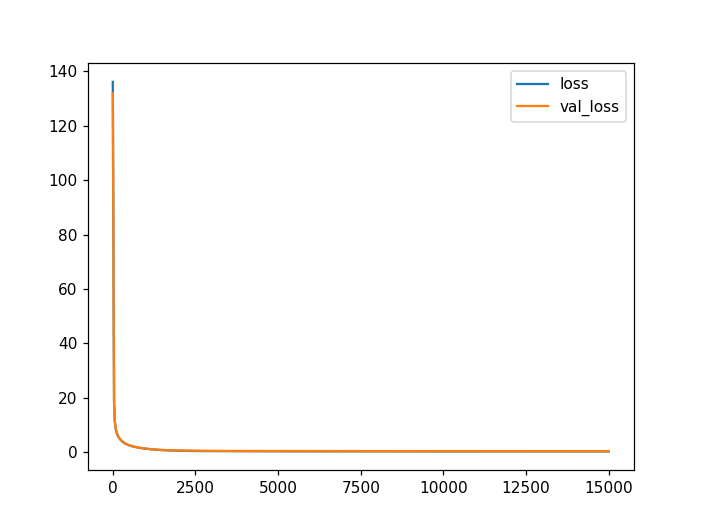

In [17]:
plt.figure()
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()
plt.show()
plt.savefig('./Adsorption_energy/loss.jpg')

In [18]:
model.load_weights(checkpoint_save_path)
y_train_predict = model.predict(x_train)
y_train_predict = np.array(y_train_predict).flatten()
y_test_predict = model.predict(x_test)
y_test_predict = np.array(y_test_predict).flatten()
# print(y_train.shape)
# print(y_train_predict)

<IPython.core.display.Javascript object>


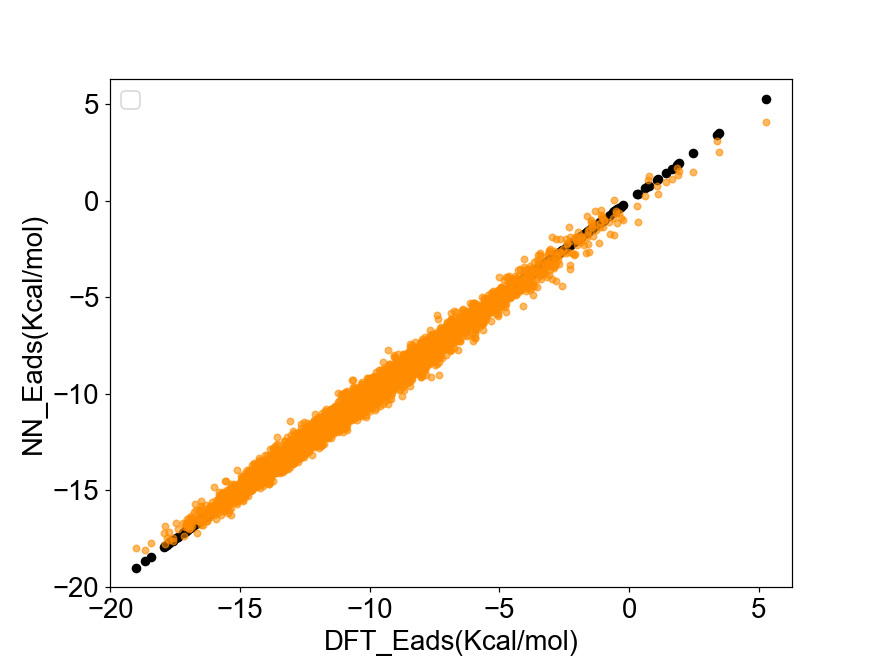

No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [19]:
plt.rc('font',family='Arial', size=15)
plt.figure(figsize=(8,6))
scale = 1
plt.xlim(min(y_train)-scale,max(y_train)+scale)
plt.ylim(min(y_train)-scale,max(y_train)+scale)

plt.scatter(y_train,y_train, color='black', s=28
#            ,linestyle='dotted'
           )
plt.scatter(y_train, y_train_predict, s=18, alpha=0.6,color='darkorange')

plt.xlabel('DFT_Eads(Kcal/mol)',fontsize=18)
plt.ylabel('NN_Eads(Kcal/mol)',fontsize=18)

x1 = np.arange(min(y_train),max(y_train),0.5)
# plt.plot(x1,x1-3.6,label='y=x-3.6')
plt.legend()

plt.xticks(fontsize=18,rotation=0)
plt.yticks(fontsize=18)
plt.legend()
plt.savefig('./Adsorption_energy/Train.png')

<IPython.core.display.Javascript object>


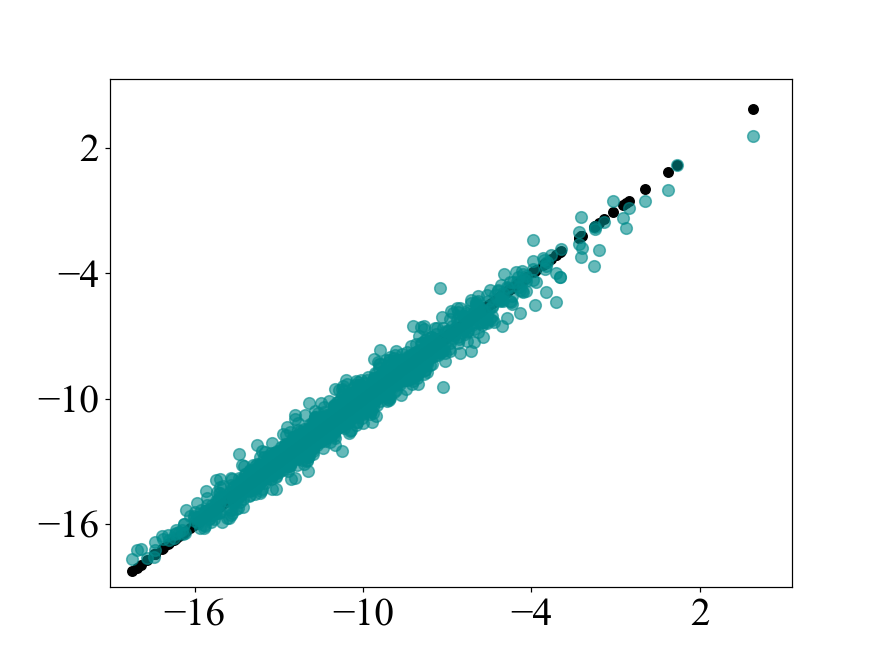

In [20]:
plt.figure(num=4,figsize=(8,6),clear=True)
plt.rc('font',family='Times New Roman') 
scale = 1
plt.xlim(min(y_train),max(y_train))
plt.ylim(min(y_train),max(y_train))

plt.scatter(y_test,y_test, color='black', s=38
#             ,linestyle='dotted'
           )
plt.scatter(y_test,y_test_predict, s=58, alpha=0.6,color='darkcyan')

# plt.xlabel('DFT',fontsize=24)
# plt.ylabel('NN',fontsize=24)

plt.xticks(np.arange(-16,3,6),fontsize=26,rotation=0)
plt.yticks(np.arange(-16,3,6),fontsize=26)


# plt.legend()
plt.savefig('./Adsorption_energy/Test.png', dpi=168, bbox_inches='tight')

In [21]:
import sklearn.metrics as sm
print("训练集------MAE: ",sm.mean_absolute_error(y_train,y_train_predict))
print("测试集------MAE: ",sm.mean_absolute_error(y_test,y_test_predict))
print("训练集------MSE: ",sm.mean_squared_error(y_train,y_train_predict))
print("测试集------MSE: ",sm.mean_squared_error(y_test,y_test_predict))
print("训练集------RMSE: ",np.sqrt(sm.mean_squared_error(y_train,y_train_predict)))
print("测试集------RMSE:: ",np.sqrt(sm.mean_squared_error(y_test,y_test_predict)))
print("训练集------R2_score: ",sm.r2_score(y_train,y_train_predict))
print("测试集------R2_score:: ",sm.r2_score(y_test,y_test_predict))

训练集------MAE:  0.26637941178581465
测试集------MAE:  0.36729866646449877
训练集------MSE:  0.1202972469165144
测试集------MSE:  0.2429787729116828
训练集------RMSE:  0.34683893512193004
测试集------RMSE::  0.4929287706268349
训练集------R2_score:  0.9862182309739717
测试集------R2_score::  0.9714949045008124


In [22]:
print(len(model.weights))
print(len(model.trainable_weights))
print(len(model.non_trainable_weights))

8
8
0
